In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
import itertools

In [2]:
def pickle_dump_obj_to_filename(destinationPath, symbol, fileName, obj):
    pickle_out_filename = os.path.join(destinationPath, "_".join((symbol, fileName)))
    with open(pickle_out_filename, 'wb') as pickle_out:
        pickle.dump(obj, pickle_out)
    print('saved', pickle_out_filename)

In [3]:
import pandas as pd

def extend_series_with_gap(n, N):
    """
    Extend a pandas Series to a new length N, maintaining the gap between entries.

    Parameters:
    n (pd.Series): Original pandas Series.
    N (int): New length of the Series.

    Returns:
    pd.Series: Extended Series.
    """
    current_length = len(n)
    if N <= current_length:
        return n.copy()  # If N is less than or equal to current length, return the original series

    if current_length < 2:
        raise ValueError("Series must have at least two elements to determine the gap")

    # Calculate the gap (difference) between the last two elements
    gap = n.iloc[-1] - n.iloc[-2]

    # Generate extended values
    extension_values = [n.iloc[-1] + gap * (i + 1) for i in range(N - current_length)]
    extension = pd.Series(extension_values, index=range(current_length, N))

    # Concatenate the original series with the extension
    extended_series = pd.concat([n, extension])
    return extended_series


Hypothesis: Periods with more extreme/prolonged order book imbalance exhibit stronger multifractal behavior and long-range correlations detectable in the microprice return time series.

In [4]:
reconLOBs = '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB'
figuresLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'
symbols = sorted(os.listdir(reconLOBs))
symbolFolders = [os.path.join(reconLOBs, symbol) for symbol in symbols]

In [5]:

def extract_obi_avg(dataframes_dict):
    """
    Extracts 'OBI_avg' column from each DataFrame in the provided dictionary
    and combines them into a new DataFrame.

    Parameters:
    dataframes_dict (dict): A dictionary of pandas DataFrames.

    Returns:
    pandas.DataFrame: A new DataFrame containing all 'OBI_avg' columns.
    """
    obi_avg_columns = []

    for df_name, df in dataframes_dict.items():
        if 'OBI_avg' in df.columns:
            # Extract the 'OBI_avg' column and add a reference to the original DataFrame if needed
            obi_avg_col = df['OBI_avg'].rename(f'{df_name}_OBI_avg')
            obi_avg_columns.append(obi_avg_col)

    # Combine all the extracted columns into a new DataFrame
    combined_df = pd.concat(obi_avg_columns, axis=1)

    return combined_df




In [6]:
def process_dataframes(dataframes_dict):
    """
    Processes each DataFrame in the dictionary to create two new DataFrames:
    one with OBI values where Extreme_Bid_Imbalance is True, 
    and another with OBI values where Extreme_Ask_Imbalance is False.

    Parameters:
    dataframes_dict (dict): A dictionary of pandas DataFrames.

    Returns:
    tuple: Two pandas DataFrames, the first for Extreme_Bid_Imbalance and 
           the second for Extreme_Ask_Imbalance.
    """
    obi_bid_true = []
    obi_ask_false = []

    for df_name, df in dataframes_dict.items():
        # Filter for Extreme_Bid_Imbalance = True and extract OBI
        bid_true = df[df['Extreme_Bid_Imbalance'] == True]['OBI'].rename(f'{df_name}_OBI')
        obi_bid_true.append(bid_true)

        # Filter for Extreme_Ask_Imbalance = False and extract OBI
        ask_false = df[df['Extreme_Ask_Imbalance'] == True]['OBI'].rename(f'{df_name}_OBI')
        obi_ask_false.append(ask_false)

    # Combine the extracted columns into new DataFrames
    bid_true_df = pd.concat(obi_bid_true, axis=1)
    ask_false_df = pd.concat(obi_ask_false, axis=1)

    return bid_true_df, ask_false_df

# Example usage:
# dataframes = {'df1': pd.DataFrame(...), 'df2': pd.DataFrame(...), ...}
# bid_true_df, ask_false_df = process_dataframes(dataframes)


In [7]:
# os.listdir('/media/ak/Data1/InterestRateFuturesData/')
directory ='OrderBookImbalance'
path = os.path.join(reconLOBs,directory,'extremes',)
directoryPath = os.path.join(reconLOBs, directory)


### Testing Hypothesis ###

In [8]:

# dicts_df = pickle_file[keys[0]]
# all_obi_dfs = extract_obi_avg(dicts_df)

# # params i need for fathon
# winSizes = fu.linRangeByStep(5, 60)
# revSeg = True
# polOrd = 1
# # load all teh dataframes at once with this
# obi_mfdfa_output_dict_ = dict()

# a = fu.toAggregated(data)
# pymfdfa = fathon.MFDFA(a)

# winSizes = fu.linRangeByStep(10, 2000)
# qs = np.arange(-3, 4, 0.1)
# revSeg = True
# polOrd = 1

# n, F = pymfdfa.computeFlucVec(winSizes, qs, revSeg=revSeg, polOrd=polOrd)
# list_H, list_H_intercept = pymfdfa.fitFlucVec()
# alpha, mfSpect = pymfdfa.computeMultifractalSpectrum()

# obi_mfdfa_output_dict_['orderBookImbalance'] = data
# obi_mfdfa_output_dict_['n_F'] = dict(zip(n, F))
# obi_mfdfa_output_dict_['list_H'] = list_H
# obi_mfdfa_output_dict_['list_H_intercept'] = list_H_intercept
# obi_mfdfa_output_dict_['tau'] = pymfdfa.computeMassExponents()
# obi_mfdfa_output_dict_['alpha'] = alpha
# obi_mfdfa_output_dict_['mfSpect'] = mfSpect

# # output_file_name = str(symbol) + "_obi_mfdfa.pkl"
# # output_loc = os.path.join(path, output_file_name)

# # pickle.dump(output_loc, open(obi_mfdfa_output_dict_, 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
dict_dfa = dict()
h_dict = dict()

In [10]:


plt.plot(np.log(n), np.log(F), 'ro')
# plt.plot(np.log(n), list_H_intercept[0]+list_H[0]*np.log(n), 'k-', label='h_{:.1f} = {:.2f}'.format(qs[0], list_H[0]))
# half_idx = int(len(qs)/2)
# plt.plot(np.log(n), np.log(F[half_idx, :]), 'co')
# plt.plot(np.log(n), list_H_intercept[half_idx]+list_H[half_idx]*np.log(n),
#          'k-', label='h_{:.1f} = {:.2f}'.format(qs[half_idx], list_H[half_idx]))
# plt.plot(np.log(n), np.log(F[-1, :]), 'yo')
# plt.plot(np.log(n), list_H_intercept[-1]+list_H[-1]*np.log(n), 'k-',
#          label='h_{:.1f} = {:.2f}'.format(qs[-1], list_H[-1]))
# plt.xlabel('ln(n)', fontsize=14)
# plt.ylabel('ln(F(n))', fontsize=14)
# plt.title('MFDFA', fontsize=14)
# plt.legend(loc=0, fontsize=14)
# plt.show()

NameError: name 'n' is not defined

In [11]:
# # params i need for fathon
# winSizes = fu.linRangeByStep(5, 60)
# revSeg = True
# polOrd = 1
# # load all teh dataframes at once with this
# obi_mfdfa_output_dict_ = dict()

# a = fu.toAggregated(data)
# pymfdfa = fathon.MFDFA(a)

# winSizes = fu.linRangeByStep(10, 2000)
# qs = np.arange(-3, 4, 0.1)
# revSeg = True
# polOrd = 1

# n, F = pymfdfa.computeFlucVec(winSizes, qs, revSeg=revSeg, polOrd=polOrd)
# list_H, list_H_intercept = pymfdfa.fitFlucVec()
# alpha, mfSpect = pymfdfa.computeMultifractalSpectrum()

# obi_mfdfa_output_dict_['orderBookImbalance'] = data
# obi_mfdfa_output_dict_['n_F'] = dict(zip(n, F))
# obi_mfdfa_output_dict_['list_H'] = list_H
# obi_mfdfa_output_dict_['list_H_intercept'] = list_H_intercept
# obi_mfdfa_output_dict_['tau'] = pymfdfa.computeMassExponents()
# obi_mfdfa_output_dict_['alpha'] = alpha
# obi_mfdfa_output_dict_['mfSpect'] = mfSpect

# output_file_name = str(symbol) + "_obi_mfdfa.pkl"
# output_loc = os.path.join(path, output_file_name)

# pickle.dump(mfdfa_dict_output, open(obi_mfdfa_output_dict_, 'wb'), protocol=pickle.HIGHEST_PROTOCOL)


# ##############################################################################################
# plt.plot(np.log(n), np.log(F[0, :]), 'ro')
# plt.plot(np.log(n), list_H_intercept[0]+list_H[0]*np.log(n), 'k-', label='h_{:.1f} = {:.2f}'.format(qs[0], list_H[0]))
# half_idx = int(len(qs)/2)
# plt.plot(np.log(n), np.log(F[half_idx, :]), 'co')
# plt.plot(np.log(n), list_H_intercept[half_idx]+list_H[half_idx]*np.log(n),
#          'k-', label='h_{:.1f} = {:.2f}'.format(qs[half_idx], list_H[half_idx]))
# plt.plot(np.log(n), np.log(F[-1, :]), 'yo')
# plt.plot(np.log(n), list_H_intercept[-1]+list_H[-1]*np.log(n), 'k-',
#          label='h_{:.1f} = {:.2f}'.format(qs[-1], list_H[-1]))
# plt.xlabel('ln(n)', fontsize=14)
# plt.ylabel('ln(F(n))', fontsize=14)
# plt.title('MFDFA', fontsize=14)
# plt.legend(loc=0, fontsize=14)
# plt.show()

# plt.plot(qs, list_H, 'ro-')
# plt.xlabel('q', fontsize=14)
# plt.ylabel('h(q)', fontsize=14)
# plt.title('h(q)', fontsize=14)
# plt.show()



# plt.plot(qs, tau, 'ro-')
# plt.xlabel('q', fontsize=14)
# plt.ylabel('$\\tau$(q)', fontsize=14)
# plt.title('$\\tau$(q)', fontsize=14)
# plt.show()



# plt.plot(alpha, mfSpect, 'ro-')
# plt.xlabel('$\\alpha$', fontsize=14)
# plt.ylabel('f($\\alpha$)', fontsize=14)
# plt.title('f($\\alpha$)', fontsize=14)
# plt.show()

In [12]:
# os.listdir('/media/ak/Data1/InterestRateFuturesData/')
reconLOBs = '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB'
figuresLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures'
symbols = sorted(os.listdir(reconLOBs))
symbolFolders = [os.path.join(reconLOBs, symbol) for symbol in symbols]
directory = 'OrderBookImbalance'
path = os.path.join(reconLOBs, directory, 'extremes', )
# Assuming you have a list of file paths
obiFiles = os.listdir(path)
file_paths = [os.path.join(path, obiFiles[i]) for i in range(7)]

In [13]:
file_paths

['/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/extremes/DU1_obi_mfdfa.pkl',
 '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/extremes/FB1_obi_mfdfa.pkl',
 '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/extremes/FV1_obi_mfdfa.pkl',
 '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/extremes/G_obi_mfdfa.pkl',
 '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/extremes/KE1_obi_mfdfa.pkl',
 '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/extremes/OBI_extremes_DU1_calendar_.pkl',
 '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/extremes/OBI_extremes_FB1_calendar_.pkl']

In [14]:
pickle_file = pd.read_pickle(file_paths[0])
keys = list(pickle_file.keys())
symbol = keys[0]
dicts_df = pickle_file[symbol]
all_obi_dfs = extract_obi_avg(dicts_df)

AttributeError: 'Series' object has no attribute 'columns'

In [15]:
all_obi_dfs

NameError: name 'all_obi_dfs' is not defined

In [16]:
obi_mfdfa_output_dict_['orderBookImbalance']

NameError: name 'obi_mfdfa_output_dict_' is not defined

In [17]:
obimfdfaPath= '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/OBIMFDFA'

In [18]:
files = os.listdir(obimfdfaPath)

In [19]:
fileIdx = 1
fileOBIpath = os.path.join(obimfdfaPath, files[fileIdx])
keys = ['orderBookImbalance', 'n', 'F', 'list_H', 'list_H_intercept', 'tau', 'alpha', 'mfSpect', 'qs']


In [20]:
pd.read_pickle(fileOBIpath)[1].keys()

dict_keys(['orderBookImbalance', 'n', 'F', 'list_H', 'list_H_intercept', 'tau', 'alpha', 'mfSpect', 'qs'])

In [35]:
# import os
# import pandas as pd

# # Assuming 'obimdfdfaPath' is defined and contains the path to your files
# obimdfdfaPath = '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/OBIMFDFA'  # Replace with your actual path
# files = os.listdir(obimdfdfaPath)
# print(files)
# # Keys for the data you want to extract
# keys = ['orderBookImbalance', 'n', 'F', 'list_H', 'list_H_intercept', 'tau', 'alpha', 'mfSpect', 'qs']



# # Iterate over files and aggregate data
# for fileIdx, filename in enumerate(files):
#     file_path = os.path.join(obimdfdfaPath, filename)
#     print(file_path)
#     data = pd.read_pickle(file_path)
#     keys = list(data.keys())
#     # Initialize a dictionary to store lists of data for each key
#     data_dict = {key: [] for key in keys}

#     # Assuming data is a dictionary-like object
#     for key in keys:
#         data_dict[key].extend(data[key])
#         print(data_dict)

# # # Convert lists to dataframes
# # dataframes = {key: pd.DataFrame(data_dict[key]) for key in keys}

# # # dataframes['orderBookImbalance'], dataframes['n'], etc., are your dataframes


In [24]:
from collections import defaultdict
import os
import pandas as pd

# Path to your files
obimdfdfaPath = '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/OBIMFDFA'
files = os.listdir(obimdfdfaPath)

# Keys of interest
mfdfakeys = ['orderBookImbalance', 'n', 'F', 'list_H', 'list_H_intercept', 'tau', 'alpha', 'mfSpect', 'qs']

# Initialize a nested defaultdict
data_dict = defaultdict(lambda: defaultdict(dict))

# Iterate over files and aggregate data
for filename in files:
    symbol = filename.split("_")[0]  # Extracting symbol from filename
    file_path = os.path.join(obimdfdfaPath, filename)
    print(file_path)
    data = pd.read_pickle(file_path)  # Assuming data is a dict of dicts
    keys = list(data.keys())

# # #     # Iterate over each key and index
    for idx in keys:
        for key in mfdfakeys:
            print(data[idx][key])
            data_dict[symbol][key][idx] = data[idx][key]


/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/OBIMFDFA/DU1_obi_mfdfa.pkl
1        0.352246
2       -0.008094
3        0.347930
4        0.301471
5        0.134161
           ...   
19484   -0.085117
19485   -0.095866
19486   -0.075353
19487   -0.074490
19488   -0.064155
Name: 0, Length: 19488, dtype: float64
[  10   11   12 ... 1998 1999 2000]
[[5.10817362e-04 4.46160470e-04 1.21235004e-03 ... 2.99282732e+01
  3.00042448e+01 3.00797477e+01]
 [5.49273903e-04 4.86065631e-04 1.25600259e-03 ... 3.02031658e+01
  3.02797353e+01 3.03558181e+01]
 [5.92324904e-04 5.31722244e-04 1.30325570e-03 ... 3.04794711e+01
  3.05565596e+01 3.06331486e+01]
 ...
 [3.10766165e-01 3.44698390e-01 3.58189214e-01 ... 4.58995953e+01
  4.59138938e+01 4.59300945e+01]
 [3.17731170e-01 3.52667835e-01 3.65344992e-01 ... 4.61081430e+01
  4.61217403e+01 4.61372036e+01]
 [3.24722706e-01 3.60665818e-01 3.72494534e-01 ... 4.63158778e+01
  4.63288016e+01 4.63435539e+01]]
[1.96266183 1.94952978 1

[-3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01  2.66453526e-15  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00
  3.00000000e+00  3.10000

 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315]
[[0.17799457 0.19928847 0.2324364  ... 7.64746413 7.65001353 7.65089098]
 [0.179954   0.20126527 0.23492125 ... 7.64747269 7.65001691 7.65089173]
 [0.18197375 0.20330013 0.23747406 ... 7.64748124 7.65002029 7.65089248]
 ...
 [0.38529707 0.40790369 0.48223544 ... 7.64803738 7.65023992 7.65094123]
 [0.38797333 0.41089915 0.48558048 ... 7.64804593 7.6502433  7.65094198]
 [0.39061544 0.41386963 0.48888513 ... 7.64805449 7.65024668 7.65094273]]
[1.06362642 1.06048249 1.05728774 1.05404375 1.05075236 1.04741577
 1.04403645 1.04061724 1.03716127 1.03367203 1.0301533  1.02660913
 1.02304386 1.01946205 1.01586845 1.01226792 1.00866544 1.00506599
 1.00147453 0.99789593 0.9943349  0.99079595 0.98728332 0.983801
 0.98035261 0.97694145 0.97357043 0.97024212 0.96695869 0.96372199
 0.95688492 0.95739431 0.95430535 0.95126715 0.94828004 0.94534409
 0.94245919 0.93962505 0.93684121 0.93410709 0.931422   0.92878516
 0.92619571 0.9

[[2.23436848e-14 1.00545760e-01 3.21550406e-02 ... 5.13067087e+00
  5.12877182e+00 5.12582536e+00]
 [2.34291752e-14 1.03124456e-01 3.36035520e-02 ... 5.13067265e+00
  5.12877239e+00 5.12582546e+00]
 [2.46507870e-14 1.05825659e-01 3.52170692e-02 ... 5.13067444e+00
  5.12877296e+00 5.12582556e+00]
 ...
 [3.63066806e-01 3.77256355e-01 3.89104571e-01 ... 5.13079042e+00
  5.12881003e+00 5.12583229e+00]
 [3.67159163e-01 3.81372169e-01 3.92635291e-01 ... 5.13079220e+00
  5.12881061e+00 5.12583239e+00]
 [3.71208445e-01 3.85431700e-01 3.96096357e-01 ... 5.13079399e+00
  5.12881118e+00 5.12583249e+00]]
[1.668243   1.66099797 1.65352601 1.64582183 1.63788044 1.62969715
 1.6212677  1.61258823 1.6036553  1.59446586 1.58501702 1.57530576
 1.56532826 1.55507883 1.54454807 1.53371991 1.52256714 1.51104457
 1.49907932 1.48655668 1.4732992  1.45903397 1.44333724 1.42553259
 1.40448721 1.37816235 1.34249356 1.28821728 1.1940505  1.07559493
 1.03708491 1.02232689 1.01426887 1.00695776 0.99992112 0.9930448

[[0.0163816  0.01551669 0.03153115 ... 9.10626296 9.11154216 9.11636178]
 [0.01719734 0.01614439 0.03327449 ... 9.10626301 9.11154216 9.11636178]
 [0.01811564 0.01684458 0.03524296 ... 9.10626305 9.11154217 9.11636178]
 ...
 [0.5326703  0.58174264 0.60482396 ... 9.1062658  9.11154236 9.11636179]
 [0.53655972 0.5853367  0.60938835 ... 9.10626584 9.11154236 9.11636179]
 [0.5404085  0.58886241 0.61391928 ... 9.10626588 9.11154237 9.11636179]]
[0.91685399 0.91184828 0.90667278 0.90131716 0.89576984 0.89001777
 0.88404635 0.87783933 0.87137888 0.86464597 0.85762102 0.85028528
 0.84262299 0.8346248  0.82629252 0.81764533 0.80872677 0.79961098
 0.79040574 0.78124875 0.77229473 0.7636939  0.75556762 0.74799016
 0.74098297 0.73452189 0.72855216 0.72300462 0.71780863 0.71289997
 0.6952864  0.70373836 0.6994078  0.69520683 0.69111596 0.68712065
 0.68321014 0.67937641 0.67561356 0.67191717 0.66828397 0.66471149
 0.66119785 0.65774161 0.65434165 0.65099705 0.64770708 0.64447108
 0.64128849 0.638158

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
symbols = list(data_dict.keys())
print(symbols)

['DU1', 'FB1', 'FV1', 'G', 'JB1', 'KE1', 'OE1', 'RX1', 'US1', 'XM1', 'YM1']


In [313]:
# ke1 = '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/OrderBookImbalance/OBIMFDFA/KE1_obi_mfdfa.pkl'

In [25]:
# pd.read_pickle(ke1).keys()

## doing all the plots together - all PLOTTING

In [28]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # List of symbols
# symbols = ['DU1', 'FB1', 'FV1', 'G', 'JB1', 'KE1', 'OE1', 'RX1', 'US1', 'XM1', 'YM1']

# # Colors for the plots
# colors = ['ro-', 'go-', 'bo-', 'co-', 'mo-', 'yo-', 'ko-', 'r*-', 'g*-', 'b*-', 'c*-']

# # Create a figure with subplots
# fig, axs = plt.subplots(4, 3, figsize=(15, 20))  # Adjust the figure size as needed
# # fig.suptitle('Tau(q) for Different Symbols', fontsize=16)

# # Iterate over symbols and subplots
# for i, symbol in enumerate(symbols):
#     row, col = i // 3, i % 3
#     ax = axs[row, col]

#     # Assuming data_dict is already defined and contains the necessary data
#     tau = pd.DataFrame(data_dict[str(symbol)]['tau']).median(axis=1)
#     qs = pd.DataFrame(data_dict[str(symbol)]['qs']).median(axis=1)
#     color = colors[i % len(colors)]

#     ax.plot(qs, tau, color, alpha=0.5, label=str(symbol))
#     ax.set_xlabel('q', fontsize=18)
#     ax.set_ylabel('$\\tau$(q)', fontsize=18)
#     ax.set_title(str(symbol), fontsize=14)
#     ax.legend()
#     ## below for the plot saving
#     title_file = 'median_tau_OBI_ALL_SYMBOLS.png'
#     fig_location = os.path.join(figuresLocation, title_file)
#     plt.savefig(fig_location, dpi=300)

# # Hide the last subplot if there are less than 12 symbols
# if len(symbols) < 12:
#     axs[-1, -1].axis('off')

# # Adjust layout
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()


In [27]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import os

# # List of symbols
# symbols = ['DU1', 'FB1', 'FV1', 'G', 'JB1', 'KE1']#, 'OE1', 'RX1', 'US1', 'XM1', 'YM1']

# # Colors for the plots
# colors = ['ro-', 'go-', 'bo-', 'co-', 'mo-', 'yo-', 'ko-', 'r*-', 'g*-', 'b*-', 'c*-']

# # Calculate the number of rows and columns for subplots
# n_symbols = len(symbols)
# n_cols = 3
# n_rows = (n_symbols + n_cols - 1) // n_cols  # Ceiling division

# # Create a figure with subplots
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust the figure height as needed

# # Flatten the axis array for easier indexing
# axs = axs.flatten()

# # Iterate over symbols
# for i, symbol in enumerate(symbols):
#     ax = axs[i]

#     # Assuming data_dict is already defined and contains the necessary data
#     tau = pd.DataFrame(data_dict[str(symbol)]['tau']).median(axis=1)
#     qs = pd.DataFrame(data_dict[str(symbol)]['qs']).median(axis=1)
#     color = colors[i % len(colors)]

#     ax.plot(qs, tau, color, alpha=0.5, label=str(symbol))
#     ax.set_xlabel('q', fontsize=18)
#     ax.set_ylabel('$\\tau$(q)', fontsize=18)
#     ax.set_title(str(symbol), fontsize=14)
#     ax.legend()

# # Hide unused subplots if any
# for i in range(n_symbols, n_rows * n_cols):
#     axs[i].axis('off')

# # Adjust layout
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# # Save the plot
# title_file = 'median_tau_OBI_ALL_SYMBOLS.png'
# fig_location = os.path.join(figuresLocation, title_file)
# plt.savefig(fig_location, dpi=300)

# # Show the plot on the screen
# plt.show()


In [29]:
# # List of symbols
# symbols = ['DU1', 'FB1', 'FV1', 'G', 'JB1', 'KE1']#, 'OE1', 'RX1', 'US1', 'XM1', 'YM1']

# # Colors for the plots
# colors = ['ro-', 'go-', 'bo-', 'co-', 'mo-', 'yo-', 'ko-', 'r*-', 'g*-', 'b*-', 'c*-']

# # Create a figure with subplots
# fig, axs = plt.subplots(2, 3, figsize=(15, 15))  # Adjust the figure size as needed
# # fig.suptitle('Tau(q) for Different Symbols', fontsize=16)

# # Iterate over symbols and subplots
# for i, symbol in enumerate(symbols):
#     row, col = i // 3, i % 3
#     ax = axs[row, col]

#     # Assuming data_dict is already defined and contains the necessary data
#     alpha = pd.DataFrame(data_dict[str(symbol)]['alpha']).median(axis=1)
#     mfSpect = pd.DataFrame(data_dict[str(symbol)]['mfSpect']).median(axis=1)
#     color = colors[i % len(colors)]
#     ax.plot(alpha, mfSpect, color, alpha=0.5, label=str(symbol))
#     ax.set_xlabel('$\\alpha$', fontsize=18)
#     ax.set_ylabel('f($\\alpha$)', fontsize=18)
#     ax.set_title(str(symbol), fontsize=14)
#     ax.legend()
#     ## below for the plot saving
#     title_file = 'median_mfSpectrum_OBI_ALL_SYMBOLS.png'
#     fig_location = os.path.join(figuresLocation, title_file)
#     plt.savefig(fig_location, dpi=300)


# # Hide the last subplot if there are less than 12 symbols
# if len(symbols) < 11:
#     axs[-1, -1].axis('off')

# # Adjust layout
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()









In [31]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import os

# # List of symbols
# symbols = ['OE1', 'RX1', 'US1', 'XM1', 'YM1'] #['DU1', 'FB1', 'FV1', 'G', 'JB1', 'KE1']#,  # example symbols

# # Colors for the plots
# colors = ['ro-', 'go-', 'bo-', 'co-', 'mo-', 'yo-', 'ko-', 'r*-', 'g*-', 'b*-', 'c*-']

# # Calculate the number of rows and columns for subplots
# n_symbols = len(symbols)
# n_cols = 3
# n_rows = (n_symbols + n_cols - 1) // n_cols  # Ceiling division

# # Create a figure with subplots
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(25, 18))  # Adjust the figure size as needed

# # Flatten the axis array for easier indexing
# axs = axs.flatten()

# # Iterate over symbols
# for i, symbol in enumerate(symbols):
#     ax = axs[i]

#     # Assuming data_dict is already defined and contains the necessary data
#     # Replace these with actual DataFrame retrieval
#     alpha = pd.DataFrame(data_dict[str(symbol)]['alpha']).median(axis=1)
#     mfSpect = pd.DataFrame(data_dict[str(symbol)]['mfSpect']).median(axis=1)
#     color = colors[i % len(colors)]

#     ax.plot(alpha, mfSpect, color, alpha=0.5, label=str(symbol))
#     ax.set_xlabel('$\\alpha$', fontsize=25)
#     ax.set_ylabel('f($\\alpha$)', fontsize=25)
#     ax.set_title(str(symbol), fontsize=14)
#     ax.legend()

# # Hide unused subplots
# for i in range(n_symbols, n_rows * n_cols):
#     axs[i].axis('off')

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

# # # Save the plot
# title_file = 'median_mfSpectrum_OBI_ALL_SYMBOLS_2nd_set.png'
# fig_location = os.path.join(figuresLocation, title_file)
# plt.savefig(fig_location, dpi=300)


In [32]:
# Calculate log values
n = pd.DataFrame(data_dict[str(symbol)]['n']).median(axis=1)


In [33]:
n

Series([], dtype: float64)

In [268]:
import pandas as pd

# Assuming data_dict is your dictionary and it contains keys for each symbol
symbols = ['DU1', 'FB1', 'FV1', 'G', 'JB1', 'KE1', 'OE1', 'RX1', 'US1', 'XM1', 'YM1']

# Initialize an empty DataFrame to store median values
median_df = pd.DataFrame()

# Iterate over symbols
for symbol in symbols:
    # Extract the dictionary of DataFrames for 'F'
    f_dict = data_dict[str(symbol)]['F']

#     # Initialize a temporary DataFrame to store median values for this symbol
#     temp_median_df = pd.DataFrame()

#     # Iterate over the inner dictionary and compute median for each DataFrame
#     for idx, df in f_dict.items():
#         # Compute median of the DataFrame
#         median_values = df.median()
#         # Append median values to the temporary DataFrame
#         temp_median_df[idx] = median_values

#     # Compute the median across all DataFrames for this symbol
#     symbol_median = temp_median_df.median(axis=1)

#     # Append median values to the median DataFrame
#     median_df[str(symbol)] = symbol_median

# # Now, median_df contains the median values for each symbol's 'F' DataFrames


In [147]:

# Assuming data_dict is your dictionary and it contains keys for each symbol
symbols = ['DU1', 'FB1', 'FV1', 'G', 'JB1', 'KE1', 'OE1', 'RX1', 'US1', 'XM1', 'YM1']

# Initialize an empty DataFrame to store median values
median_df = pd.DataFrame()
symbol_df_dicts = defaultdict(dict)
# Iterate over symbols
for symbol in symbols:
    # Extract the dictionary of NumPy arrays for 'F'
    f_dict = data_dict[str(symbol)]['F']
    f_dict_keys = list(f_dict.keys())

    for key in f_dict_keys:
        symbol_df_dicts[symbol][key] = (pd.DataFrame(f_dict[key]))

#     # Convert the dictionary to a DataFrame
#     symbol_df = pd.DataFrame(f_dict)

#     # Compute the median across axis=1 (row-wise)
#     symbol_median = symbol_df.median(axis=1)

#     # Append median values to the median DataFrame
#     median_df[str(symbol)] = symbol_median

# # Now, median_df contains the median values for each symbol's 'F' data


In [159]:

# Initialize a dictionary to store the median DataFrame for each symbol
median_df_dict = {}

# Iterate over symbols
for symbol in symbols:
    # Extract the dictionary of DataFrames for the current symbol
    df_dict = symbol_df_dicts[symbol]

    # Concatenate all DataFrames in the dictionary
    concatenated_df = pd.concat(df_dict.values(), axis=0)

    # Compute the median of the concatenated DataFrame
    median_df = concatenated_df.median()

    # Store the median DataFrame in the dictionary
    median_df_dict[symbol] = median_df

# Now, median_df_dict contains the median DataFrame for each symbol
# Access like median_df_dict['DU1'] for the median DataFrame of 'DU1'


In [278]:
symbol_for_F = 'US1'
F = median_df_dict[symbol_for_F]
len(F)

882

In [279]:
# 'list_H', 'list_H_intercept',

In [280]:
list_H = pd.DataFrame.from_dict(data_dict[symbol_for_F]['list_H'])
list_H_intercept = pd.DataFrame.from_dict(data_dict[symbol_for_F]['list_H_intercept'])

In [281]:
H = list_H.median(axis=1)
H_intercept = list_H_intercept.median(axis=1)

In [282]:
N = len(F)  # New desired length

extended_n = extend_series_with_gap(n, N)


Text(0, 0.5, 'log(F)')

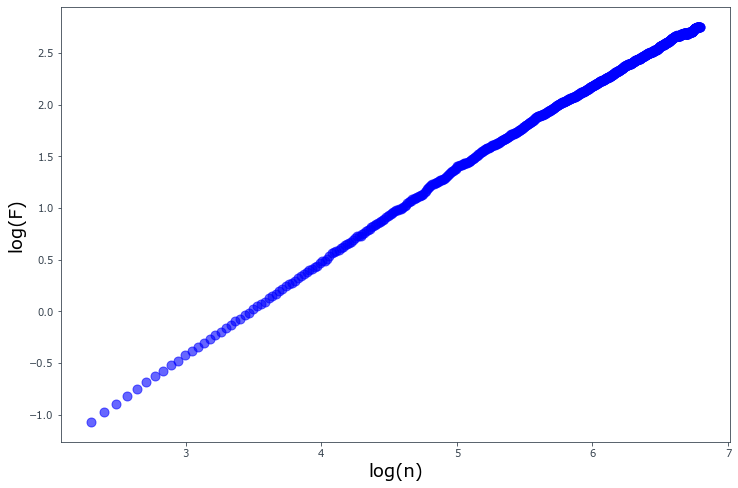

In [283]:
plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize=(12,8))

ax.set_facecolor('xkcd:white')
_=plt.plot(np.log(extended_n), np.log(F), 'bo',alpha=0.6,markersize=9, label =" ")
# Set the label for the x-axis
plt.xlabel('log(n)', fontsize =18)
# Set the label for the x-axis
plt.ylabel('log(F)', fontsize =18)
# The code plots the linear relation between log(n) and H_intercept + H * log(n)


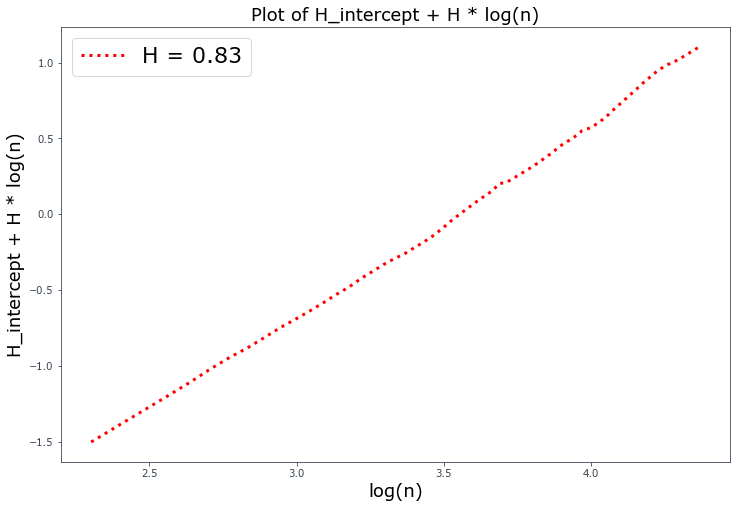

In [284]:

# Set the aesthetic parameters for the plot to have a specific style
plt.rcParams['font.sans-serif'] = 'Verdana'  # Setting the font to Verdana
plt.rcParams['axes.edgecolor'] = '#333F4B'  # Dark grey edge color for the axes
plt.rcParams['axes.linewidth'] = 0.8        # Width of the axes edge line
plt.rcParams['xtick.color'] = '#333F4B'     # Dark grey color for the x-axis tick marks
plt.rcParams['ytick.color'] = '#333F4B'     # Dark grey color for the y-axis tick marks

# Create a figure and axis with specific dimensions
fig, ax = plt.subplots(figsize=(12, 8))

# Assuming 'n' is a numpy array and 'H_intercept' and 'H' are constants or arrays that have been defined earlier.
# The code plots the linear relation between log(n) and H_intercept + H * log(n)
plt.plot(np.log(n), H_intercept + H * np.log(n), 'r:', linewidth=3, label='H = {:.2f}'.format(H.mean()))

# Set the label for the x-axis
plt.xlabel('log(n)', fontsize =18)

# Set the label for the y-axis
plt.ylabel('H_intercept + H * log(n)', fontsize = 18)

# Set the title of the plot
plt.title('Plot of H_intercept + H * log(n)', fontsize = 18)

# Display the legend in the plot
plt.legend()

# Show the plot on the screen
plt.show()

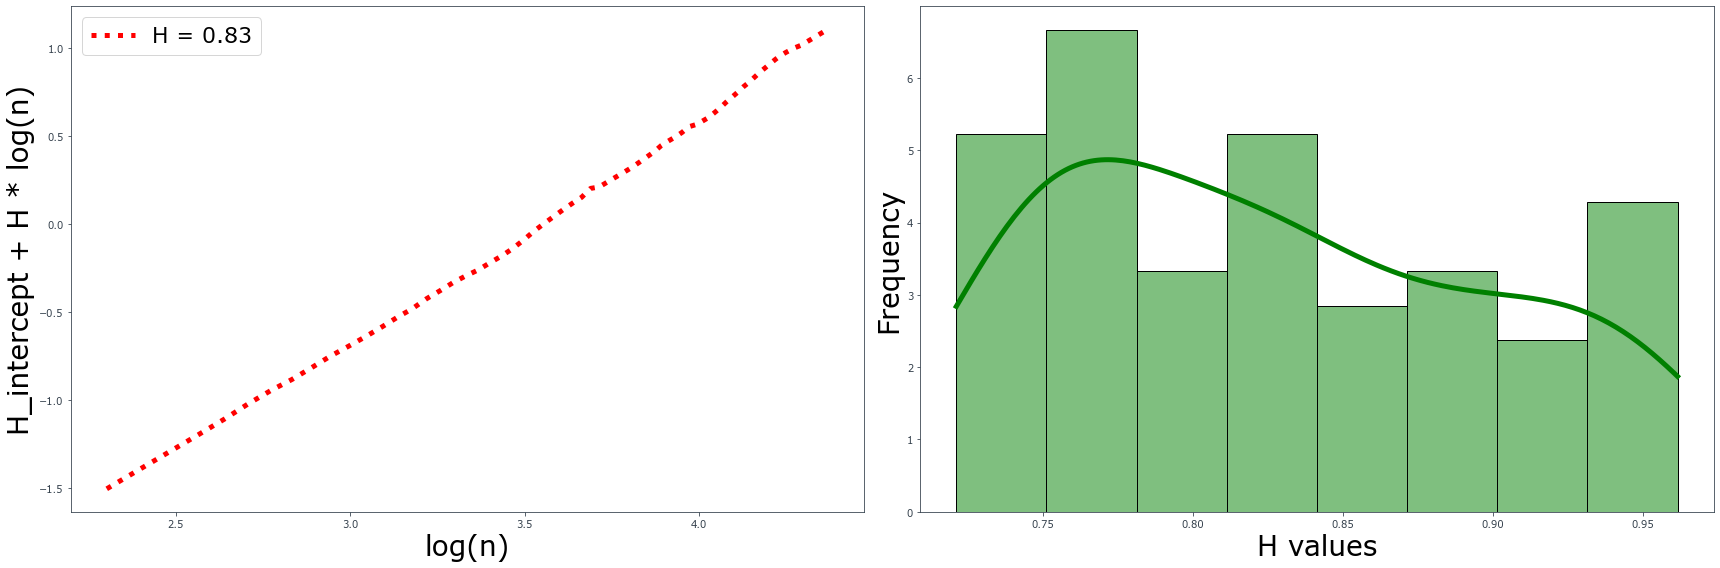

In [285]:


# Set the aesthetic parameters for the plot
plt.rcParams['font.sans-serif'] = 'Verdana'
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.color'] = '#333F4B'
plt.rcParams['ytick.color'] = '#333F4B'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['legend.fontsize'] = 22

# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

# Plotting H_intercept + H * log(n) in the first subplot
ax1.plot(np.log(n), H_intercept + H * np.log(n), 'r:', linewidth=5, label='H = {:.2f}'.format(H.mean()))
ax1.set_xlabel('log(n)')
ax1.set_ylabel('H_intercept + H * log(n)')
# ax1.set_title('Plot of H_intercept + H * log(n)')
ax1.legend()

# Plotting histogram of H in the second subplot using Seaborn with customized KDE line
sns.histplot(H, ax=ax2, color='green', kde=True, 
             line_kws={'color': 'red', 'linewidth': 5},stat="density")
ax2.set_xlabel('H values')
ax2.set_ylabel('Frequency')
# ax2.set_title('Histogram of H')

# Adjust the layout
plt.tight_layout()
title_file = "_".join((symbol_for_F, '_H_plot_Histogram_for_OBI.png'))
fig_location = os.path.join(figuresLocation, title_file)
plt.savefig(fig_location, dpi=300)
# Show the combined plot on the screen
plt.show()


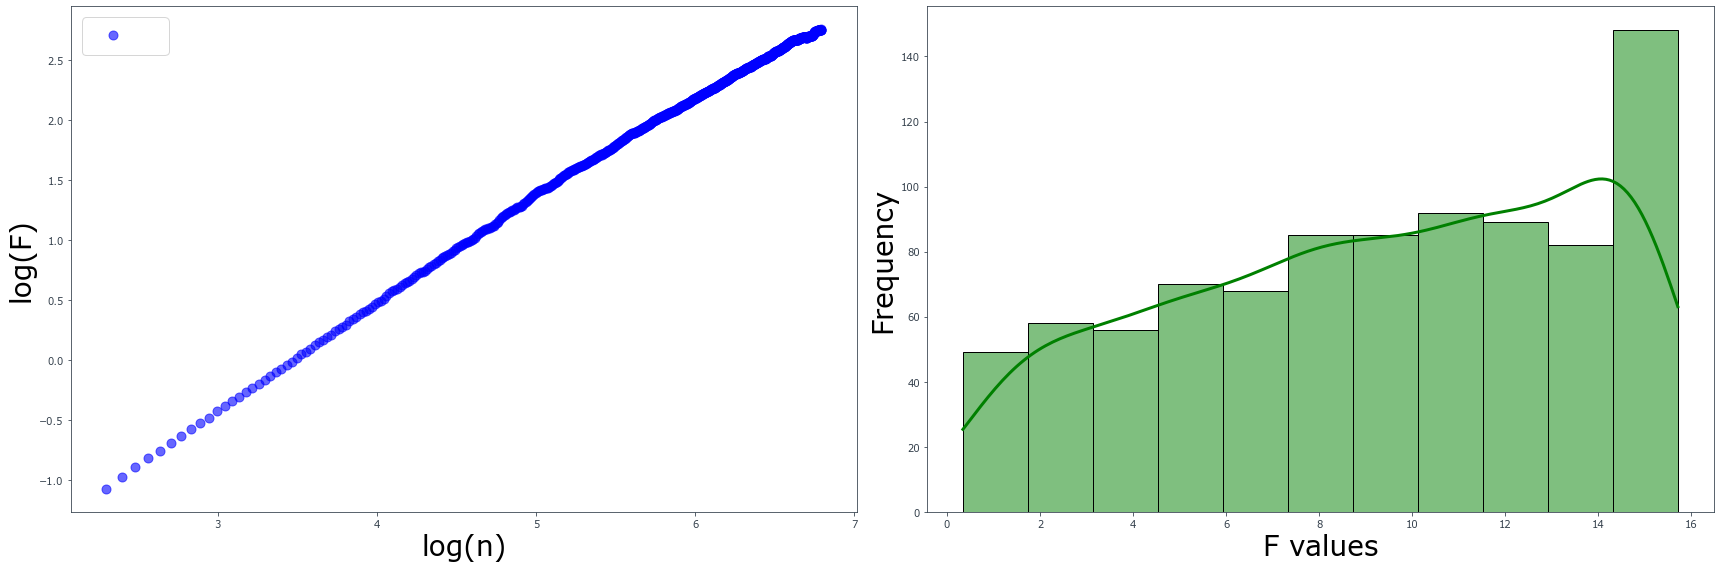

In [286]:

# Set the aesthetic parameters for the plot
plt.rcParams['font.sans-serif'] = 'Verdana'
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.color'] = '#333F4B'
plt.rcParams['ytick.color'] = '#333F4B'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['legend.fontsize'] = 22

# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

# Plotting log(extended_n) vs log(F) in the first subplot
ax1.plot(np.log(extended_n), np.log(F), 'bo', alpha=0.6, markersize=9, label=" ")
ax1.set_xlabel('log(n)')
ax1.set_ylabel('log(F)')
# ax1.set_title('Plot of log(n) vs log(F)')
ax1.legend()

# Plotting histogram of F in the second subplot using Seaborn
sns.histplot(F, ax=ax2, color='green', kde=True, 
             line_kws={'color': 'red', 'linewidth': 3})
ax2.set_xlabel('F values')
ax2.set_ylabel('Frequency')
# ax2.set_title('Histogram of F')
title_file = "_".join((symbol_for_F, '_F_log_n_Hist_OBI.png'))
fig_location = os.path.join(figuresLocation, title_file)
plt.savefig(fig_location, dpi=300)
# Adjust the layout
plt.tight_layout()

# Show the combined plot on the screen
plt.show()


## Two Sample Testing ##

In [288]:
import freqopttest.util as util
import freqopttest.data as data
import freqopttest.kernel as kernel
import freqopttest.tst as tst
import collections
from collections import defaultdict
import freqopttest.glo as glo
import sys
import time
import os
import pandas as pd
import pickle
import itertools

In [289]:
def generate_column_pairs(num_columns):
    """
    Generates pairs of columns for sliding window analysis.

    Args:
        num_columns (int): The total number of columns.

    Yields:
        tuple: A tuple containing the start index, end index, and shift for a pair of columns.
               The start and end indices define the column pair, and the shift indicates the distance
               by which one column is shifted with respect to the other.
    """
    for window in range(1, num_columns):
        for shift in range(1, num_columns - window + 1):
            for start_point, end_point in itertools.combinations(range(num_columns), 2):
                if end_point - start_point == window:
                    yield start_point, end_point, shift


def create_kgauss(sigma2, default_sigma2=None):
    """
    Create a KGauss instance with the given sigma2 value, or use the default_sigma2 value if provided.

    :param sigma2: float, the sigma2 value to use for creating the KGauss instance.
    :param default_sigma2: float, optional, the default sigma2 value to use if the provided sigma2 is invalid.
    :return: KGauss, the created KGauss instance.
    :raise ValueError: if both sigma2 and default_sigma2 are invalid.
    """
    if sigma2 > 0:
        return kernel.KGauss(sigma2)
    elif default_sigma2 is not None and default_sigma2 > 0:
        print("Using default sigma2 value:", default_sigma2)
        return kernel.KGauss(default_sigma2)
    else:
        raise ValueError("Both sigma2 and default_sigma2 are invalid. Please provide a positive value for either.")


def simulate_null_spectral(weights, n_simulate=1000, seed=275):
    """
    weights: chi-square weights (for the infinite weigted sum of chi squares)
    Return the values of MMD^2 (NOT n*MMD^2) simulated from the null distribution by
    the spectral method.
    """
    # draw at most block_size values at a time
    block_size = 400
    D = weights.shape[0]  # len(weights)
    mmds = np.zeros(n_simulate)
    from_ind = 0

    with util.NumpySeedContext(seed=seed):
        while from_ind < n_simulate:
            to_draw = min(block_size, n_simulate - from_ind)
            # draw chi^2 random variables.
            chi2 = np.random.randn(D, to_draw) ** 2
            # an array of length to_draw
            sim_mmds = 2.0 * weights.dot(chi2 - 1.0)
            # store
            end_ind = from_ind + to_draw
            mmds[from_ind:end_ind] = sim_mmds
            from_ind = end_ind
    return mmds

def chi_square_weights_H0(k, X):
    """
    Return a numpy array of the weights to be used as the weights in the
    weighted sum of chi-squares for the null distribution of MMD^2.
    - k: a Kernel
    - X: n x d number array of n data points
    """
    try:
        n = X.shape[0]
        # Gram matrix
        K = k.eval(X, X)
        # centring matrix. Not the most efficient way.
        H = np.eye(n) - np.ones((n, n)) / float(n)
        HKH = H.dot(K).dot(H)
        # https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.eigvals.html
        evals = np.linalg.eigvals(HKH)
        evals = np.real(evals)
        # sort in decreasing order
        evals = -np.sort(-evals)
        weights = evals / float(n) ** 2
        return weights
    except np.linalg.LinAlgError as e:
        print("LinAlgError:", str(e))
        return np.array([])  # Return an empty array or any other appropriate value

In [293]:
start = time.time()
a_args =[1, 2, 3]
second_arg = [1, 4, 5, 6, 8, 10]
c = list(itertools.product(a_args, second_arg))
for shift, window in c:
    for start_point in range(0, (len - window - shift)):
        end_point = start_point + shift

#         X = np.array(unpickled_Df.iloc[:, start_point:end_point])
#         Y = np.array(unpickled_Df.iloc[:, end_point + shift:end_point + 2 * shift])
#         Z = np.array(unpickled_Df.iloc[:, start_point + window:end_point + window])

#         try:
#             tr_data = data.TSTData(X, Y)
#             test_data_one = data.TSTData(X, Z)  # data to train the model
#             test_data_two = data.TSTData(Y, Z)
#             # training dictionary results
#             tr, te = tr_data.split_tr_te(tr_proportion=0.95, seed=10)  # is this necessary?!

#             xtr, ytr = tr.xy()
#             xytr = tr.stack_xy()
#             sig2 = util.meddistance(xytr, subsample=1000)
#             k = kernel.KGauss(sig2)
#             mean, var = tst.QuadMMDTest.h1_mean_var(xtr, ytr, k, is_var_computed=True)
#             Kx = k.eval(xtr, xtr)
#             Ky = k.eval(ytr, ytr)
#             Kxy = k.eval(xtr, ytr)
#             mean_gram, var_gram = tst.QuadMMDTest.h1_mean_var_gram(Kx, Ky, Kxy, k, True)
#             chi2_weights = chi_square_weights_H0(k, xytr)
#             sim_mmds = simulate_null_spectral(chi2_weights, n_simulate=2000)
#             # choose the best parameter and perform a test with permutations
#             med = util.meddistance(tr.stack_xy(), 1000)
#             list_gwidth = np.hstack(((med ** 2) * (2.0 ** np.linspace(-4, 4, 20))))
#             list_gwidth.sort()
#             list_kernels = [kernel.KGauss(gw2) for gw2 in list_gwidth]

#             # grid search to choose the best Gaussian width
#             besti, powers = tst.QuadMMDTest.grid_search_kernel(tr, list_kernels, alpha=0.05)
#             # perform test
#             best_ker = list_kernels[besti]
#             mmd_train_test_results[start_point]['perm_mmds1'] = tst.QuadMMDTest.permutation_list_mmd2(xtr, ytr, k,
#                                                                                                       n_permute=2000)
#             mmd_train_test_results[start_point]['chi2_weights'] = chi2_weights
#             mmd_train_test_results[start_point]['sim_mmds'] = sim_mmds
#             mmd_train_test_results[start_point]['sig2'] = sig2
#             mmd_train_test_results[start_point]['Kxy'] = k.eval(xtr, ytr)
#             mmd_train_test_results[start_point]['mean'] = mean
#             mmd_train_test_results[start_point]['var'] = var
#             mmd_train_test_results[start_point]['Kxx'] = k.eval(xtr, xtr)
#             mmd_train_test_results[start_point]['Kyy'] = k.eval(ytr, ytr)
#             mmd_train_test_results[start_point]['mean_gram'] = mean_gram
#             mmd_train_test_results[start_point]['var_gram'] = var_gram
#             mmd_train_test_results[start_point]['med'] = util.meddistance(tr.stack_xy(), 1000)
#             mmd_train_test_results[start_point]['list_gwidth'] = list_gwidth.sort()
#             mmd_train_test_results[start_point]['list_kernels'] = list_kernels
#             mmd_train_test_results[start_point]['besti'] = besti
#             mmd_train_test_results[start_point]['powers'] = powers
#             mmd_train_test_results[start_point]['best_ker'] = best_ker

#             alpha = 0.05
#             mmd_test = tst.QuadMMDTest(best_ker, n_permute=2000, alpha=alpha)
#             mmd_train_test_results[start_point]['XZ_test'] = mmd_test.perform_test(test_data_one)
#             mmd_train_test_results[start_point]['YZ_test'] = mmd_test.perform_test(test_data_two)
#         except ValueError:
#             pass

# #             # testing the first data set
# #         pickle_out_dict_one = os.path.join(LinearMMDOutputFiles, "".join(
# #             (str(symbol) + "_" + str(variable) + "_shift_" + str(shift) + "_wind_" + str(window) + "_" + str(
# #                 'quad_MMD_test') + ".pkl")))
# #         pickle.dump(mmd_train_test_results, open(pickle_out_dict_one, 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

end = time.time()
print(end - start)


TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'int'

In [302]:
# Assuming `a_args` and `second_arg` are defined
mmd_train_test_results = defaultdict(dict)
a_args = [1, 2, 3]  # Example values
second_arg = [1, 4, 5, 6, 8, 10]  # Example values

c = list(itertools.product(a_args, second_arg))
symbol = 'DU1'
choice_dataframe = pd.DataFrame.from_dict( data_dict[str(symbol)]['tau'] )
# Replace 'len' with a different variable name, like 'length'
length = 100  # This should be set to your actual length value

for shift, window in c:
    for start_point in range(0, (length - window - shift)):
        end_point = start_point + shift
        X = np.array(choice_dataframe.iloc[:, start_point:end_point])
        Y = np.array(choice_dataframe.iloc[:, end_point + shift:end_point + 2 * shift])
        Z = np.array(choice_dataframe.iloc[:, start_point + window:end_point + window])
        try:
            tr_data = data.TSTData(X, Y)
            test_data_one = data.TSTData(X, Z)  # data to train the model
            test_data_two = data.TSTData(Y, Z)
            # training dictionary results
            tr, te = tr_data.split_tr_te(tr_proportion=0.95, seed=10)  # is this necessary?!

            xtr, ytr = tr.xy()
            xytr = tr.stack_xy()
            sig2 = util.meddistance(xytr, subsample=1000)
            k = kernel.KGauss(sig2)
            mean, var = tst.QuadMMDTest.h1_mean_var(xtr, ytr, k, is_var_computed=True)
            Kx = k.eval(xtr, xtr)
            Ky = k.eval(ytr, ytr)
            Kxy = k.eval(xtr, ytr)
            mean_gram, var_gram = tst.QuadMMDTest.h1_mean_var_gram(Kx, Ky, Kxy, k, True)
            chi2_weights = chi_square_weights_H0(k, xytr)
            sim_mmds = simulate_null_spectral(chi2_weights, n_simulate=2000)
            # choose the best parameter and perform a test with permutations
            med = util.meddistance(tr.stack_xy(), 1000)
            list_gwidth = np.hstack(((med ** 2) * (2.0 ** np.linspace(-4, 4, 20))))
            list_gwidth.sort()
            list_kernels = [kernel.KGauss(gw2) for gw2 in list_gwidth]

            # grid search to choose the best Gaussian width
            besti, powers = tst.QuadMMDTest.grid_search_kernel(tr, list_kernels, alpha=0.05)
            # perform test
            best_ker = list_kernels[besti]
            mmd_train_test_results[start_point]['perm_mmds1'] = tst.QuadMMDTest.permutation_list_mmd2(xtr, ytr, k,
                                                                                                      n_permute=2000)
            mmd_train_test_results[start_point]['chi2_weights'] = chi2_weights
            mmd_train_test_results[start_point]['sim_mmds'] = sim_mmds
            mmd_train_test_results[start_point]['sig2'] = sig2
            mmd_train_test_results[start_point]['Kxy'] = k.eval(xtr, ytr)
            mmd_train_test_results[start_point]['mean'] = mean
            mmd_train_test_results[start_point]['var'] = var
            mmd_train_test_results[start_point]['Kxx'] = k.eval(xtr, xtr)
            mmd_train_test_results[start_point]['Kyy'] = k.eval(ytr, ytr)
            mmd_train_test_results[start_point]['mean_gram'] = mean_gram
            mmd_train_test_results[start_point]['var_gram'] = var_gram
            mmd_train_test_results[start_point]['med'] = util.meddistance(tr.stack_xy(), 1000)
            mmd_train_test_results[start_point]['list_gwidth'] = list_gwidth.sort()
            mmd_train_test_results[start_point]['list_kernels'] = list_kernels
            mmd_train_test_results[start_point]['besti'] = besti
            mmd_train_test_results[start_point]['powers'] = powers
            mmd_train_test_results[start_point]['best_ker'] = best_ker

            alpha = 0.05
            mmd_test = tst.QuadMMDTest(best_ker, n_permute=2000, alpha=alpha)
            mmd_train_test_results[start_point]['XZ_test'] = mmd_test.perform_test(test_data_one)
            mmd_train_test_results[start_point]['YZ_test'] = mmd_test.perform_test(test_data_two)
        except ValueError:
            pass


        # Continue with your code logic...


(1/20) KGauss(w2=0.383): mmd2: 0.000981, var: 2.11e-07, power obj: 0.031003, took: 0.00039696693420410156
(2/20) KGauss(w2=0.513): mmd2: 0.00112, var: 1.35e-07, power obj: 0.0354277, took: 0.0005953311920166016
(3/20) KGauss(w2=0.687): mmd2: 0.0012, var: 8.53e-08, power obj: 0.0378986, took: 0.00042629241943359375
(4/20) KGauss(w2=0.920): mmd2: 0.00122, var: 5.35e-08, power obj: 0.0385991, took: 0.0004260540008544922
(5/20) KGauss(w2=1.232): mmd2: 0.00119, var: 3.34e-08, power obj: 0.0377508, took: 0.0004246234893798828
(6/20) KGauss(w2=1.650): mmd2: 0.00113, var: 2.08e-08, power obj: 0.0356215, took: 0.00038909912109375
(7/20) KGauss(w2=2.209): mmd2: 0.00103, var: 1.28e-08, power obj: 0.0325288, took: 0.00038504600524902344
(8/20) KGauss(w2=2.958): mmd2: 0.000912, var: 7.9e-09, power obj: 0.0288276, took: 0.00038313865661621094
(9/20) KGauss(w2=3.960): mmd2: 0.000787, var: 4.82e-09, power obj: 0.0248836, took: 0.0003826618194580078
(10/20) KGauss(w2=5.302): mmd2: 0.000665, var: 2.92e-

(1/20) KGauss(w2=0.258): mmd2: 0.00166, var: 5.56e-06, power obj: 0.0522581, took: 0.0002791881561279297
(2/20) KGauss(w2=0.346): mmd2: 0.00286, var: 4.47e-06, power obj: 0.0901284, took: 0.0005600452423095703
(3/20) KGauss(w2=0.463): mmd2: 0.00388, var: 3.45e-06, power obj: 0.122328, took: 0.0003476142883300781
(4/20) KGauss(w2=0.619): mmd2: 0.00468, var: 2.56e-06, power obj: 0.147692, took: 0.0003485679626464844
(5/20) KGauss(w2=0.829): mmd2: 0.00524, var: 1.84e-06, power obj: 0.165516, took: 0.00028634071350097656
(6/20) KGauss(w2=1.110): mmd2: 0.00555, var: 1.28e-06, power obj: 0.175523, took: 0.00028514862060546875
(7/20) KGauss(w2=1.487): mmd2: 0.00562, var: 8.67e-07, power obj: 0.177666, took: 0.0002956390380859375
(8/20) KGauss(w2=1.991): mmd2: 0.00544, var: 5.75e-07, power obj: 0.172003, took: 0.0002944469451904297
(9/20) KGauss(w2=2.665): mmd2: 0.00502, var: 3.74e-07, power obj: 0.158791, took: 0.0002925395965576172
(10/20) KGauss(w2=3.568): mmd2: 0.00439, var: 2.39e-07, powe

(1/20) KGauss(w2=0.365): mmd2: -0.000738, var: 4.87e-06, power obj: -0.0232903, took: 0.00027561187744140625
(2/20) KGauss(w2=0.489): mmd2: 0.000464, var: 3.78e-06, power obj: 0.014634, took: 0.0005211830139160156
(3/20) KGauss(w2=0.655): mmd2: 0.00151, var: 2.83e-06, power obj: 0.047765, took: 0.000286102294921875
(4/20) KGauss(w2=0.877): mmd2: 0.00239, var: 2.04e-06, power obj: 0.0753739, took: 0.00033092498779296875
(5/20) KGauss(w2=1.174): mmd2: 0.00308, var: 1.43e-06, power obj: 0.0972077, took: 0.00025272369384765625
(6/20) KGauss(w2=1.572): mmd2: 0.00359, var: 9.75e-07, power obj: 0.113561, took: 0.0002512931823730469
(7/20) KGauss(w2=2.104): mmd2: 0.00396, var: 6.52e-07, power obj: 0.125056, took: 0.0002532005310058594
(8/20) KGauss(w2=2.818): mmd2: 0.00419, var: 4.28e-07, power obj: 0.132377, took: 0.00025773048400878906
(9/20) KGauss(w2=3.773): mmd2: 0.0043, var: 2.76e-07, power obj: 0.136093, took: 0.0003247261047363281
(10/20) KGauss(w2=5.051): mmd2: 0.00432, var: 1.76e-07,

(1/20) KGauss(w2=0.403): mmd2: 0.00107, var: 1.57e-06, power obj: 0.0338696, took: 0.00037932395935058594
(2/20) KGauss(w2=0.539): mmd2: 0.00183, var: 1.05e-06, power obj: 0.0577248, took: 0.0005340576171875
(3/20) KGauss(w2=0.722): mmd2: 0.00241, var: 6.94e-07, power obj: 0.0761083, took: 0.00043010711669921875
(4/20) KGauss(w2=0.966): mmd2: 0.00282, var: 4.5e-07, power obj: 0.0891745, took: 0.00039577484130859375
(5/20) KGauss(w2=1.294): mmd2: 0.00307, var: 2.88e-07, power obj: 0.0970873, took: 0.00038170814514160156
(6/20) KGauss(w2=1.732): mmd2: 0.00317, var: 1.83e-07, power obj: 0.100099, took: 0.0004062652587890625
(7/20) KGauss(w2=2.319): mmd2: 0.00312, var: 1.15e-07, power obj: 0.0985663, took: 0.00039958953857421875
(8/20) KGauss(w2=3.105): mmd2: 0.00294, var: 7.23e-08, power obj: 0.0929786, took: 0.0003933906555175781
(9/20) KGauss(w2=4.158): mmd2: 0.00266, var: 4.52e-08, power obj: 0.0840175, took: 0.0003933906555175781
(10/20) KGauss(w2=5.567): mmd2: 0.00229, var: 2.81e-08,

(1/20) KGauss(w2=0.318): mmd2: -0.000603, var: 1.65e-06, power obj: -0.0190487, took: 0.0002894401550292969
(2/20) KGauss(w2=0.425): mmd2: 1.54e-05, var: 1.23e-06, power obj: 0.000485928, took: 0.0002830028533935547
(3/20) KGauss(w2=0.569): mmd2: 0.000527, var: 8.9e-07, power obj: 0.0166438, took: 0.0003886222839355469
(4/20) KGauss(w2=0.762): mmd2: 0.000929, var: 6.21e-07, power obj: 0.0293618, took: 0.0003705024719238281
(5/20) KGauss(w2=1.021): mmd2: 0.00123, var: 4.23e-07, power obj: 0.0387868, took: 0.0003082752227783203
(6/20) KGauss(w2=1.367): mmd2: 0.00143, var: 2.82e-07, power obj: 0.0453345, took: 0.00030994415283203125
(7/20) KGauss(w2=1.830): mmd2: 0.00157, var: 1.85e-07, power obj: 0.0495555, took: 0.0003058910369873047
(8/20) KGauss(w2=2.450): mmd2: 0.00164, var: 1.2e-07, power obj: 0.0519633, took: 0.00030541419982910156
(9/20) KGauss(w2=3.280): mmd2: 0.00167, var: 7.63e-08, power obj: 0.0529503, took: 0.00030422210693359375
(10/20) KGauss(w2=4.392): mmd2: 0.00167, var: 

(1/20) KGauss(w2=0.368): mmd2: 0.00405, var: 1.7e-05, power obj: 0.127054, took: 0.00037479400634765625
(2/20) KGauss(w2=0.492): mmd2: 0.00668, var: 1.26e-05, power obj: 0.209936, took: 0.0005316734313964844
(3/20) KGauss(w2=0.659): mmd2: 0.00893, var: 9.03e-06, power obj: 0.281174, took: 0.00040912628173828125
(4/20) KGauss(w2=0.883): mmd2: 0.0108, var: 6.25e-06, power obj: 0.339221, took: 0.00040435791015625
(5/20) KGauss(w2=1.182): mmd2: 0.0121, var: 4.22e-06, power obj: 0.383324, took: 0.00040149688720703125
(6/20) KGauss(w2=1.582): mmd2: 0.0131, var: 2.79e-06, power obj: 0.413485, took: 0.00040793418884277344
(7/20) KGauss(w2=2.118): mmd2: 0.0136, var: 1.81e-06, power obj: 0.430221, took: 0.0003821849822998047
(8/20) KGauss(w2=2.836): mmd2: 0.0137, var: 1.17e-06, power obj: 0.434251, took: 0.000377655029296875
(9/20) KGauss(w2=3.797): mmd2: 0.0135, var: 7.45e-07, power obj: 0.426333, took: 0.0003972053527832031
(10/20) KGauss(w2=5.084): mmd2: 0.0129, var: 4.74e-07, power obj: 0.40

(1/20) KGauss(w2=0.281): mmd2: -0.000386, var: 3.16e-07, power obj: -0.0121895, took: 0.0002677440643310547
(2/20) KGauss(w2=0.376): mmd2: -0.000122, var: 2.25e-07, power obj: -0.00384542, took: 0.0004985332489013672
(3/20) KGauss(w2=0.503): mmd2: 8.36e-05, var: 1.55e-07, power obj: 0.00264308, took: 0.0003361701965332031
(4/20) KGauss(w2=0.674): mmd2: 0.000237, var: 1.04e-07, power obj: 0.00748553, took: 0.0003249645233154297
(5/20) KGauss(w2=0.902): mmd2: 0.000343, var: 6.88e-08, power obj: 0.0108598, took: 0.0003173351287841797
(6/20) KGauss(w2=1.208): mmd2: 0.000411, var: 4.48e-08, power obj: 0.0129914, took: 0.0002503395080566406
(7/20) KGauss(w2=1.617): mmd2: 0.000447, var: 2.89e-08, power obj: 0.0141338, took: 0.00032830238342285156
(8/20) KGauss(w2=2.165): mmd2: 0.000459, var: 1.84e-08, power obj: 0.014505, took: 0.0003819465637207031
(9/20) KGauss(w2=2.899): mmd2: 0.000451, var: 1.16e-08, power obj: 0.0142585, took: 0.00033164024353027344
(10/20) KGauss(w2=3.882): mmd2: 0.0004

(1/20) KGauss(w2=0.224): mmd2: 0.00349, var: 2.67e-05, power obj: 0.108985, took: 0.000377655029296875
(2/20) KGauss(w2=0.300): mmd2: 0.00645, var: 2.57e-05, power obj: 0.201489, took: 0.0005900859832763672
(3/20) KGauss(w2=0.402): mmd2: 0.00935, var: 2.43e-05, power obj: 0.292006, took: 0.0005025863647460938
(4/20) KGauss(w2=0.538): mmd2: 0.0121, var: 2.23e-05, power obj: 0.379744, took: 0.0004911422729492188
(5/20) KGauss(w2=0.720): mmd2: 0.0148, var: 1.98e-05, power obj: 0.463309, took: 0.0004901885986328125
(6/20) KGauss(w2=0.964): mmd2: 0.0172, var: 1.68e-05, power obj: 0.540532, took: 0.0004773139953613281
(7/20) KGauss(w2=1.291): mmd2: 0.0194, var: 1.37e-05, power obj: 0.608663, took: 0.0004436969757080078
(8/20) KGauss(w2=1.728): mmd2: 0.0211, var: 1.06e-05, power obj: 0.664702, took: 0.00042700767517089844
(9/20) KGauss(w2=2.314): mmd2: 0.0224, var: 7.91e-06, power obj: 0.705478, took: 0.00042176246643066406
(10/20) KGauss(w2=3.098): mmd2: 0.0231, var: 5.66e-06, power obj: 0.7

(1/20) KGauss(w2=0.265): mmd2: 2.24e-05, var: 1.5e-06, power obj: 0.000707964, took: 0.00028514862060546875
(2/20) KGauss(w2=0.354): mmd2: 0.000833, var: 1e-06, power obj: 0.026328, took: 0.0005159378051757812
(3/20) KGauss(w2=0.474): mmd2: 0.00151, var: 6.63e-07, power obj: 0.0475872, took: 0.00026535987854003906
(4/20) KGauss(w2=0.635): mmd2: 0.00205, var: 4.31e-07, power obj: 0.0649361, took: 0.00033211708068847656
(5/20) KGauss(w2=0.851): mmd2: 0.00249, var: 2.77e-07, power obj: 0.07874, took: 0.00026154518127441406
(6/20) KGauss(w2=1.139): mmd2: 0.00282, var: 1.76e-07, power obj: 0.0892927, took: 0.0003273487091064453
(7/20) KGauss(w2=1.525): mmd2: 0.00306, var: 1.11e-07, power obj: 0.0967674, took: 0.0003371238708496094
(8/20) KGauss(w2=2.041): mmd2: 0.0032, var: 6.97e-08, power obj: 0.101186, took: 0.0003285408020019531
(9/20) KGauss(w2=2.733): mmd2: 0.00324, var: 4.37e-08, power obj: 0.102433, took: 0.00032830238342285156
(10/20) KGauss(w2=3.660): mmd2: 0.00317, var: 2.75e-08, 

(1/20) KGauss(w2=0.282): mmd2: 0.0043, var: 2.35e-05, power obj: 0.134562, took: 0.0002868175506591797
(2/20) KGauss(w2=0.377): mmd2: 0.00676, var: 2.28e-05, power obj: 0.211438, took: 0.0005776882171630859
(3/20) KGauss(w2=0.505): mmd2: 0.00913, var: 2.19e-05, power obj: 0.285681, took: 0.00044417381286621094
(4/20) KGauss(w2=0.676): mmd2: 0.0114, var: 2.05e-05, power obj: 0.356619, took: 0.00045371055603027344
(5/20) KGauss(w2=0.905): mmd2: 0.0135, var: 1.85e-05, power obj: 0.423213, took: 0.00044727325439453125
(6/20) KGauss(w2=1.212): mmd2: 0.0154, var: 1.6e-05, power obj: 0.483823, took: 0.0004336833953857422
(7/20) KGauss(w2=1.623): mmd2: 0.0171, var: 1.33e-05, power obj: 0.53636, took: 0.0004296302795410156
(8/20) KGauss(w2=2.172): mmd2: 0.0184, var: 1.05e-05, power obj: 0.578672, took: 0.0003981590270996094
(9/20) KGauss(w2=2.909): mmd2: 0.0193, var: 7.93e-06, power obj: 0.608776, took: 0.00035452842712402344
(10/20) KGauss(w2=3.895): mmd2: 0.0198, var: 5.75e-06, power obj: 0.6

(1/20) KGauss(w2=0.278): mmd2: 0.00353, var: 2.35e-05, power obj: 0.110361, took: 0.00027251243591308594
(2/20) KGauss(w2=0.372): mmd2: 0.0063, var: 1.86e-05, power obj: 0.197508, took: 0.0005161762237548828
(3/20) KGauss(w2=0.498): mmd2: 0.00882, var: 1.42e-05, power obj: 0.276981, took: 0.0003631114959716797
(4/20) KGauss(w2=0.667): mmd2: 0.011, var: 1.04e-05, power obj: 0.345573, took: 0.00032973289489746094
(5/20) KGauss(w2=0.894): mmd2: 0.0127, var: 7.44e-06, power obj: 0.401209, took: 0.0003368854522705078
(6/20) KGauss(w2=1.196): mmd2: 0.014, var: 5.15e-06, power obj: 0.443099, took: 0.0002930164337158203
(7/20) KGauss(w2=1.602): mmd2: 0.0149, var: 3.48e-06, power obj: 0.471474, took: 0.0002894401550292969
(8/20) KGauss(w2=2.145): mmd2: 0.0154, var: 2.3e-06, power obj: 0.487159, took: 0.00028967857360839844
(9/20) KGauss(w2=2.872): mmd2: 0.0155, var: 1.5e-06, power obj: 0.491098, took: 0.00028967857360839844
(10/20) KGauss(w2=3.845): mmd2: 0.0153, var: 9.65e-07, power obj: 0.483

(1/20) KGauss(w2=0.311): mmd2: -8.5e-05, var: 3.37e-07, power obj: -0.0026883, took: 0.00028324127197265625
(2/20) KGauss(w2=0.417): mmd2: 0.000168, var: 2.4e-07, power obj: 0.00530714, took: 0.0005447864532470703
(3/20) KGauss(w2=0.558): mmd2: 0.000359, var: 1.66e-07, power obj: 0.0113664, took: 0.0003609657287597656
(4/20) KGauss(w2=0.747): mmd2: 0.000495, var: 1.11e-07, power obj: 0.0156403, took: 0.0002646446228027344
(5/20) KGauss(w2=1.000): mmd2: 0.000578, var: 7.34e-08, power obj: 0.0182891, took: 0.0002627372741699219
(6/20) KGauss(w2=1.339): mmd2: 0.000618, var: 4.77e-08, power obj: 0.0195424, took: 0.000339508056640625
(7/20) KGauss(w2=1.792): mmd2: 0.000622, var: 3.06e-08, power obj: 0.0196744, took: 0.00025773048400878906
(8/20) KGauss(w2=2.400): mmd2: 0.000599, var: 1.95e-08, power obj: 0.0189382, took: 0.00027179718017578125
(9/20) KGauss(w2=3.213): mmd2: 0.000555, var: 1.23e-08, power obj: 0.017543, took: 0.0002579689025878906
(10/20) KGauss(w2=4.302): mmd2: 0.000496, va

(1/20) KGauss(w2=0.294): mmd2: 0.000918, var: 1.11e-05, power obj: 0.0288582, took: 0.000270843505859375
(2/20) KGauss(w2=0.394): mmd2: 0.00289, var: 8.36e-06, power obj: 0.0911522, took: 0.0005013942718505859
(3/20) KGauss(w2=0.527): mmd2: 0.00462, var: 6.08e-06, power obj: 0.145498, took: 0.00025463104248046875
(4/20) KGauss(w2=0.706): mmd2: 0.00604, var: 4.29e-06, power obj: 0.190506, took: 0.0002532005310058594
(5/20) KGauss(w2=0.945): mmd2: 0.00715, var: 2.95e-06, power obj: 0.225716, took: 0.00031828880310058594
(6/20) KGauss(w2=1.265): mmd2: 0.00796, var: 1.98e-06, power obj: 0.251562, took: 0.00031065940856933594
(7/20) KGauss(w2=1.693): mmd2: 0.00851, var: 1.31e-06, power obj: 0.269009, took: 0.00033974647521972656
(8/20) KGauss(w2=2.267): mmd2: 0.00883, var: 8.54e-07, power obj: 0.279115, took: 0.0003154277801513672
(9/20) KGauss(w2=3.036): mmd2: 0.00894, var: 5.48e-07, power obj: 0.282674, took: 0.0003886222839355469
(10/20) KGauss(w2=4.065): mmd2: 0.00885, var: 3.49e-07, po

(1/20) KGauss(w2=0.260): mmd2: 0.000433, var: 1.31e-05, power obj: 0.0136005, took: 0.00026607513427734375
(2/20) KGauss(w2=0.347): mmd2: 0.00195, var: 1.2e-05, power obj: 0.0612186, took: 0.0004889965057373047
(3/20) KGauss(w2=0.465): mmd2: 0.00339, var: 1.06e-05, power obj: 0.106685, took: 0.0003447532653808594
(4/20) KGauss(w2=0.623): mmd2: 0.00473, var: 8.88e-06, power obj: 0.148888, took: 0.00034427642822265625
(5/20) KGauss(w2=0.834): mmd2: 0.00591, var: 7.13e-06, power obj: 0.186376, took: 0.00032401084899902344
(6/20) KGauss(w2=1.117): mmd2: 0.00691, var: 5.48e-06, power obj: 0.217844, took: 0.0002903938293457031
(7/20) KGauss(w2=1.495): mmd2: 0.00769, var: 4.05e-06, power obj: 0.24254, took: 0.0002880096435546875
(8/20) KGauss(w2=2.002): mmd2: 0.00825, var: 2.88e-06, power obj: 0.260366, took: 0.00028586387634277344
(9/20) KGauss(w2=2.680): mmd2: 0.0086, var: 1.98e-06, power obj: 0.271587, took: 0.00027441978454589844
(10/20) KGauss(w2=3.588): mmd2: 0.00875, var: 1.33e-06, pow

(1/20) KGauss(w2=0.339): mmd2: 0.00949, var: 2.76e-05, power obj: 0.295921, took: 0.0002658367156982422
(2/20) KGauss(w2=0.454): mmd2: 0.0124, var: 2.19e-05, power obj: 0.388835, took: 0.0004642009735107422
(3/20) KGauss(w2=0.608): mmd2: 0.015, var: 1.66e-05, power obj: 0.470156, took: 0.00032711029052734375
(4/20) KGauss(w2=0.814): mmd2: 0.017, var: 1.21e-05, power obj: 0.535128, took: 0.000316619873046875
(5/20) KGauss(w2=1.091): mmd2: 0.0184, var: 8.53e-06, power obj: 0.580368, took: 0.0002510547637939453
(6/20) KGauss(w2=1.460): mmd2: 0.0192, var: 5.85e-06, power obj: 0.604413, took: 0.0003075599670410156
(7/20) KGauss(w2=1.955): mmd2: 0.0193, var: 3.92e-06, power obj: 0.607782, took: 0.0003039836883544922
(8/20) KGauss(w2=2.617): mmd2: 0.0188, var: 2.57e-06, power obj: 0.592722, took: 0.00030541419982910156
(9/20) KGauss(w2=3.504): mmd2: 0.0178, var: 1.67e-06, power obj: 0.562853, took: 0.0003101825714111328
(10/20) KGauss(w2=4.692): mmd2: 0.0165, var: 1.06e-06, power obj: 0.52272

(1/20) KGauss(w2=0.352): mmd2: 0.00245, var: 3.8e-06, power obj: 0.0773077, took: 0.00027632713317871094
(2/20) KGauss(w2=0.471): mmd2: 0.00334, var: 2.61e-06, power obj: 0.105347, took: 0.00026988983154296875
(3/20) KGauss(w2=0.630): mmd2: 0.00404, var: 1.75e-06, power obj: 0.127497, took: 0.00034117698669433594
(4/20) KGauss(w2=0.844): mmd2: 0.00455, var: 1.15e-06, power obj: 0.143729, took: 0.0003256797790527344
(5/20) KGauss(w2=1.130): mmd2: 0.00488, var: 7.44e-07, power obj: 0.15417, took: 0.00036144256591796875
(6/20) KGauss(w2=1.513): mmd2: 0.00503, var: 4.75e-07, power obj: 0.159077, took: 0.000255584716796875
(7/20) KGauss(w2=2.026): mmd2: 0.00502, var: 3e-07, power obj: 0.158826, took: 0.0003349781036376953
(8/20) KGauss(w2=2.713): mmd2: 0.00487, var: 1.89e-07, power obj: 0.153907, took: 0.00034499168395996094
(9/20) KGauss(w2=3.632): mmd2: 0.00458, var: 1.18e-07, power obj: 0.144931, took: 0.00032711029052734375
(10/20) KGauss(w2=4.863): mmd2: 0.00419, var: 7.33e-08, power o

(1/20) KGauss(w2=0.422): mmd2: -0.00133, var: 6.78e-06, power obj: -0.0419532, took: 0.00027108192443847656
(2/20) KGauss(w2=0.564): mmd2: -0.000385, var: 5.87e-06, power obj: -0.0121253, took: 0.0005216598510742188
(3/20) KGauss(w2=0.756): mmd2: 0.00052, var: 4.84e-06, power obj: 0.0164038, took: 0.00025963783264160156
(4/20) KGauss(w2=1.012): mmd2: 0.00134, var: 3.8e-06, power obj: 0.0421743, took: 0.0002579689025878906
(5/20) KGauss(w2=1.355): mmd2: 0.00202, var: 2.85e-06, power obj: 0.0638919, took: 0.000331878662109375
(6/20) KGauss(w2=1.814): mmd2: 0.00256, var: 2.07e-06, power obj: 0.0808679, took: 0.0003216266632080078
(7/20) KGauss(w2=2.429): mmd2: 0.00295, var: 1.45e-06, power obj: 0.0931144, took: 0.0003197193145751953
(8/20) KGauss(w2=3.252): mmd2: 0.0032, var: 9.9e-07, power obj: 0.101128, took: 0.00028896331787109375
(9/20) KGauss(w2=4.354): mmd2: 0.00334, var: 6.6e-07, power obj: 0.105616, took: 0.0002887248992919922
(10/20) KGauss(w2=5.829): mmd2: 0.00339, var: 4.3e-07,

(1/20) KGauss(w2=0.359): mmd2: 0.000315, var: 5.8e-06, power obj: 0.00993907, took: 0.00027179718017578125
(2/20) KGauss(w2=0.481): mmd2: 0.00163, var: 4.44e-06, power obj: 0.0512739, took: 0.0005190372467041016
(3/20) KGauss(w2=0.644): mmd2: 0.00274, var: 3.28e-06, power obj: 0.08663, took: 0.0003490447998046875
(4/20) KGauss(w2=0.863): mmd2: 0.00365, var: 2.35e-06, power obj: 0.115157, took: 0.00025844573974609375
(5/20) KGauss(w2=1.155): mmd2: 0.00432, var: 1.63e-06, power obj: 0.136594, took: 0.0003495216369628906
(6/20) KGauss(w2=1.546): mmd2: 0.00479, var: 1.11e-06, power obj: 0.151352, took: 0.000324249267578125
(7/20) KGauss(w2=2.070): mmd2: 0.00507, var: 7.4e-07, power obj: 0.160288, took: 0.0003046989440917969
(8/20) KGauss(w2=2.772): mmd2: 0.0052, var: 4.85e-07, power obj: 0.164406, took: 0.00029158592224121094
(9/20) KGauss(w2=3.711): mmd2: 0.00521, var: 3.12e-07, power obj: 0.164633, took: 0.0002892017364501953
(10/20) KGauss(w2=4.969): mmd2: 0.00511, var: 1.99e-07, power 

(1/20) KGauss(w2=0.328): mmd2: 0.000424, var: 4.45e-07, power obj: 0.0133953, took: 0.0002741813659667969
(2/20) KGauss(w2=0.439): mmd2: 0.00102, var: 2.94e-07, power obj: 0.0321879, took: 0.0005214214324951172
(3/20) KGauss(w2=0.588): mmd2: 0.00151, var: 1.92e-07, power obj: 0.0477766, took: 0.0003383159637451172
(4/20) KGauss(w2=0.787): mmd2: 0.00192, var: 1.24e-07, power obj: 0.0605747, took: 0.0003437995910644531
(5/20) KGauss(w2=1.054): mmd2: 0.00224, var: 7.96e-08, power obj: 0.0707652, took: 0.0003325939178466797
(6/20) KGauss(w2=1.411): mmd2: 0.00248, var: 5.08e-08, power obj: 0.0783048, took: 0.0003478527069091797
(7/20) KGauss(w2=1.889): mmd2: 0.00262, var: 3.25e-08, power obj: 0.0829501, took: 0.00032258033752441406
(8/20) KGauss(w2=2.529): mmd2: 0.00267, var: 2.09e-08, power obj: 0.0843241, took: 0.00031757354736328125
(9/20) KGauss(w2=3.386): mmd2: 0.00259, var: 1.36e-08, power obj: 0.0820449, took: 0.000293731689453125
(10/20) KGauss(w2=4.533): mmd2: 0.0024, var: 8.82e-09

(1/20) KGauss(w2=0.330): mmd2: 0.000184, var: 1.8e-07, power obj: 0.00580459, took: 0.00038743019104003906
(2/20) KGauss(w2=0.442): mmd2: 0.000461, var: 1.21e-07, power obj: 0.0145895, took: 0.0005903244018554688
(3/20) KGauss(w2=0.592): mmd2: 0.000674, var: 7.92e-08, power obj: 0.0213217, took: 0.0004553794860839844
(4/20) KGauss(w2=0.792): mmd2: 0.000829, var: 5.12e-08, power obj: 0.026216, took: 0.0003821849822998047
(5/20) KGauss(w2=1.061): mmd2: 0.000931, var: 3.27e-08, power obj: 0.0294305, took: 0.00040030479431152344
(6/20) KGauss(w2=1.420): mmd2: 0.000984, var: 2.07e-08, power obj: 0.0311008, took: 0.0003955364227294922
(7/20) KGauss(w2=1.901): mmd2: 0.000991, var: 1.31e-08, power obj: 0.0313425, took: 0.0003943443298339844
(8/20) KGauss(w2=2.546): mmd2: 0.000957, var: 8.17e-09, power obj: 0.0302553, took: 0.0003936290740966797
(9/20) KGauss(w2=3.408): mmd2: 0.000884, var: 5.09e-09, power obj: 0.0279529, took: 0.0003921985626220703
(10/20) KGauss(w2=4.564): mmd2: 0.000778, var

(1/20) KGauss(w2=0.288): mmd2: 0.00216, var: 1.03e-05, power obj: 0.0679298, took: 0.0002758502960205078
(2/20) KGauss(w2=0.386): mmd2: 0.00407, var: 7.64e-06, power obj: 0.128212, took: 0.0005104541778564453
(3/20) KGauss(w2=0.516): mmd2: 0.00567, var: 5.46e-06, power obj: 0.178821, took: 0.0002624988555908203
(4/20) KGauss(w2=0.691): mmd2: 0.00693, var: 3.8e-06, power obj: 0.218802, took: 0.00033020973205566406
(5/20) KGauss(w2=0.925): mmd2: 0.00785, var: 2.58e-06, power obj: 0.24805, took: 0.00032329559326171875
(6/20) KGauss(w2=1.239): mmd2: 0.00846, var: 1.72e-06, power obj: 0.267315, took: 0.0003235340118408203
(7/20) KGauss(w2=1.659): mmd2: 0.00879, var: 1.13e-06, power obj: 0.277877, took: 0.0003237724304199219
(8/20) KGauss(w2=2.221): mmd2: 0.00889, var: 7.29e-07, power obj: 0.281132, took: 0.00032329559326171875
(9/20) KGauss(w2=2.974): mmd2: 0.0088, var: 4.67e-07, power obj: 0.278259, took: 0.0003311634063720703
(10/20) KGauss(w2=3.982): mmd2: 0.00854, var: 2.96e-07, power o

(1/20) KGauss(w2=0.304): mmd2: 0.000102, var: 1.29e-09, power obj: 0.00321558, took: 0.0002734661102294922
(2/20) KGauss(w2=0.407): mmd2: 0.000121, var: 8.27e-10, power obj: 0.00383485, took: 0.0005161762237548828
(3/20) KGauss(w2=0.545): mmd2: 0.000134, var: 5.29e-10, power obj: 0.00424864, took: 0.0003399848937988281
(4/20) KGauss(w2=0.730): mmd2: 0.000141, var: 3.35e-10, power obj: 0.00446605, took: 0.0003314018249511719
(5/20) KGauss(w2=0.977): mmd2: 0.000142, var: 2.11e-10, power obj: 0.0044915, took: 0.00033855438232421875
(6/20) KGauss(w2=1.308): mmd2: 0.000137, var: 1.33e-10, power obj: 0.0043328, took: 0.00034880638122558594
(7/20) KGauss(w2=1.752): mmd2: 0.000127, var: 8.26e-11, power obj: 0.00400892, took: 0.0003275871276855469
(8/20) KGauss(w2=2.345): mmd2: 0.000112, var: 5.12e-11, power obj: 0.00355414, took: 0.00028014183044433594
(9/20) KGauss(w2=3.140): mmd2: 9.54e-05, var: 3.16e-11, power obj: 0.00301536, took: 0.0002899169921875
(10/20) KGauss(w2=4.204): mmd2: 7.73e-0

(1/20) KGauss(w2=0.356): mmd2: -0.000888, var: 3.76e-06, power obj: -0.0280364, took: 0.0002789497375488281
(2/20) KGauss(w2=0.477): mmd2: 7.16e-05, var: 2.91e-06, power obj: 0.00225967, took: 0.0005409717559814453
(3/20) KGauss(w2=0.639): mmd2: 0.0009, var: 2.17e-06, power obj: 0.0284229, took: 0.0002605915069580078
(4/20) KGauss(w2=0.856): mmd2: 0.00158, var: 1.56e-06, power obj: 0.0499093, took: 0.00035953521728515625
(5/20) KGauss(w2=1.146): mmd2: 0.00211, var: 1.09e-06, power obj: 0.0666357, took: 0.0003266334533691406
(6/20) KGauss(w2=1.534): mmd2: 0.0025, var: 7.39e-07, power obj: 0.0790301, took: 0.00030231475830078125
(7/20) KGauss(w2=2.054): mmd2: 0.00278, var: 4.93e-07, power obj: 0.0878025, took: 0.0002944469451904297
(8/20) KGauss(w2=2.750): mmd2: 0.00296, var: 3.23e-07, power obj: 0.0936627, took: 0.0002913475036621094
(9/20) KGauss(w2=3.682): mmd2: 0.00307, var: 2.08e-07, power obj: 0.0971244, took: 0.0002906322479248047
(10/20) KGauss(w2=4.929): mmd2: 0.00311, var: 1.32

(1/20) KGauss(w2=0.312): mmd2: -0.00111, var: 4.82e-06, power obj: -0.0350318, took: 0.0002732276916503906
(2/20) KGauss(w2=0.418): mmd2: -0.000229, var: 3.87e-06, power obj: -0.00722489, took: 0.0005254745483398438
(3/20) KGauss(w2=0.559): mmd2: 0.000557, var: 2.96e-06, power obj: 0.0175916, took: 0.0003426074981689453
(4/20) KGauss(w2=0.749): mmd2: 0.00122, var: 2.18e-06, power obj: 0.0384154, took: 0.00032806396484375
(5/20) KGauss(w2=1.003): mmd2: 0.00173, var: 1.55e-06, power obj: 0.0548075, took: 0.0003218650817871094
(6/20) KGauss(w2=1.342): mmd2: 0.00212, var: 1.07e-06, power obj: 0.0669784, took: 0.0003275871276855469
(7/20) KGauss(w2=1.797): mmd2: 0.00239, var: 7.23e-07, power obj: 0.0755569, took: 0.0003371238708496094
(8/20) KGauss(w2=2.406): mmd2: 0.00257, var: 4.78e-07, power obj: 0.0812834, took: 0.0003323554992675781
(9/20) KGauss(w2=3.222): mmd2: 0.00268, var: 3.1e-07, power obj: 0.0847652, took: 0.00033283233642578125
(10/20) KGauss(w2=4.314): mmd2: 0.00273, var: 1.98

(1/20) KGauss(w2=0.402): mmd2: 4.81e-05, var: 4.36e-08, power obj: 0.00152234, took: 0.0003731250762939453
(2/20) KGauss(w2=0.538): mmd2: 0.000217, var: 2.88e-08, power obj: 0.00687338, took: 0.0006284713745117188
(3/20) KGauss(w2=0.720): mmd2: 0.000352, var: 1.88e-08, power obj: 0.01113, took: 0.00045180320739746094
(4/20) KGauss(w2=0.964): mmd2: 0.000456, var: 1.21e-08, power obj: 0.0144315, took: 0.0004696846008300781
(5/20) KGauss(w2=1.291): mmd2: 0.000532, var: 7.69e-09, power obj: 0.0168369, took: 0.0004470348358154297
(6/20) KGauss(w2=1.728): mmd2: 0.00058, var: 4.85e-09, power obj: 0.0183557, took: 0.0004363059997558594
(7/20) KGauss(w2=2.314): mmd2: 0.0006, var: 3.04e-09, power obj: 0.0189766, took: 0.00037407875061035156
(8/20) KGauss(w2=3.098): mmd2: 0.000591, var: 1.9e-09, power obj: 0.0186899, took: 0.0003924369812011719
(9/20) KGauss(w2=4.148): mmd2: 0.000554, var: 1.19e-09, power obj: 0.0175172, took: 0.0003924369812011719
(10/20) KGauss(w2=5.554): mmd2: 0.000492, var: 7

(1/20) KGauss(w2=0.326): mmd2: 0.00674, var: 2.16e-05, power obj: 0.210986, took: 0.00029540061950683594
(2/20) KGauss(w2=0.437): mmd2: 0.00901, var: 2.19e-05, power obj: 0.281703, took: 0.0005328655242919922
(3/20) KGauss(w2=0.585): mmd2: 0.0112, var: 2.18e-05, power obj: 0.350314, took: 0.00034546852111816406
(4/20) KGauss(w2=0.783): mmd2: 0.0133, var: 2.11e-05, power obj: 0.415688, took: 0.00033211708068847656
(5/20) KGauss(w2=1.048): mmd2: 0.0152, var: 1.98e-05, power obj: 0.476332, took: 0.0003235340118408203
(6/20) KGauss(w2=1.403): mmd2: 0.0169, var: 1.79e-05, power obj: 0.530332, took: 0.00025153160095214844
(7/20) KGauss(w2=1.879): mmd2: 0.0183, var: 1.54e-05, power obj: 0.575406, took: 0.00031948089599609375
(8/20) KGauss(w2=2.516): mmd2: 0.0194, var: 1.26e-05, power obj: 0.609112, took: 0.0003314018249511719
(9/20) KGauss(w2=3.369): mmd2: 0.02, var: 9.89e-06, power obj: 0.629224, took: 0.0002696514129638672
(10/20) KGauss(w2=4.510): mmd2: 0.0201, var: 7.4e-06, power obj: 0.6

(1/20) KGauss(w2=0.329): mmd2: 0.00531, var: 3.02e-05, power obj: 0.165344, took: 0.00029659271240234375
(2/20) KGauss(w2=0.440): mmd2: 0.00846, var: 2.45e-05, power obj: 0.264413, took: 0.00033664703369140625
(3/20) KGauss(w2=0.589): mmd2: 0.0114, var: 1.91e-05, power obj: 0.356743, took: 0.00035834312438964844
(4/20) KGauss(w2=0.789): mmd2: 0.014, var: 1.43e-05, power obj: 0.438141, took: 0.0003407001495361328
(5/20) KGauss(w2=1.056): mmd2: 0.0161, var: 1.04e-05, power obj: 0.505215, took: 0.0003600120544433594
(6/20) KGauss(w2=1.414): mmd2: 0.0176, var: 7.35e-06, power obj: 0.555857, took: 0.0004050731658935547
(7/20) KGauss(w2=1.893): mmd2: 0.0187, var: 5.05e-06, power obj: 0.589336, took: 0.0004012584686279297
(8/20) KGauss(w2=2.534): mmd2: 0.0192, var: 3.4e-06, power obj: 0.606094, took: 0.0003871917724609375
(9/20) KGauss(w2=3.393): mmd2: 0.0192, var: 2.24e-06, power obj: 0.607359, took: 0.0003523826599121094
(10/20) KGauss(w2=4.543): mmd2: 0.0188, var: 1.46e-06, power obj: 0.59

(1/20) KGauss(w2=0.358): mmd2: -0.0015, var: 7.11e-06, power obj: -0.04726, took: 0.00027298927307128906
(2/20) KGauss(w2=0.479): mmd2: -0.000482, var: 5.93e-06, power obj: -0.0152088, took: 0.00039505958557128906
(3/20) KGauss(w2=0.641): mmd2: 0.000477, var: 4.71e-06, power obj: 0.0150621, took: 0.00030517578125
(4/20) KGauss(w2=0.859): mmd2: 0.00133, var: 3.58e-06, power obj: 0.0419905, took: 0.0002982616424560547
(5/20) KGauss(w2=1.150): mmd2: 0.00204, var: 2.61e-06, power obj: 0.0645284, took: 0.0002949237823486328
(6/20) KGauss(w2=1.539): mmd2: 0.00261, var: 1.85e-06, power obj: 0.0823731, took: 0.000293731689453125
(7/20) KGauss(w2=2.061): mmd2: 0.00303, var: 1.27e-06, power obj: 0.0958036, took: 0.0003154277801513672
(8/20) KGauss(w2=2.759): mmd2: 0.00333, var: 8.51e-07, power obj: 0.10536, took: 0.00030922889709472656
(9/20) KGauss(w2=3.695): mmd2: 0.00353, var: 5.58e-07, power obj: 0.111558, took: 0.0003044605255126953
(10/20) KGauss(w2=4.947): mmd2: 0.00363, var: 3.59e-07, po

(1/20) KGauss(w2=0.354): mmd2: 0.00234, var: 1.4e-05, power obj: 0.0733978, took: 0.00026535987854003906
(2/20) KGauss(w2=0.474): mmd2: 0.00458, var: 1.05e-05, power obj: 0.144051, took: 0.0004603862762451172
(3/20) KGauss(w2=0.635): mmd2: 0.00651, var: 7.59e-06, power obj: 0.205243, took: 0.0002543926239013672
(4/20) KGauss(w2=0.850): mmd2: 0.00809, var: 5.33e-06, power obj: 0.25516, took: 0.00032210350036621094
(5/20) KGauss(w2=1.139): mmd2: 0.00929, var: 3.65e-06, power obj: 0.293125, took: 0.0003364086151123047
(6/20) KGauss(w2=1.524): mmd2: 0.0101, var: 2.44e-06, power obj: 0.319507, took: 0.0003151893615722656
(7/20) KGauss(w2=2.041): mmd2: 0.0106, var: 1.61e-06, power obj: 0.335355, took: 0.000308990478515625
(8/20) KGauss(w2=2.733): mmd2: 0.0108, var: 1.04e-06, power obj: 0.342007, took: 0.00030922889709472656
(9/20) KGauss(w2=3.659): mmd2: 0.0108, var: 6.69e-07, power obj: 0.340723, took: 0.00024628639221191406
(10/20) KGauss(w2=4.899): mmd2: 0.0105, var: 4.26e-07, power obj: 

(1/20) KGauss(w2=0.384): mmd2: 0.000155, var: 5.67e-06, power obj: 0.00487306, took: 0.0003612041473388672
(2/20) KGauss(w2=0.514): mmd2: 0.00166, var: 4.11e-06, power obj: 0.0522963, took: 0.0006222724914550781
(3/20) KGauss(w2=0.688): mmd2: 0.00292, var: 2.9e-06, power obj: 0.0920893, took: 0.00044465065002441406
(4/20) KGauss(w2=0.922): mmd2: 0.00393, var: 2e-06, power obj: 0.124029, took: 0.00035762786865234375
(5/20) KGauss(w2=1.234): mmd2: 0.00469, var: 1.34e-06, power obj: 0.148367, took: 0.0003666877746582031
(6/20) KGauss(w2=1.652): mmd2: 0.00525, var: 8.91e-07, power obj: 0.165835, took: 0.0003876686096191406
(7/20) KGauss(w2=2.212): mmd2: 0.00561, var: 5.82e-07, power obj: 0.177396, took: 0.00038886070251464844
(8/20) KGauss(w2=2.962): mmd2: 0.00582, var: 3.76e-07, power obj: 0.183936, took: 0.00038695335388183594
(9/20) KGauss(w2=3.966): mmd2: 0.00588, var: 2.4e-07, power obj: 0.186068, took: 0.00038552284240722656
(10/20) KGauss(w2=5.310): mmd2: 0.00582, var: 1.52e-07, pow

(1/20) KGauss(w2=0.295): mmd2: -0.000502, var: 6.83e-07, power obj: -0.0158724, took: 0.0002837181091308594
(2/20) KGauss(w2=0.395): mmd2: -0.000145, var: 5.03e-07, power obj: -0.00459118, took: 0.0003294944763183594
(3/20) KGauss(w2=0.529): mmd2: 0.000143, var: 3.58e-07, power obj: 0.0045214, took: 0.0003428459167480469
(4/20) KGauss(w2=0.708): mmd2: 0.000366, var: 2.47e-07, power obj: 0.0115728, took: 0.00034928321838378906
(5/20) KGauss(w2=0.949): mmd2: 0.000528, var: 1.66e-07, power obj: 0.016685, took: 0.00033402442932128906
(6/20) KGauss(w2=1.270): mmd2: 0.000635, var: 1.09e-07, power obj: 0.0200666, took: 0.0003299713134765625
(7/20) KGauss(w2=1.701): mmd2: 0.000696, var: 7.09e-08, power obj: 0.0220149, took: 0.00032711029052734375
(8/20) KGauss(w2=2.277): mmd2: 0.000722, var: 4.56e-08, power obj: 0.0228225, took: 0.00032830238342285156
(9/20) KGauss(w2=3.048): mmd2: 0.000718, var: 2.9e-08, power obj: 0.022713, took: 0.0003299713134765625
(10/20) KGauss(w2=4.082): mmd2: 0.000691

(1/20) KGauss(w2=0.277): mmd2: -9.53e-05, var: 1.59e-07, power obj: -0.00301276, took: 0.0002663135528564453
(2/20) KGauss(w2=0.371): mmd2: 0.000111, var: 1.11e-07, power obj: 0.00351941, took: 0.00042700767517089844
(3/20) KGauss(w2=0.497): mmd2: 0.000265, var: 7.55e-08, power obj: 0.00836954, took: 0.0002951622009277344
(4/20) KGauss(w2=0.666): mmd2: 0.000371, var: 5.03e-08, power obj: 0.0117468, took: 0.00029659271240234375
(5/20) KGauss(w2=0.891): mmd2: 0.000437, var: 3.29e-08, power obj: 0.0138221, took: 0.00028824806213378906
(6/20) KGauss(w2=1.193): mmd2: 0.000468, var: 2.13e-08, power obj: 0.0147928, took: 0.00028586387634277344
(7/20) KGauss(w2=1.598): mmd2: 0.000471, var: 1.36e-08, power obj: 0.0148797, took: 0.0002841949462890625
(8/20) KGauss(w2=2.139): mmd2: 0.000452, var: 8.67e-09, power obj: 0.014293, took: 0.0002830028533935547
(9/20) KGauss(w2=2.864): mmd2: 0.000418, var: 5.46e-09, power obj: 0.0132177, took: 0.0002849102020263672
(10/20) KGauss(w2=3.835): mmd2: 0.0003

(1/20) KGauss(w2=0.209): mmd2: 0.00115, var: 1.44e-05, power obj: 0.0360976, took: 0.0002753734588623047
(2/20) KGauss(w2=0.279): mmd2: 0.00313, var: 1.21e-05, power obj: 0.0983035, took: 0.00044274330139160156
(3/20) KGauss(w2=0.374): mmd2: 0.00494, var: 9.78e-06, power obj: 0.155397, took: 0.0003066062927246094
(4/20) KGauss(w2=0.501): mmd2: 0.00653, var: 7.65e-06, power obj: 0.205755, took: 0.0003001689910888672
(5/20) KGauss(w2=0.670): mmd2: 0.00787, var: 5.77e-06, power obj: 0.248044, took: 0.0002956390380859375
(6/20) KGauss(w2=0.897): mmd2: 0.00892, var: 4.2e-06, power obj: 0.281605, took: 0.000293731689453125
(7/20) KGauss(w2=1.201): mmd2: 0.00971, var: 2.96e-06, power obj: 0.306526, took: 0.00029206275939941406
(8/20) KGauss(w2=1.608): mmd2: 0.0102, var: 2.03e-06, power obj: 0.323369, took: 0.00028967857360839844
(9/20) KGauss(w2=2.154): mmd2: 0.0105, var: 1.35e-06, power obj: 0.332653, took: 0.00029206275939941406
(10/20) KGauss(w2=2.883): mmd2: 0.0106, var: 8.84e-07, power o

(1/20) KGauss(w2=0.318): mmd2: 0.00138, var: 1.24e-05, power obj: 0.0432394, took: 0.0002872943878173828
(2/20) KGauss(w2=0.426): mmd2: 0.0024, var: 1.2e-05, power obj: 0.0752995, took: 0.0005238056182861328
(3/20) KGauss(w2=0.570): mmd2: 0.00343, var: 1.11e-05, power obj: 0.107968, took: 0.0002765655517578125
(4/20) KGauss(w2=0.763): mmd2: 0.00445, var: 9.67e-06, power obj: 0.139953, took: 0.0002720355987548828
(5/20) KGauss(w2=1.022): mmd2: 0.00538, var: 8.03e-06, power obj: 0.169353, took: 0.000335693359375
(6/20) KGauss(w2=1.368): mmd2: 0.00616, var: 6.35e-06, power obj: 0.194064, took: 0.0002689361572265625
(7/20) KGauss(w2=1.832): mmd2: 0.00673, var: 4.79e-06, power obj: 0.212321, took: 0.000324249267578125
(8/20) KGauss(w2=2.453): mmd2: 0.00706, var: 3.47e-06, power obj: 0.223002, took: 0.00032138824462890625
(9/20) KGauss(w2=3.284): mmd2: 0.00714, var: 2.42e-06, power obj: 0.225631, took: 0.00033020973205566406
(10/20) KGauss(w2=4.397): mmd2: 0.00697, var: 1.64e-06, power obj: 

(1/20) KGauss(w2=0.221): mmd2: -3.39e-05, var: 7.21e-09, power obj: -0.00107106, took: 0.0002846717834472656
(2/20) KGauss(w2=0.297): mmd2: 2.29e-05, var: 4.89e-09, power obj: 0.000724117, took: 0.00048661231994628906
(3/20) KGauss(w2=0.397): mmd2: 6.63e-05, var: 3.27e-09, power obj: 0.00209701, took: 0.0003561973571777344
(4/20) KGauss(w2=0.532): mmd2: 9.82e-05, var: 2.16e-09, power obj: 0.00310442, took: 0.00044417381286621094
(5/20) KGauss(w2=0.712): mmd2: 0.00012, var: 1.41e-09, power obj: 0.00378697, took: 0.0004367828369140625
(6/20) KGauss(w2=0.953): mmd2: 0.000132, var: 9.2e-10, power obj: 0.00418553, took: 0.00038886070251464844
(7/20) KGauss(w2=1.276): mmd2: 0.000137, var: 5.95e-10, power obj: 0.0043417, took: 0.0003876686096191406
(8/20) KGauss(w2=1.708): mmd2: 0.000136, var: 3.82e-10, power obj: 0.00429917, took: 0.00046133995056152344
(9/20) KGauss(w2=2.287): mmd2: 0.00013, var: 2.42e-10, power obj: 0.00410431, took: 0.00045990943908691406
(10/20) KGauss(w2=3.063): mmd2: 0

(1/20) KGauss(w2=0.327): mmd2: 0.000444, var: 4.46e-07, power obj: 0.0140417, took: 0.0003018379211425781
(2/20) KGauss(w2=0.438): mmd2: 0.000827, var: 2.96e-07, power obj: 0.0261324, took: 0.0004897117614746094
(3/20) KGauss(w2=0.586): mmd2: 0.00112, var: 1.93e-07, power obj: 0.0353245, took: 0.0002758502960205078
(4/20) KGauss(w2=0.785): mmd2: 0.00132, var: 1.25e-07, power obj: 0.0418617, took: 0.00033092498779296875
(5/20) KGauss(w2=1.051): mmd2: 0.00145, var: 7.94e-08, power obj: 0.0459722, took: 0.0003266334533691406
(6/20) KGauss(w2=1.408): mmd2: 0.00151, var: 5.02e-08, power obj: 0.0478954, took: 0.0003402233123779297
(7/20) KGauss(w2=1.885): mmd2: 0.00151, var: 3.15e-08, power obj: 0.0478532, took: 0.00027179718017578125
(8/20) KGauss(w2=2.523): mmd2: 0.00146, var: 1.97e-08, power obj: 0.0460157, took: 0.000324249267578125
(9/20) KGauss(w2=3.379): mmd2: 0.00134, var: 1.22e-08, power obj: 0.0425203, took: 0.00039696693420410156
(10/20) KGauss(w2=4.524): mmd2: 0.00119, var: 7.59e

(1/20) KGauss(w2=0.322): mmd2: 0.000886, var: 5.31e-07, power obj: 0.0280085, took: 0.00027632713317871094
(2/20) KGauss(w2=0.431): mmd2: 0.00122, var: 3.48e-07, power obj: 0.0385152, took: 0.0005319118499755859
(3/20) KGauss(w2=0.577): mmd2: 0.00145, var: 2.24e-07, power obj: 0.0459546, took: 0.0002703666687011719
(4/20) KGauss(w2=0.772): mmd2: 0.0016, var: 1.43e-07, power obj: 0.0505945, took: 0.0003409385681152344
(5/20) KGauss(w2=1.034): mmd2: 0.00167, var: 9.01e-08, power obj: 0.0527489, took: 0.00029969215393066406
(6/20) KGauss(w2=1.384): mmd2: 0.00167, var: 5.66e-08, power obj: 0.0528107, took: 0.0002989768981933594
(7/20) KGauss(w2=1.853): mmd2: 0.00162, var: 3.53e-08, power obj: 0.051224, took: 0.0002942085266113281
(8/20) KGauss(w2=2.481): mmd2: 0.00153, var: 2.19e-08, power obj: 0.0484455, took: 0.0002930164337158203
(9/20) KGauss(w2=3.322): mmd2: 0.00142, var: 1.36e-08, power obj: 0.0449126, took: 0.00029397010803222656
(10/20) KGauss(w2=4.448): mmd2: 0.0013, var: 8.32e-09

(1/20) KGauss(w2=0.274): mmd2: -0.00127, var: 8.5e-06, power obj: -0.0398599, took: 0.00038623809814453125
(2/20) KGauss(w2=0.367): mmd2: -0.0003, var: 7.45e-06, power obj: -0.0094614, took: 0.0005581378936767578
(3/20) KGauss(w2=0.492): mmd2: 0.000658, var: 6.21e-06, power obj: 0.0207329, took: 0.00039505958557128906
(4/20) KGauss(w2=0.658): mmd2: 0.00155, var: 4.93e-06, power obj: 0.0489598, took: 0.00040411949157714844
(5/20) KGauss(w2=0.881): mmd2: 0.00233, var: 3.74e-06, power obj: 0.0736479, took: 0.000400543212890625
(6/20) KGauss(w2=1.180): mmd2: 0.00297, var: 2.73e-06, power obj: 0.0938905, took: 0.0003955364227294922
(7/20) KGauss(w2=1.580): mmd2: 0.00347, var: 1.92e-06, power obj: 0.1095, took: 0.00039768218994140625
(8/20) KGauss(w2=2.115): mmd2: 0.00382, var: 1.32e-06, power obj: 0.120739, took: 0.0003979206085205078
(9/20) KGauss(w2=2.832): mmd2: 0.00405, var: 8.78e-07, power obj: 0.127954, took: 0.00043201446533203125
(10/20) KGauss(w2=3.792): mmd2: 0.00415, var: 5.73e-0

(1/20) KGauss(w2=0.247): mmd2: -0.001, var: 1.19e-05, power obj: -0.0314791, took: 0.00026702880859375
(2/20) KGauss(w2=0.331): mmd2: 0.000155, var: 1.08e-05, power obj: 0.00486547, took: 0.0004286766052246094
(3/20) KGauss(w2=0.443): mmd2: 0.00132, var: 9.32e-06, power obj: 0.0413918, took: 0.0002980232238769531
(4/20) KGauss(w2=0.593): mmd2: 0.00242, var: 7.63e-06, power obj: 0.0763313, took: 0.0002925395965576172
(5/20) KGauss(w2=0.794): mmd2: 0.00342, var: 5.97e-06, power obj: 0.107814, took: 0.0003101825714111328
(6/20) KGauss(w2=1.063): mmd2: 0.00426, var: 4.47e-06, power obj: 0.134422, took: 0.0002968311309814453
(7/20) KGauss(w2=1.423): mmd2: 0.00492, var: 3.23e-06, power obj: 0.155441, took: 0.00028777122497558594
(8/20) KGauss(w2=1.906): mmd2: 0.00541, var: 2.25e-06, power obj: 0.170799, took: 0.0002872943878173828
(9/20) KGauss(w2=2.551): mmd2: 0.00572, var: 1.52e-06, power obj: 0.180756, took: 0.00028634071350097656
(10/20) KGauss(w2=3.416): mmd2: 0.00587, var: 1e-06, power

(1/20) KGauss(w2=0.364): mmd2: 0.000972, var: 6.68e-06, power obj: 0.0306248, took: 0.00030040740966796875
(2/20) KGauss(w2=0.487): mmd2: 0.00249, var: 4.98e-06, power obj: 0.0785957, took: 0.000514984130859375
(3/20) KGauss(w2=0.652): mmd2: 0.00378, var: 3.6e-06, power obj: 0.119265, took: 0.00037217140197753906
(4/20) KGauss(w2=0.873): mmd2: 0.00481, var: 2.53e-06, power obj: 0.151838, took: 0.00033664703369140625
(5/20) KGauss(w2=1.169): mmd2: 0.00557, var: 1.74e-06, power obj: 0.175958, took: 0.00032973289489746094
(6/20) KGauss(w2=1.565): mmd2: 0.00607, var: 1.17e-06, power obj: 0.19185, took: 0.0003387928009033203
(7/20) KGauss(w2=2.095): mmd2: 0.00634, var: 7.7e-07, power obj: 0.200261, took: 0.0002677440643310547
(8/20) KGauss(w2=2.805): mmd2: 0.0064, var: 5.02e-07, power obj: 0.202233, took: 0.00026917457580566406
(9/20) KGauss(w2=3.756): mmd2: 0.00629, var: 3.23e-07, power obj: 0.198927, took: 0.0002753734588623047
(10/20) KGauss(w2=5.029): mmd2: 0.00606, var: 2.05e-07, power

(1/20) KGauss(w2=0.422): mmd2: 0.000116, var: 1.21e-05, power obj: 0.00363407, took: 0.00033974647521972656
(2/20) KGauss(w2=0.564): mmd2: 0.00118, var: 1.15e-05, power obj: 0.0370784, took: 0.0004909038543701172
(3/20) KGauss(w2=0.756): mmd2: 0.00225, var: 1.04e-05, power obj: 0.0706413, took: 0.0003376007080078125
(4/20) KGauss(w2=1.012): mmd2: 0.00327, var: 8.96e-06, power obj: 0.103004, took: 0.0003237724304199219
(5/20) KGauss(w2=1.355): mmd2: 0.0042, var: 7.34e-06, power obj: 0.132374, took: 0.0003151893615722656
(6/20) KGauss(w2=1.814): mmd2: 0.00498, var: 5.74e-06, power obj: 0.156957, took: 0.00024962425231933594
(7/20) KGauss(w2=2.428): mmd2: 0.00556, var: 4.29e-06, power obj: 0.175485, took: 0.0003097057342529297
(8/20) KGauss(w2=3.252): mmd2: 0.00594, var: 3.09e-06, power obj: 0.187493, took: 0.0003113746643066406
(9/20) KGauss(w2=4.353): mmd2: 0.00612, var: 2.14e-06, power obj: 0.193224, took: 0.00031113624572753906
(10/20) KGauss(w2=5.829): mmd2: 0.00611, var: 1.44e-06, p

(1/20) KGauss(w2=0.351): mmd2: -0.000903, var: 6.53e-06, power obj: -0.028447, took: 0.0002818107604980469
(2/20) KGauss(w2=0.469): mmd2: 0.000167, var: 5.42e-06, power obj: 0.00527116, took: 0.00030303001403808594
(3/20) KGauss(w2=0.628): mmd2: 0.00116, var: 4.28e-06, power obj: 0.0364592, took: 0.00031757354736328125
(4/20) KGauss(w2=0.841): mmd2: 0.00202, var: 3.24e-06, power obj: 0.0637585, took: 0.0003020763397216797
(5/20) KGauss(w2=1.127): mmd2: 0.00273, var: 2.36e-06, power obj: 0.0862932, took: 0.0003001689910888672
(6/20) KGauss(w2=1.508): mmd2: 0.00329, var: 1.66e-06, power obj: 0.103872, took: 0.0002987384796142578
(7/20) KGauss(w2=2.020): mmd2: 0.0037, var: 1.14e-06, power obj: 0.116811, took: 0.0002994537353515625
(8/20) KGauss(w2=2.704): mmd2: 0.00397, var: 7.6e-07, power obj: 0.125613, took: 0.0002949237823486328
(9/20) KGauss(w2=3.620): mmd2: 0.00414, var: 4.97e-07, power obj: 0.130741, took: 0.0002944469451904297
(10/20) KGauss(w2=4.847): mmd2: 0.00419, var: 3.19e-07,

(1/20) KGauss(w2=0.375): mmd2: 0.00497, var: 4.62e-06, power obj: 0.15667, took: 0.00038743019104003906
(2/20) KGauss(w2=0.501): mmd2: 0.00573, var: 3.23e-06, power obj: 0.18083, took: 0.00039386749267578125
(3/20) KGauss(w2=0.671): mmd2: 0.00624, var: 2.2e-06, power obj: 0.197072, took: 0.00041294097900390625
(4/20) KGauss(w2=0.899): mmd2: 0.00649, var: 1.46e-06, power obj: 0.204947, took: 0.00040531158447265625
(5/20) KGauss(w2=1.204): mmd2: 0.00647, var: 9.49e-07, power obj: 0.204495, took: 0.0004169940948486328
(6/20) KGauss(w2=1.612): mmd2: 0.00621, var: 6.1e-07, power obj: 0.196264, took: 0.0004031658172607422
(7/20) KGauss(w2=2.158): mmd2: 0.00574, var: 3.88e-07, power obj: 0.181337, took: 0.0004017353057861328
(8/20) KGauss(w2=2.889): mmd2: 0.0051, var: 2.44e-07, power obj: 0.161342, took: 0.00040030479431152344
(9/20) KGauss(w2=3.868): mmd2: 0.00438, var: 1.52e-07, power obj: 0.138379, took: 0.0004074573516845703
(10/20) KGauss(w2=5.179): mmd2: 0.00363, var: 9.37e-08, power ob

(1/20) KGauss(w2=0.325): mmd2: 0.00235, var: 7.02e-06, power obj: 0.073951, took: 0.00028324127197265625
(2/20) KGauss(w2=0.436): mmd2: 0.00384, var: 5.34e-06, power obj: 0.121195, took: 0.00033020973205566406
(3/20) KGauss(w2=0.583): mmd2: 0.00511, var: 3.94e-06, power obj: 0.16138, took: 0.0003440380096435547
(4/20) KGauss(w2=0.781): mmd2: 0.00612, var: 2.82e-06, power obj: 0.193265, took: 0.00034236907958984375
(5/20) KGauss(w2=1.045): mmd2: 0.00684, var: 1.97e-06, power obj: 0.216003, took: 0.00034165382385253906
(6/20) KGauss(w2=1.400): mmd2: 0.00725, var: 1.34e-06, power obj: 0.229251, took: 0.00033664703369140625
(7/20) KGauss(w2=1.874): mmd2: 0.00737, var: 8.92e-07, power obj: 0.233033, took: 0.00032973289489746094
(8/20) KGauss(w2=2.509): mmd2: 0.0072, var: 5.85e-07, power obj: 0.227491, took: 0.00033211708068847656
(9/20) KGauss(w2=3.360): mmd2: 0.00673, var: 3.78e-07, power obj: 0.212814, took: 0.0003287792205810547
(10/20) KGauss(w2=4.498): mmd2: 0.00599, var: 2.42e-07, pow

(1/20) KGauss(w2=0.327): mmd2: -0.000105, var: 8.02e-09, power obj: -0.00332823, took: 0.0002918243408203125
(2/20) KGauss(w2=0.438): mmd2: -4.91e-05, var: 5.5e-09, power obj: -0.00155418, took: 0.0005035400390625
(3/20) KGauss(w2=0.587): mmd2: -4.04e-06, var: 3.72e-09, power obj: -0.000127854, took: 0.00025963783264160156
(4/20) KGauss(w2=0.786): mmd2: 3.25e-05, var: 2.46e-09, power obj: 0.00102687, took: 0.0003268718719482422
(5/20) KGauss(w2=1.052): mmd2: 6.15e-05, var: 1.61e-09, power obj: 0.00194392, took: 0.0003218650817871094
(6/20) KGauss(w2=1.408): mmd2: 8.34e-05, var: 1.04e-09, power obj: 0.00263826, took: 0.0003192424774169922
(7/20) KGauss(w2=1.886): mmd2: 9.86e-05, var: 6.6e-10, power obj: 0.00311864, took: 0.00031685829162597656
(8/20) KGauss(w2=2.525): mmd2: 0.000107, var: 4.18e-10, power obj: 0.00339371, took: 0.00031828880310058594
(9/20) KGauss(w2=3.380): mmd2: 0.00011, var: 2.63e-10, power obj: 0.00347633, took: 0.00032401084899902344
(10/20) KGauss(w2=4.526): mmd2: 

(1/20) KGauss(w2=0.275): mmd2: 0.00274, var: 4.2e-06, power obj: 0.0865531, took: 0.0002753734588623047
(2/20) KGauss(w2=0.368): mmd2: 0.00376, var: 2.93e-06, power obj: 0.118756, took: 0.0005242824554443359
(3/20) KGauss(w2=0.493): mmd2: 0.00452, var: 1.99e-06, power obj: 0.142675, took: 0.0003058910369873047
(4/20) KGauss(w2=0.660): mmd2: 0.00501, var: 1.32e-06, power obj: 0.158472, took: 0.00029730796813964844
(5/20) KGauss(w2=0.883): mmd2: 0.00527, var: 8.59e-07, power obj: 0.166664, took: 0.0002932548522949219
(6/20) KGauss(w2=1.183): mmd2: 0.00532, var: 5.52e-07, power obj: 0.168201, took: 0.0002911090850830078
(7/20) KGauss(w2=1.584): mmd2: 0.0052, var: 3.51e-07, power obj: 0.16438, took: 0.0002903938293457031
(8/20) KGauss(w2=2.120): mmd2: 0.00495, var: 2.21e-07, power obj: 0.156646, took: 0.0002892017364501953
(9/20) KGauss(w2=2.839): mmd2: 0.00463, var: 1.38e-07, power obj: 0.146369, took: 0.00028967857360839844
(10/20) KGauss(w2=3.801): mmd2: 0.00426, var: 8.57e-08, power ob

(1/20) KGauss(w2=0.316): mmd2: 0.000429, var: 1.18e-07, power obj: 0.0135597, took: 0.0002734661102294922
(2/20) KGauss(w2=0.423): mmd2: 0.00055, var: 7.53e-08, power obj: 0.0173784, took: 0.0002789497375488281
(3/20) KGauss(w2=0.567): mmd2: 0.000637, var: 4.78e-08, power obj: 0.0201359, took: 0.0003941059112548828
(4/20) KGauss(w2=0.759): mmd2: 0.000693, var: 3e-08, power obj: 0.021913, took: 0.00034356117248535156
(5/20) KGauss(w2=1.016): mmd2: 0.000721, var: 1.88e-08, power obj: 0.0227964, took: 0.00032591819763183594
(6/20) KGauss(w2=1.360): mmd2: 0.000723, var: 1.17e-08, power obj: 0.022875, took: 0.0002930164337158203
(7/20) KGauss(w2=1.821): mmd2: 0.000703, var: 7.24e-09, power obj: 0.0222361, took: 0.00029206275939941406
(8/20) KGauss(w2=2.438): mmd2: 0.000663, var: 4.47e-09, power obj: 0.0209712, took: 0.00029158592224121094
(9/20) KGauss(w2=3.264): mmd2: 0.000607, var: 2.75e-09, power obj: 0.0191898, took: 0.00029087066650390625
(10/20) KGauss(w2=4.370): mmd2: 0.000539, var: 

(1/20) KGauss(w2=0.337): mmd2: 0.00112, var: 1.1e-05, power obj: 0.0350988, took: 0.00028586387634277344
(2/20) KGauss(w2=0.452): mmd2: 0.00283, var: 8.91e-06, power obj: 0.0891982, took: 0.00048279762268066406
(3/20) KGauss(w2=0.605): mmd2: 0.00435, var: 6.95e-06, power obj: 0.137096, took: 0.00034546852111816406
(4/20) KGauss(w2=0.810): mmd2: 0.00562, var: 5.23e-06, power obj: 0.177298, took: 0.0003337860107421875
(5/20) KGauss(w2=1.085): mmd2: 0.00662, var: 3.8e-06, power obj: 0.208969, took: 0.0003273487091064453
(6/20) KGauss(w2=1.452): mmd2: 0.00735, var: 2.69e-06, power obj: 0.232142, took: 0.0003294944763183594
(7/20) KGauss(w2=1.944): mmd2: 0.00784, var: 1.85e-06, power obj: 0.247538, took: 0.0003256797790527344
(8/20) KGauss(w2=2.603): mmd2: 0.00811, var: 1.24e-06, power obj: 0.256218, took: 0.00032973289489746094
(9/20) KGauss(w2=3.485): mmd2: 0.0082, var: 8.14e-07, power obj: 0.259196, took: 0.0003457069396972656
(10/20) KGauss(w2=4.667): mmd2: 0.00813, var: 5.26e-07, power

(1/20) KGauss(w2=0.366): mmd2: -0.000599, var: 4.63e-06, power obj: -0.0189021, took: 0.00029397010803222656
(2/20) KGauss(w2=0.490): mmd2: 0.000251, var: 3.81e-06, power obj: 0.00790904, took: 0.0011324882507324219
(3/20) KGauss(w2=0.656): mmd2: 0.00102, var: 2.99e-06, power obj: 0.0320548, took: 0.0006194114685058594
(4/20) KGauss(w2=0.878): mmd2: 0.00166, var: 2.25e-06, power obj: 0.0524305, took: 0.0004000663757324219
(5/20) KGauss(w2=1.176): mmd2: 0.00216, var: 1.62e-06, power obj: 0.0683069, took: 0.0003943443298339844
(6/20) KGauss(w2=1.574): mmd2: 0.00252, var: 1.14e-06, power obj: 0.0795768, took: 0.0003933906555175781
(7/20) KGauss(w2=2.108): mmd2: 0.00274, var: 7.74e-07, power obj: 0.0866986, took: 0.0003790855407714844
(8/20) KGauss(w2=2.822): mmd2: 0.00286, var: 5.16e-07, power obj: 0.090409, took: 0.000316619873046875
(9/20) KGauss(w2=3.779): mmd2: 0.00289, var: 3.37e-07, power obj: 0.0914464, took: 0.000362396240234375
(10/20) KGauss(w2=5.059): mmd2: 0.00286, var: 2.17e-

(1/20) KGauss(w2=0.287): mmd2: 0.00317, var: 7.89e-06, power obj: 0.0999413, took: 0.0002791881561279297
(2/20) KGauss(w2=0.384): mmd2: 0.00468, var: 5.71e-06, power obj: 0.14745, took: 0.0002734661102294922
(3/20) KGauss(w2=0.515): mmd2: 0.00587, var: 4e-06, power obj: 0.185277, took: 0.0003581047058105469
(4/20) KGauss(w2=0.689): mmd2: 0.00674, var: 2.72e-06, power obj: 0.212712, took: 0.00036525726318359375
(5/20) KGauss(w2=0.922): mmd2: 0.00727, var: 1.81e-06, power obj: 0.229825, took: 0.0003540515899658203
(6/20) KGauss(w2=1.235): mmd2: 0.00751, var: 1.19e-06, power obj: 0.237449, took: 0.0003426074981689453
(7/20) KGauss(w2=1.654): mmd2: 0.0075, var: 7.65e-07, power obj: 0.236944, took: 0.0002601146697998047
(8/20) KGauss(w2=2.214): mmd2: 0.00727, var: 4.88e-07, power obj: 0.229938, took: 0.0002884864807128906
(9/20) KGauss(w2=2.964): mmd2: 0.0069, var: 3.08e-07, power obj: 0.218162, took: 0.00029778480529785156
(10/20) KGauss(w2=3.969): mmd2: 0.00643, var: 1.92e-07, power obj: 

(1/20) KGauss(w2=0.301): mmd2: 0.00222, var: 2.18e-06, power obj: 0.0700865, took: 0.000278472900390625
(2/20) KGauss(w2=0.403): mmd2: 0.00276, var: 1.48e-06, power obj: 0.0871834, took: 0.0005044937133789062
(3/20) KGauss(w2=0.540): mmd2: 0.00315, var: 9.8e-07, power obj: 0.0996159, took: 0.0003674030303955078
(4/20) KGauss(w2=0.723): mmd2: 0.00339, var: 6.37e-07, power obj: 0.107319, took: 0.0002853870391845703
(5/20) KGauss(w2=0.968): mmd2: 0.00349, var: 4.08e-07, power obj: 0.11039, took: 0.00025725364685058594
(6/20) KGauss(w2=1.296): mmd2: 0.00345, var: 2.59e-07, power obj: 0.1091, took: 0.0003516674041748047
(7/20) KGauss(w2=1.736): mmd2: 0.00329, var: 1.63e-07, power obj: 0.1039, took: 0.00030732154846191406
(8/20) KGauss(w2=2.324): mmd2: 0.00302, var: 1.02e-07, power obj: 0.0954527, took: 0.0003006458282470703
(9/20) KGauss(w2=3.112): mmd2: 0.00268, var: 6.34e-08, power obj: 0.0846552, took: 0.0002951622009277344
(10/20) KGauss(w2=4.166): mmd2: 0.0023, var: 3.91e-08, power obj

(1/20) KGauss(w2=0.369): mmd2: 0.00118, var: 1.39e-05, power obj: 0.0371209, took: 0.0003955364227294922
(2/20) KGauss(w2=0.494): mmd2: 0.00241, var: 1.28e-05, power obj: 0.0756881, took: 0.0006058216094970703
(3/20) KGauss(w2=0.661): mmd2: 0.00359, var: 1.13e-05, power obj: 0.112937, took: 0.00044989585876464844
(4/20) KGauss(w2=0.885): mmd2: 0.00468, var: 9.47e-06, power obj: 0.147178, took: 0.0004215240478515625
(5/20) KGauss(w2=1.186): mmd2: 0.0056, var: 7.57e-06, power obj: 0.176431, took: 0.0004265308380126953
(6/20) KGauss(w2=1.587): mmd2: 0.00631, var: 5.78e-06, power obj: 0.198978, took: 0.0004200935363769531
(7/20) KGauss(w2=2.125): mmd2: 0.00677, var: 4.23e-06, power obj: 0.213791, took: 0.0004177093505859375
(8/20) KGauss(w2=2.846): mmd2: 0.00699, var: 2.99e-06, power obj: 0.220648, took: 0.0004525184631347656
(9/20) KGauss(w2=3.810): mmd2: 0.00696, var: 2.04e-06, power obj: 0.219913, took: 0.000431060791015625
(10/20) KGauss(w2=5.101): mmd2: 0.00671, var: 1.35e-06, power o

(1/20) KGauss(w2=0.304): mmd2: 2.62e-05, var: 6.32e-09, power obj: 0.000827419, took: 0.0002818107604980469
(2/20) KGauss(w2=0.407): mmd2: 8.45e-05, var: 4.09e-09, power obj: 0.00267326, took: 0.0005257129669189453
(3/20) KGauss(w2=0.545): mmd2: 0.000131, var: 2.62e-09, power obj: 0.00414553, took: 0.0003714561462402344
(4/20) KGauss(w2=0.730): mmd2: 0.000167, var: 1.66e-09, power obj: 0.00528196, took: 0.00035834312438964844
(5/20) KGauss(w2=0.978): mmd2: 0.000193, var: 1.04e-09, power obj: 0.00609784, took: 0.0003445148468017578
(6/20) KGauss(w2=1.309): mmd2: 0.000209, var: 6.52e-10, power obj: 0.00659495, took: 0.0003197193145751953
(7/20) KGauss(w2=1.753): mmd2: 0.000214, var: 4.06e-10, power obj: 0.00676724, took: 0.0003077983856201172
(8/20) KGauss(w2=2.347): mmd2: 0.000209, var: 2.53e-10, power obj: 0.00660883, took: 0.00030541419982910156
(9/20) KGauss(w2=3.142): mmd2: 0.000194, var: 1.57e-10, power obj: 0.00612861, took: 0.0004050731658935547
(10/20) KGauss(w2=4.207): mmd2: 0.

(1/20) KGauss(w2=0.316): mmd2: 0.000787, var: 1.35e-06, power obj: 0.0248656, took: 0.0002884864807128906
(2/20) KGauss(w2=0.423): mmd2: 0.00153, var: 9.01e-07, power obj: 0.0482317, took: 0.0005207061767578125
(3/20) KGauss(w2=0.567): mmd2: 0.00211, var: 5.9e-07, power obj: 0.0667229, took: 0.0003476142883300781
(4/20) KGauss(w2=0.759): mmd2: 0.00255, var: 3.81e-07, power obj: 0.0806164, took: 0.0003540515899658203
(5/20) KGauss(w2=1.016): mmd2: 0.00285, var: 2.43e-07, power obj: 0.0901322, took: 0.00033283233642578125
(6/20) KGauss(w2=1.360): mmd2: 0.00302, var: 1.53e-07, power obj: 0.0955305, took: 0.0003306865692138672
(7/20) KGauss(w2=1.821): mmd2: 0.00307, var: 9.65e-08, power obj: 0.0971665, took: 0.00032401084899902344
(8/20) KGauss(w2=2.438): mmd2: 0.00302, var: 6.04e-08, power obj: 0.0955134, took: 0.00032448768615722656
(9/20) KGauss(w2=3.264): mmd2: 0.00288, var: 3.78e-08, power obj: 0.0911772, took: 0.00032401084899902344
(10/20) KGauss(w2=4.370): mmd2: 0.00268, var: 2.36e

(1/20) KGauss(w2=0.282): mmd2: 0.000148, var: 4.91e-08, power obj: 0.00468286, took: 0.0003674030303955078
(2/20) KGauss(w2=0.378): mmd2: 0.00028, var: 3.17e-08, power obj: 0.00886261, took: 0.0005922317504882812
(3/20) KGauss(w2=0.506): mmd2: 0.000379, var: 2.02e-08, power obj: 0.0119919, took: 0.00043773651123046875
(4/20) KGauss(w2=0.678): mmd2: 0.000447, var: 1.28e-08, power obj: 0.0141505, took: 0.0004296302795410156
(5/20) KGauss(w2=0.908): mmd2: 0.000487, var: 8.05e-09, power obj: 0.0153933, took: 0.00045490264892578125
(6/20) KGauss(w2=1.215): mmd2: 0.000499, var: 5.04e-09, power obj: 0.0157729, took: 0.0003502368927001953
(7/20) KGauss(w2=1.627): mmd2: 0.000485, var: 3.15e-09, power obj: 0.0153513, took: 0.0004131793975830078
(8/20) KGauss(w2=2.179): mmd2: 0.00045, var: 1.96e-09, power obj: 0.01422, took: 0.00041103363037109375
(9/20) KGauss(w2=2.917): mmd2: 0.000396, var: 1.22e-09, power obj: 0.0125249, took: 0.00040650367736816406
(10/20) KGauss(w2=3.906): mmd2: 0.000331, va

(1/20) KGauss(w2=0.257): mmd2: 0.000214, var: 1.1e-05, power obj: 0.00674092, took: 0.0003712177276611328
(2/20) KGauss(w2=0.344): mmd2: 0.00196, var: 9.14e-06, power obj: 0.0617374, took: 0.0004961490631103516
(3/20) KGauss(w2=0.461): mmd2: 0.00356, var: 7.31e-06, power obj: 0.112055, took: 0.000385284423828125
(4/20) KGauss(w2=0.617): mmd2: 0.00495, var: 5.62e-06, power obj: 0.156145, took: 0.0004012584686279297
(5/20) KGauss(w2=0.826): mmd2: 0.00611, var: 4.17e-06, power obj: 0.192777, took: 0.0003955364227294922
(6/20) KGauss(w2=1.106): mmd2: 0.00701, var: 2.99e-06, power obj: 0.221405, took: 0.0003948211669921875
(7/20) KGauss(w2=1.481): mmd2: 0.00767, var: 2.09e-06, power obj: 0.242154, took: 0.00040340423583984375
(8/20) KGauss(w2=1.983): mmd2: 0.00809, var: 1.42e-06, power obj: 0.255582, took: 0.0004100799560546875
(9/20) KGauss(w2=2.655): mmd2: 0.0083, var: 9.41e-07, power obj: 0.262373, took: 0.00037932395935058594
(10/20) KGauss(w2=3.554): mmd2: 0.00832, var: 6.13e-07, power

(1/20) KGauss(w2=0.257): mmd2: 0.00188, var: 1.4e-05, power obj: 0.0591375, took: 0.0002727508544921875
(2/20) KGauss(w2=0.345): mmd2: 0.00314, var: 1.35e-05, power obj: 0.0985181, took: 0.0005235671997070312
(3/20) KGauss(w2=0.461): mmd2: 0.00438, var: 1.25e-05, power obj: 0.137727, took: 0.00036978721618652344
(4/20) KGauss(w2=0.618): mmd2: 0.00559, var: 1.1e-05, power obj: 0.175652, took: 0.0003426074981689453
(5/20) KGauss(w2=0.827): mmd2: 0.00669, var: 9.22e-06, power obj: 0.210537, took: 0.0003032684326171875
(6/20) KGauss(w2=1.108): mmd2: 0.00763, var: 7.36e-06, power obj: 0.24039, took: 0.0003743171691894531
(7/20) KGauss(w2=1.483): mmd2: 0.00836, var: 5.6e-06, power obj: 0.263584, took: 0.0003325939178466797
(8/20) KGauss(w2=1.986): mmd2: 0.00885, var: 4.09e-06, power obj: 0.279143, took: 0.0003230571746826172
(9/20) KGauss(w2=2.659): mmd2: 0.00908, var: 2.87e-06, power obj: 0.286648, took: 0.0003218650817871094
(10/20) KGauss(w2=3.560): mmd2: 0.00905, var: 1.95e-06, power obj

(1/20) KGauss(w2=0.263): mmd2: 0.000507, var: 2.57e-07, power obj: 0.0160322, took: 0.00037550926208496094
(2/20) KGauss(w2=0.352): mmd2: 0.000759, var: 1.67e-07, power obj: 0.0240049, took: 0.0005803108215332031
(3/20) KGauss(w2=0.472): mmd2: 0.000943, var: 1.07e-07, power obj: 0.0298281, took: 0.00036144256591796875
(4/20) KGauss(w2=0.632): mmd2: 0.00106, var: 6.81e-08, power obj: 0.0336581, took: 0.00043272972106933594
(5/20) KGauss(w2=0.846): mmd2: 0.00113, var: 4.29e-08, power obj: 0.0356627, took: 0.0004286766052246094
(6/20) KGauss(w2=1.132): mmd2: 0.00114, var: 2.69e-08, power obj: 0.0360385, took: 0.0003578662872314453
(7/20) KGauss(w2=1.516): mmd2: 0.00111, var: 1.68e-08, power obj: 0.0349938, took: 0.00043320655822753906
(8/20) KGauss(w2=2.030): mmd2: 0.00104, var: 1.04e-08, power obj: 0.032738, took: 0.0004239082336425781
(9/20) KGauss(w2=2.718): mmd2: 0.000933, var: 6.46e-09, power obj: 0.0294889, took: 0.00043964385986328125
(10/20) KGauss(w2=3.638): mmd2: 0.000806, var: 

(1/20) KGauss(w2=0.274): mmd2: -0.000705, var: 1.09e-05, power obj: -0.0221853, took: 0.00036787986755371094
(2/20) KGauss(w2=0.367): mmd2: 0.000571, var: 9.88e-06, power obj: 0.0179561, took: 0.0003955364227294922
(3/20) KGauss(w2=0.492): mmd2: 0.00182, var: 8.55e-06, power obj: 0.057325, took: 0.00039958953857421875
(4/20) KGauss(w2=0.659): mmd2: 0.003, var: 7.04e-06, power obj: 0.0945274, took: 0.00039124488830566406
(5/20) KGauss(w2=0.882): mmd2: 0.00406, var: 5.53e-06, power obj: 0.127933, took: 0.00039005279541015625
(6/20) KGauss(w2=1.181): mmd2: 0.00495, var: 4.17e-06, power obj: 0.15625, took: 0.0004227161407470703
(7/20) KGauss(w2=1.581): mmd2: 0.00566, var: 3.02e-06, power obj: 0.178816, took: 0.000377655029296875
(8/20) KGauss(w2=2.116): mmd2: 0.00619, var: 2.11e-06, power obj: 0.195538, took: 0.0003685951232910156
(9/20) KGauss(w2=2.834): mmd2: 0.00654, var: 1.44e-06, power obj: 0.206603, took: 0.00038814544677734375
(10/20) KGauss(w2=3.794): mmd2: 0.00671, var: 9.52e-07, 

(1/20) KGauss(w2=0.252): mmd2: -0.000633, var: 4.53e-06, power obj: -0.0199837, took: 0.000278472900390625
(2/20) KGauss(w2=0.338): mmd2: 0.000124, var: 3.67e-06, power obj: 0.00389894, took: 0.00048160552978515625
(3/20) KGauss(w2=0.452): mmd2: 0.000808, var: 2.84e-06, power obj: 0.0255226, took: 0.0003478527069091797
(4/20) KGauss(w2=0.606): mmd2: 0.00138, var: 2.11e-06, power obj: 0.0436836, took: 0.0003306865692138672
(5/20) KGauss(w2=0.811): mmd2: 0.00183, var: 1.5e-06, power obj: 0.0577251, took: 0.0003421306610107422
(6/20) KGauss(w2=1.086): mmd2: 0.00214, var: 1.04e-06, power obj: 0.0676293, took: 0.00034689903259277344
(7/20) KGauss(w2=1.454): mmd2: 0.00233, var: 7.06e-07, power obj: 0.0737966, took: 0.00034928321838378906
(8/20) KGauss(w2=1.947): mmd2: 0.00243, var: 4.67e-07, power obj: 0.076758, took: 0.00033855438232421875
(9/20) KGauss(w2=2.607): mmd2: 0.00243, var: 3.03e-07, power obj: 0.0769809, took: 0.0002994537353515625
(10/20) KGauss(w2=3.490): mmd2: 0.00237, var: 1.

(1/20) KGauss(w2=0.258): mmd2: 0.000218, var: 4.8e-06, power obj: 0.0068854, took: 0.0002765655517578125
(2/20) KGauss(w2=0.345): mmd2: 0.000967, var: 3.87e-06, power obj: 0.030531, took: 0.0004177093505859375
(3/20) KGauss(w2=0.462): mmd2: 0.00163, var: 2.97e-06, power obj: 0.0514826, took: 0.0003578662872314453
(4/20) KGauss(w2=0.619): mmd2: 0.00217, var: 2.19e-06, power obj: 0.0685629, took: 0.00038051605224609375
(5/20) KGauss(w2=0.829): mmd2: 0.00257, var: 1.56e-06, power obj: 0.0812384, took: 0.00032973289489746094
(6/20) KGauss(w2=1.110): mmd2: 0.00283, var: 1.07e-06, power obj: 0.0895368, took: 0.0003027915954589844
(7/20) KGauss(w2=1.486): mmd2: 0.00297, var: 7.22e-07, power obj: 0.0937411, took: 0.0002846717834472656
(8/20) KGauss(w2=1.989): mmd2: 0.00298, var: 4.75e-07, power obj: 0.0941541, took: 0.0002837181091308594
(9/20) KGauss(w2=2.663): mmd2: 0.00288, var: 3.06e-07, power obj: 0.0910515, took: 0.00029730796813964844
(10/20) KGauss(w2=3.566): mmd2: 0.00268, var: 1.95e-

(1/20) KGauss(w2=0.301): mmd2: 0.00579, var: 2.67e-05, power obj: 0.180854, took: 0.00026726722717285156
(2/20) KGauss(w2=0.403): mmd2: 0.00902, var: 2.72e-05, power obj: 0.281469, took: 0.0005486011505126953
(3/20) KGauss(w2=0.539): mmd2: 0.0123, var: 2.76e-05, power obj: 0.382407, took: 0.0003418922424316406
(4/20) KGauss(w2=0.722): mmd2: 0.0155, var: 2.78e-05, power obj: 0.48305, took: 0.0003249645233154297
(5/20) KGauss(w2=0.967): mmd2: 0.0187, var: 2.73e-05, power obj: 0.582615, took: 0.0003161430358886719
(6/20) KGauss(w2=1.294): mmd2: 0.0218, var: 2.61e-05, power obj: 0.679774, took: 0.0002505779266357422
(7/20) KGauss(w2=1.733): mmd2: 0.0247, var: 2.41e-05, power obj: 0.772225, took: 0.0002856254577636719
(8/20) KGauss(w2=2.320): mmd2: 0.0274, var: 2.14e-05, power obj: 0.856228, took: 0.0002837181091308594
(9/20) KGauss(w2=3.107): mmd2: 0.0296, var: 3.03e-05, power obj: 0.920856, took: 0.000274658203125
(10/20) KGauss(w2=4.160): mmd2: 0.0311, var: 5.64e-05, power obj: 0.956339,

(1/20) KGauss(w2=0.272): mmd2: 0.000887, var: 2.07e-05, power obj: 0.0277637, took: 0.00026679039001464844
(2/20) KGauss(w2=0.364): mmd2: 0.00291, var: 1.98e-05, power obj: 0.0912263, took: 0.0004992485046386719
(3/20) KGauss(w2=0.488): mmd2: 0.00492, var: 1.81e-05, power obj: 0.15429, took: 0.0003342628479003906
(4/20) KGauss(w2=0.653): mmd2: 0.00689, var: 1.58e-05, power obj: 0.216048, took: 0.0002918243408203125
(5/20) KGauss(w2=0.874): mmd2: 0.00874, var: 1.32e-05, power obj: 0.274633, took: 0.0002887248992919922
(6/20) KGauss(w2=1.171): mmd2: 0.0104, var: 1.04e-05, power obj: 0.327694, took: 0.00028634071350097656
(7/20) KGauss(w2=1.568): mmd2: 0.0118, var: 7.9e-06, power obj: 0.373076, took: 0.0002853870391845703
(8/20) KGauss(w2=2.099): mmd2: 0.013, var: 5.74e-06, power obj: 0.40915, took: 0.00028395652770996094
(9/20) KGauss(w2=2.810): mmd2: 0.0138, var: 4.02e-06, power obj: 0.434567, took: 0.0002830028533935547
(10/20) KGauss(w2=3.763): mmd2: 0.0142, var: 2.73e-06, power obj: 

(1/20) KGauss(w2=0.315): mmd2: -0.00132, var: 4.5e-06, power obj: -0.0415988, took: 0.0002791881561279297
(2/20) KGauss(w2=0.421): mmd2: -0.000546, var: 3.72e-06, power obj: -0.0172467, took: 0.0005280971527099609
(3/20) KGauss(w2=0.564): mmd2: 0.000172, var: 2.93e-06, power obj: 0.00541925, took: 0.000316619873046875
(4/20) KGauss(w2=0.755): mmd2: 0.000799, var: 2.2e-06, power obj: 0.0252499, took: 0.0002944469451904297
(5/20) KGauss(w2=1.011): mmd2: 0.00131, var: 1.6e-06, power obj: 0.0413921, took: 0.0002868175506591797
(6/20) KGauss(w2=1.353): mmd2: 0.00169, var: 1.12e-06, power obj: 0.053556, took: 0.00029921531677246094
(7/20) KGauss(w2=1.812): mmd2: 0.00196, var: 7.65e-07, power obj: 0.0619941, took: 0.00028634071350097656
(8/20) KGauss(w2=2.426): mmd2: 0.00213, var: 5.11e-07, power obj: 0.0672362, took: 0.00029659271240234375
(9/20) KGauss(w2=3.248): mmd2: 0.00221, var: 3.35e-07, power obj: 0.0698298, took: 0.00028324127197265625
(10/20) KGauss(w2=4.349): mmd2: 0.00222, var: 2.

(1/20) KGauss(w2=0.316): mmd2: -0.00188, var: 1.08e-05, power obj: -0.0590038, took: 0.0002942085266113281
(2/20) KGauss(w2=0.423): mmd2: -0.000807, var: 9.92e-06, power obj: -0.0253886, took: 0.0002841949462890625
(3/20) KGauss(w2=0.567): mmd2: 0.000285, var: 8.69e-06, power obj: 0.00898236, took: 0.0003509521484375
(4/20) KGauss(w2=0.759): mmd2: 0.00135, var: 7.24e-06, power obj: 0.0425306, took: 0.0002694129943847656
(5/20) KGauss(w2=1.016): mmd2: 0.00233, var: 5.74e-06, power obj: 0.0733152, took: 0.00033473968505859375
(6/20) KGauss(w2=1.360): mmd2: 0.00316, var: 4.35e-06, power obj: 0.0996714, took: 0.00040149688720703125
(7/20) KGauss(w2=1.821): mmd2: 0.00382, var: 3.18e-06, power obj: 0.120641, took: 0.0005478858947753906
(8/20) KGauss(w2=2.439): mmd2: 0.00431, var: 2.24e-06, power obj: 0.136035, took: 0.0007441043853759766
(9/20) KGauss(w2=3.265): mmd2: 0.00463, var: 1.54e-06, power obj: 0.146248, took: 0.0003924369812011719
(10/20) KGauss(w2=4.372): mmd2: 0.00481, var: 1.02e-

(1/20) KGauss(w2=0.346): mmd2: 0.000996, var: 9.39e-07, power obj: 0.0314909, took: 0.0002720355987548828
(2/20) KGauss(w2=0.464): mmd2: 0.00154, var: 6.2e-07, power obj: 0.0486131, took: 0.00039887428283691406
(3/20) KGauss(w2=0.621): mmd2: 0.00195, var: 4.03e-07, power obj: 0.0615001, took: 0.0003523826599121094
(4/20) KGauss(w2=0.831): mmd2: 0.00223, var: 2.59e-07, power obj: 0.0704761, took: 0.0003414154052734375
(5/20) KGauss(w2=1.113): mmd2: 0.0024, var: 1.64e-07, power obj: 0.0757923, took: 0.00033926963806152344
(6/20) KGauss(w2=1.491): mmd2: 0.00246, var: 1.04e-07, power obj: 0.0776765, took: 0.00033593177795410156
(7/20) KGauss(w2=1.996): mmd2: 0.00242, var: 6.49e-08, power obj: 0.0763769, took: 0.0003314018249511719
(8/20) KGauss(w2=2.672): mmd2: 0.00228, var: 4.04e-08, power obj: 0.0721988, took: 0.0003304481506347656
(9/20) KGauss(w2=3.578): mmd2: 0.00207, var: 2.51e-08, power obj: 0.0655647, took: 0.0003285408020019531
(10/20) KGauss(w2=4.790): mmd2: 0.0018, var: 1.56e-08

(1/20) KGauss(w2=0.351): mmd2: 0.00028, var: 7.4e-06, power obj: 0.00883125, took: 0.00027179718017578125
(2/20) KGauss(w2=0.470): mmd2: 0.00129, var: 6.45e-06, power obj: 0.0407636, took: 0.0003833770751953125
(3/20) KGauss(w2=0.629): mmd2: 0.00223, var: 5.35e-06, power obj: 0.0702217, took: 0.00029540061950683594
(4/20) KGauss(w2=0.842): mmd2: 0.00303, var: 4.23e-06, power obj: 0.095623, took: 0.0002875328063964844
(5/20) KGauss(w2=1.127): mmd2: 0.00366, var: 3.2e-06, power obj: 0.115584, took: 0.0002944469451904297
(6/20) KGauss(w2=1.509): mmd2: 0.00409, var: 2.33e-06, power obj: 0.129309, took: 0.00029397010803222656
(7/20) KGauss(w2=2.020): mmd2: 0.00432, var: 1.64e-06, power obj: 0.136623, took: 0.000293731689453125
(8/20) KGauss(w2=2.705): mmd2: 0.00436, var: 1.12e-06, power obj: 0.137793, took: 0.00029778480529785156
(9/20) KGauss(w2=3.622): mmd2: 0.00422, var: 7.48e-07, power obj: 0.133337, took: 0.0002999305725097656
(10/20) KGauss(w2=4.849): mmd2: 0.00392, var: 4.88e-07, pow

(1/20) KGauss(w2=0.330): mmd2: 0.00265, var: 6.81e-06, power obj: 0.0836216, took: 0.0003783702850341797
(2/20) KGauss(w2=0.442): mmd2: 0.00411, var: 4.82e-06, power obj: 0.129657, took: 0.0006175041198730469
(3/20) KGauss(w2=0.592): mmd2: 0.00527, var: 3.31e-06, power obj: 0.16653, took: 0.00041174888610839844
(4/20) KGauss(w2=0.793): mmd2: 0.00614, var: 2.22e-06, power obj: 0.193881, took: 0.0003917217254638672
(5/20) KGauss(w2=1.061): mmd2: 0.00671, var: 1.46e-06, power obj: 0.211899, took: 0.0004038810729980469
(6/20) KGauss(w2=1.421): mmd2: 0.007, var: 9.42e-07, power obj: 0.221279, took: 0.000396728515625
(7/20) KGauss(w2=1.903): mmd2: 0.00706, var: 6.02e-07, power obj: 0.223058, took: 0.0004000663757324219
(8/20) KGauss(w2=2.548): mmd2: 0.00691, var: 3.81e-07, power obj: 0.218484, took: 0.00039839744567871094
(9/20) KGauss(w2=3.411): mmd2: 0.00661, var: 2.4e-07, power obj: 0.208935, took: 0.0003771781921386719
(10/20) KGauss(w2=4.567): mmd2: 0.00619, var: 1.5e-07, power obj: 0.1

(1/20) KGauss(w2=0.340): mmd2: -0.00059, var: 3.93e-06, power obj: -0.0186099, took: 0.0002799034118652344
(2/20) KGauss(w2=0.456): mmd2: 0.00029, var: 3.09e-06, power obj: 0.00914138, took: 0.00038552284240722656
(3/20) KGauss(w2=0.610): mmd2: 0.00105, var: 2.33e-06, power obj: 0.0330548, took: 0.0003120899200439453
(4/20) KGauss(w2=0.817): mmd2: 0.00166, var: 1.69e-06, power obj: 0.0524447, took: 0.00030422210693359375
(5/20) KGauss(w2=1.094): mmd2: 0.00212, var: 1.19e-06, power obj: 0.0670996, took: 0.00029349327087402344
(6/20) KGauss(w2=1.465): mmd2: 0.00245, var: 8.12e-07, power obj: 0.0773902, took: 0.00030040740966796875
(7/20) KGauss(w2=1.961): mmd2: 0.00266, var: 5.44e-07, power obj: 0.0840784, took: 0.0002961158752441406
(8/20) KGauss(w2=2.626): mmd2: 0.00278, var: 3.58e-07, power obj: 0.0880041, took: 0.0002949237823486328
(9/20) KGauss(w2=3.516): mmd2: 0.00284, var: 2.31e-07, power obj: 0.0898388, took: 0.0002925395965576172
(10/20) KGauss(w2=4.707): mmd2: 0.00284, var: 1.

(1/20) KGauss(w2=0.297): mmd2: 0.000565, var: 1.42e-05, power obj: 0.0177539, took: 0.0002968311309814453
(2/20) KGauss(w2=0.397): mmd2: 0.00213, var: 1.31e-05, power obj: 0.0668893, took: 0.0005118846893310547
(3/20) KGauss(w2=0.532): mmd2: 0.00363, var: 1.15e-05, power obj: 0.114192, took: 0.0003464221954345703
(4/20) KGauss(w2=0.712): mmd2: 0.00504, var: 9.64e-06, power obj: 0.158467, took: 0.0003514289855957031
(5/20) KGauss(w2=0.953): mmd2: 0.00629, var: 7.72e-06, power obj: 0.198148, took: 0.0003483295440673828
(6/20) KGauss(w2=1.276): mmd2: 0.00735, var: 5.91e-06, power obj: 0.231816, took: 0.0003647804260253906
(7/20) KGauss(w2=1.709): mmd2: 0.0082, var: 4.34e-06, power obj: 0.258621, took: 0.00034618377685546875
(8/20) KGauss(w2=2.288): mmd2: 0.00882, var: 3.07e-06, power obj: 0.278334, took: 0.0003421306610107422
(9/20) KGauss(w2=3.063): mmd2: 0.00921, var: 2.11e-06, power obj: 0.291006, took: 0.0003418922424316406
(10/20) KGauss(w2=4.102): mmd2: 0.00938, var: 1.4e-06, power 

(1/20) KGauss(w2=0.369): mmd2: -0.000175, var: 1.2e-05, power obj: -0.00551028, took: 0.0002651214599609375
(2/20) KGauss(w2=0.494): mmd2: 0.000889, var: 1.11e-05, power obj: 0.0279439, took: 0.0003941059112548828
(3/20) KGauss(w2=0.662): mmd2: 0.00196, var: 9.73e-06, power obj: 0.0615336, took: 0.00034356117248535156
(4/20) KGauss(w2=0.886): mmd2: 0.00297, var: 8.11e-06, power obj: 0.0935782, took: 0.0003414154052734375
(5/20) KGauss(w2=1.186): mmd2: 0.00388, var: 6.45e-06, power obj: 0.122159, took: 0.0003352165222167969
(6/20) KGauss(w2=1.588): mmd2: 0.00462, var: 4.9e-06, power obj: 0.145667, took: 0.00033783912658691406
(7/20) KGauss(w2=2.127): mmd2: 0.00517, var: 3.57e-06, power obj: 0.163159, took: 0.0003387928009033203
(8/20) KGauss(w2=2.847): mmd2: 0.00552, var: 2.51e-06, power obj: 0.174399, took: 0.0003299713134765625
(9/20) KGauss(w2=3.812): mmd2: 0.00568, var: 1.71e-06, power obj: 0.179612, took: 0.000339508056640625
(10/20) KGauss(w2=5.104): mmd2: 0.00567, var: 1.13e-06, 

(1/20) KGauss(w2=0.349): mmd2: -0.000978, var: 8.42e-07, power obj: -0.0309014, took: 0.0002644062042236328
(2/20) KGauss(w2=0.467): mmd2: -0.000475, var: 6.04e-07, power obj: -0.0150204, took: 0.0004699230194091797
(3/20) KGauss(w2=0.626): mmd2: -6.21e-05, var: 4.22e-07, power obj: -0.00196372, took: 0.0003745555877685547
(4/20) KGauss(w2=0.838): mmd2: 0.000271, var: 2.87e-07, power obj: 0.00855414, took: 0.0003666877746582031
(5/20) KGauss(w2=1.122): mmd2: 0.000532, var: 1.92e-07, power obj: 0.016819, took: 0.00035071372985839844
(6/20) KGauss(w2=1.502): mmd2: 0.000734, var: 1.26e-07, power obj: 0.0231946, took: 0.0002989768981933594
(7/20) KGauss(w2=2.011): mmd2: 0.000887, var: 8.22e-08, power obj: 0.0280433, took: 0.0002982616424560547
(8/20) KGauss(w2=2.692): mmd2: 0.001, var: 5.27e-08, power obj: 0.0316323, took: 0.00029754638671875
(9/20) KGauss(w2=3.605): mmd2: 0.00108, var: 3.34e-08, power obj: 0.0340929, took: 0.0002951622009277344
(10/20) KGauss(w2=4.827): mmd2: 0.00112, var

(1/20) KGauss(w2=0.324): mmd2: 0.00091, var: 9.44e-07, power obj: 0.028776, took: 0.00027489662170410156
(2/20) KGauss(w2=0.434): mmd2: 0.00138, var: 6.61e-07, power obj: 0.043682, took: 0.00041294097900390625
(3/20) KGauss(w2=0.581): mmd2: 0.00171, var: 4.52e-07, power obj: 0.0541138, took: 0.0003485679626464844
(4/20) KGauss(w2=0.778): mmd2: 0.00191, var: 3.03e-07, power obj: 0.0602609, took: 0.0003457069396972656
(5/20) KGauss(w2=1.042): mmd2: 0.00197, var: 1.99e-07, power obj: 0.0624084, took: 0.0003414154052734375
(6/20) KGauss(w2=1.395): mmd2: 0.00193, var: 1.3e-07, power obj: 0.0610531, took: 0.00033855438232421875
(7/20) KGauss(w2=1.868): mmd2: 0.0018, var: 8.35e-08, power obj: 0.0569097, took: 0.0003285408020019531
(8/20) KGauss(w2=2.500): mmd2: 0.00161, var: 5.32e-08, power obj: 0.0508361, took: 0.0003414154052734375
(9/20) KGauss(w2=3.348): mmd2: 0.00138, var: 3.35e-08, power obj: 0.0437544, took: 0.00034117698669433594
(10/20) KGauss(w2=4.482): mmd2: 0.00115, var: 2.09e-08,

(1/20) KGauss(w2=0.267): mmd2: 0.000127, var: 1.09e-06, power obj: 0.00402699, took: 0.00036334991455078125
(2/20) KGauss(w2=0.357): mmd2: 0.000667, var: 7.93e-07, power obj: 0.0210858, took: 0.0005705356597900391
(3/20) KGauss(w2=0.478): mmd2: 0.00109, var: 5.58e-07, power obj: 0.0343944, took: 0.0003533363342285156
(4/20) KGauss(w2=0.640): mmd2: 0.00139, var: 3.82e-07, power obj: 0.0440849, took: 0.0003533363342285156
(5/20) KGauss(w2=0.857): mmd2: 0.00159, var: 2.56e-07, power obj: 0.0504177, took: 0.00035119056701660156
(6/20) KGauss(w2=1.148): mmd2: 0.0017, var: 1.69e-07, power obj: 0.053844, took: 0.0004000663757324219
(7/20) KGauss(w2=1.537): mmd2: 0.00174, var: 1.09e-07, power obj: 0.0549398, took: 0.00045013427734375
(8/20) KGauss(w2=2.057): mmd2: 0.00172, var: 7.03e-08, power obj: 0.0542861, took: 0.0004317760467529297
(9/20) KGauss(w2=2.755): mmd2: 0.00166, var: 4.47e-08, power obj: 0.0524065, took: 0.0004215240478515625
(10/20) KGauss(w2=3.688): mmd2: 0.00157, var: 2.81e-08

(1/20) KGauss(w2=0.355): mmd2: -0.000635, var: 1.36e-05, power obj: -0.0199418, took: 0.00027370452880859375
(2/20) KGauss(w2=0.475): mmd2: 0.00063, var: 1.24e-05, power obj: 0.0198125, took: 0.00047898292541503906
(3/20) KGauss(w2=0.636): mmd2: 0.0019, var: 1.08e-05, power obj: 0.0596144, took: 0.0003399848937988281
(4/20) KGauss(w2=0.852): mmd2: 0.0031, var: 8.92e-06, power obj: 0.0976832, took: 0.0003292560577392578
(5/20) KGauss(w2=1.140): mmd2: 0.00419, var: 7.04e-06, power obj: 0.132028, took: 0.0003275871276855469
(6/20) KGauss(w2=1.526): mmd2: 0.00511, var: 5.32e-06, power obj: 0.161027, took: 0.0003261566162109375
(7/20) KGauss(w2=2.044): mmd2: 0.00582, var: 3.86e-06, power obj: 0.183763, took: 0.0003237724304199219
(8/20) KGauss(w2=2.736): mmd2: 0.00633, var: 2.71e-06, power obj: 0.200044, took: 0.0003216266632080078
(9/20) KGauss(w2=3.664): mmd2: 0.00665, var: 1.84e-06, power obj: 0.210147, took: 0.00026297569274902344
(10/20) KGauss(w2=4.906): mmd2: 0.00678, var: 1.22e-06, 

(1/20) KGauss(w2=0.325): mmd2: 0.00153, var: 1.58e-06, power obj: 0.0483971, took: 0.0002791881561279297
(2/20) KGauss(w2=0.435): mmd2: 0.00203, var: 1.06e-06, power obj: 0.0642366, took: 0.0004801750183105469
(3/20) KGauss(w2=0.582): mmd2: 0.00241, var: 6.93e-07, power obj: 0.0762065, took: 0.0003483295440673828
(4/20) KGauss(w2=0.780): mmd2: 0.00267, var: 4.47e-07, power obj: 0.0843955, took: 0.0003349781036376953
(5/20) KGauss(w2=1.044): mmd2: 0.00281, var: 2.85e-07, power obj: 0.0889817, took: 0.0003287792205810547
(6/20) KGauss(w2=1.398): mmd2: 0.00285, var: 1.8e-07, power obj: 0.0902081, took: 0.0003261566162109375
(7/20) KGauss(w2=1.872): mmd2: 0.00279, var: 1.13e-07, power obj: 0.0883611, took: 0.0003266334533691406
(8/20) KGauss(w2=2.506): mmd2: 0.00265, var: 7.05e-08, power obj: 0.0837736, took: 0.0002582073211669922
(9/20) KGauss(w2=3.355): mmd2: 0.00243, var: 4.38e-08, power obj: 0.0768601, took: 0.0003376007080078125
(10/20) KGauss(w2=4.493): mmd2: 0.00216, var: 2.7e-08, p

(1/20) KGauss(w2=0.321): mmd2: 1.37e-05, var: 7.29e-07, power obj: 0.000431818, took: 0.0002741813659667969
(2/20) KGauss(w2=0.429): mmd2: 0.000554, var: 5.1e-07, power obj: 0.0174992, took: 0.0003020763397216797
(3/20) KGauss(w2=0.575): mmd2: 0.000977, var: 3.48e-07, power obj: 0.0308993, took: 0.00030303001403808594
(4/20) KGauss(w2=0.770): mmd2: 0.00129, var: 2.33e-07, power obj: 0.0409267, took: 0.0002989768981933594
(5/20) KGauss(w2=1.030): mmd2: 0.00151, var: 1.53e-07, power obj: 0.0478939, took: 0.00028586387634277344
(6/20) KGauss(w2=1.380): mmd2: 0.00165, var: 9.91e-08, power obj: 0.0521905, took: 0.00029921531677246094
(7/20) KGauss(w2=1.847): mmd2: 0.00172, var: 6.37e-08, power obj: 0.0542389, took: 0.0003020763397216797
(8/20) KGauss(w2=2.473): mmd2: 0.00172, var: 4.05e-08, power obj: 0.0544443, took: 0.0003104209899902344
(9/20) KGauss(w2=3.312): mmd2: 0.00168, var: 2.56e-08, power obj: 0.0532016, took: 0.00029587745666503906
(10/20) KGauss(w2=4.434): mmd2: 0.00161, var: 1

(1/20) KGauss(w2=0.289): mmd2: -0.000358, var: 1.93e-06, power obj: -0.0113185, took: 0.00027060508728027344
(2/20) KGauss(w2=0.387): mmd2: 0.000345, var: 1.44e-06, power obj: 0.0109153, took: 0.0003230571746826172
(3/20) KGauss(w2=0.518): mmd2: 0.000922, var: 1.04e-06, power obj: 0.0291396, took: 0.0003364086151123047
(4/20) KGauss(w2=0.694): mmd2: 0.00136, var: 7.26e-07, power obj: 0.043091, took: 0.0003333091735839844
(5/20) KGauss(w2=0.929): mmd2: 0.00167, var: 4.94e-07, power obj: 0.0527553, took: 0.00032901763916015625
(6/20) KGauss(w2=1.244): mmd2: 0.00185, var: 3.29e-07, power obj: 0.0584223, took: 0.0003199577331542969
(7/20) KGauss(w2=1.665): mmd2: 0.00192, var: 2.16e-07, power obj: 0.0605552, took: 0.0003337860107421875
(8/20) KGauss(w2=2.230): mmd2: 0.00189, var: 1.39e-07, power obj: 0.0596478, took: 0.00032329559326171875
(9/20) KGauss(w2=2.985): mmd2: 0.00178, var: 8.89e-08, power obj: 0.0561761, took: 0.0003235340118408203
(10/20) KGauss(w2=3.997): mmd2: 0.0016, var: 5.6

(1/20) KGauss(w2=0.287): mmd2: -6.77e-05, var: 8.58e-07, power obj: -0.00214125, took: 0.00026702880859375
(2/20) KGauss(w2=0.384): mmd2: 0.000294, var: 6.3e-07, power obj: 0.00927856, took: 0.0005033016204833984
(3/20) KGauss(w2=0.514): mmd2: 0.00058, var: 4.46e-07, power obj: 0.0183287, took: 0.0003476142883300781
(4/20) KGauss(w2=0.688): mmd2: 0.000789, var: 3.06e-07, power obj: 0.0249597, took: 0.00033783912658691406
(5/20) KGauss(w2=0.921): mmd2: 0.000926, var: 2.05e-07, power obj: 0.0292711, took: 0.00035643577575683594
(6/20) KGauss(w2=1.234): mmd2: 0.000997, var: 1.35e-07, power obj: 0.0315327, took: 0.0003097057342529297
(7/20) KGauss(w2=1.652): mmd2: 0.00101, var: 8.75e-08, power obj: 0.0320887, took: 0.0002899169921875
(8/20) KGauss(w2=2.212): mmd2: 0.000988, var: 5.61e-08, power obj: 0.0312466, took: 0.0002865791320800781
(9/20) KGauss(w2=2.961): mmd2: 0.000925, var: 3.56e-08, power obj: 0.0292583, took: 0.0002880096435546875
(10/20) KGauss(w2=3.965): mmd2: 0.000834, var: 2

(1/20) KGauss(w2=0.257): mmd2: 0.000764, var: 1.07e-05, power obj: 0.0240442, took: 0.00028014183044433594
(2/20) KGauss(w2=0.344): mmd2: 0.00228, var: 8.98e-06, power obj: 0.071911, took: 0.0007750988006591797
(3/20) KGauss(w2=0.460): mmd2: 0.00367, var: 7.29e-06, power obj: 0.115664, took: 0.0005235671997070312
(4/20) KGauss(w2=0.616): mmd2: 0.00487, var: 5.69e-06, power obj: 0.153653, took: 0.0005316734313964844
(5/20) KGauss(w2=0.824): mmd2: 0.00585, var: 4.27e-06, power obj: 0.184526, took: 0.00048065185546875
(6/20) KGauss(w2=1.104): mmd2: 0.00658, var: 3.1e-06, power obj: 0.207689, took: 0.0004911422729492188
(7/20) KGauss(w2=1.478): mmd2: 0.00707, var: 2.18e-06, power obj: 0.223382, took: 0.0004787445068359375
(8/20) KGauss(w2=1.979): mmd2: 0.00736, var: 1.49e-06, power obj: 0.232428, took: 0.0003867149353027344
(9/20) KGauss(w2=2.650): mmd2: 0.00746, var: 9.92e-07, power obj: 0.235837, took: 0.000560760498046875
(10/20) KGauss(w2=3.548): mmd2: 0.00741, var: 6.48e-07, power obj

(1/20) KGauss(w2=0.240): mmd2: -0.00036, var: 5.52e-06, power obj: -0.0113555, took: 0.0002799034118652344
(2/20) KGauss(w2=0.322): mmd2: 0.000511, var: 4.48e-06, power obj: 0.0161358, took: 0.0005190372467041016
(3/20) KGauss(w2=0.431): mmd2: 0.00129, var: 3.47e-06, power obj: 0.0408459, took: 0.0003399848937988281
(4/20) KGauss(w2=0.577): mmd2: 0.00195, var: 2.57e-06, power obj: 0.0615771, took: 0.0003228187561035156
(5/20) KGauss(w2=0.773): mmd2: 0.00246, var: 1.84e-06, power obj: 0.077807, took: 0.0003218650817871094
(6/20) KGauss(w2=1.034): mmd2: 0.00284, var: 1.28e-06, power obj: 0.0896622, took: 0.0002512931823730469
(7/20) KGauss(w2=1.385): mmd2: 0.00309, var: 8.67e-07, power obj: 0.0976361, took: 0.00032782554626464844
(8/20) KGauss(w2=1.854): mmd2: 0.00324, var: 5.73e-07, power obj: 0.102294, took: 0.0003349781036376953
(9/20) KGauss(w2=2.483): mmd2: 0.00329, var: 3.72e-07, power obj: 0.104042, took: 0.00032830238342285156
(10/20) KGauss(w2=3.324): mmd2: 0.00326, var: 2.37e-0

(1/20) KGauss(w2=0.255): mmd2: 0.000946, var: 1.22e-06, power obj: 0.0299061, took: 0.0003769397735595703
(2/20) KGauss(w2=0.341): mmd2: 0.00147, var: 8.15e-07, power obj: 0.0464206, took: 0.0006144046783447266
(3/20) KGauss(w2=0.457): mmd2: 0.00188, var: 5.33e-07, power obj: 0.0595194, took: 0.0004966259002685547
(4/20) KGauss(w2=0.612): mmd2: 0.00219, var: 3.44e-07, power obj: 0.0693966, took: 0.0004906654357910156
(5/20) KGauss(w2=0.819): mmd2: 0.00241, var: 2.19e-07, power obj: 0.0762479, took: 0.0004968643188476562
(6/20) KGauss(w2=1.096): mmd2: 0.00254, var: 1.38e-07, power obj: 0.0802508, took: 0.0004906654357910156
(7/20) KGauss(w2=1.468): mmd2: 0.00258, var: 8.67e-08, power obj: 0.0815436, took: 0.0005016326904296875
(8/20) KGauss(w2=1.965): mmd2: 0.00254, var: 5.41e-08, power obj: 0.0802178, took: 0.00048089027404785156
(9/20) KGauss(w2=2.632): mmd2: 0.00241, var: 3.36e-08, power obj: 0.0763482, took: 0.0004189014434814453
(10/20) KGauss(w2=3.523): mmd2: 0.00222, var: 2.09e-0

(1/20) KGauss(w2=0.287): mmd2: -0.00109, var: 3.51e-06, power obj: -0.0342897, took: 0.000396728515625
(2/20) KGauss(w2=0.384): mmd2: -0.000237, var: 2.81e-06, power obj: -0.00747904, took: 0.0004208087921142578
(3/20) KGauss(w2=0.514): mmd2: 0.00052, var: 2.15e-06, power obj: 0.0164301, took: 0.0004086494445800781
(4/20) KGauss(w2=0.689): mmd2: 0.00116, var: 1.58e-06, power obj: 0.0367124, took: 0.0004429817199707031
(5/20) KGauss(w2=0.922): mmd2: 0.00167, var: 1.12e-06, power obj: 0.0528965, took: 0.0004410743713378906
(6/20) KGauss(w2=1.235): mmd2: 0.00206, var: 7.72e-07, power obj: 0.064961, took: 0.0004341602325439453
(7/20) KGauss(w2=1.653): mmd2: 0.00232, var: 5.2e-07, power obj: 0.0733059, took: 0.000431060791015625
(8/20) KGauss(w2=2.213): mmd2: 0.00248, var: 3.43e-07, power obj: 0.0785199, took: 0.0004315376281738281
(9/20) KGauss(w2=2.963): mmd2: 0.00257, var: 2.23e-07, power obj: 0.0811649, took: 0.000438690185546875
(10/20) KGauss(w2=3.967): mmd2: 0.00258, var: 1.43e-07, p

(1/20) KGauss(w2=0.254): mmd2: -0.000462, var: 2.61e-06, power obj: -0.0145985, took: 0.0003845691680908203
(2/20) KGauss(w2=0.340): mmd2: 0.000212, var: 2e-06, power obj: 0.00669427, took: 0.0006299018859863281
(3/20) KGauss(w2=0.456): mmd2: 0.000787, var: 1.46e-06, power obj: 0.0248819, took: 0.0004773139953613281
(4/20) KGauss(w2=0.610): mmd2: 0.00125, var: 1.04e-06, power obj: 0.0394812, took: 0.0004291534423828125
(5/20) KGauss(w2=0.817): mmd2: 0.0016, var: 7.11e-07, power obj: 0.0504322, took: 0.00041937828063964844
(6/20) KGauss(w2=1.093): mmd2: 0.00184, var: 4.78e-07, power obj: 0.0580611, took: 0.0004343986511230469
(7/20) KGauss(w2=1.464): mmd2: 0.00199, var: 3.15e-07, power obj: 0.0628401, took: 0.0004181861877441406
(8/20) KGauss(w2=1.960): mmd2: 0.00206, var: 2.04e-07, power obj: 0.0651949, took: 0.000415802001953125
(9/20) KGauss(w2=2.625): mmd2: 0.00207, var: 1.3e-07, power obj: 0.0654687, took: 0.0004105567932128906
(10/20) KGauss(w2=3.514): mmd2: 0.00202, var: 8.21e-08

(1/20) KGauss(w2=0.317): mmd2: 0.00468, var: 2.14e-05, power obj: 0.146336, took: 0.0002846717834472656
(2/20) KGauss(w2=0.424): mmd2: 0.00693, var: 2.29e-05, power obj: 0.216623, took: 0.00045371055603027344
(3/20) KGauss(w2=0.568): mmd2: 0.00925, var: 2.4e-05, power obj: 0.289008, took: 0.0003161430358886719
(4/20) KGauss(w2=0.760): mmd2: 0.0116, var: 2.44e-05, power obj: 0.362862, took: 0.0003056526184082031
(5/20) KGauss(w2=1.018): mmd2: 0.014, var: 2.4e-05, power obj: 0.437142, took: 0.0002911090850830078
(6/20) KGauss(w2=1.363): mmd2: 0.0163, var: 2.28e-05, power obj: 0.510176, took: 0.00030231475830078125
(7/20) KGauss(w2=1.825): mmd2: 0.0185, var: 2.07e-05, power obj: 0.579382, took: 0.00030159950256347656
(8/20) KGauss(w2=2.443): mmd2: 0.0205, var: 1.8e-05, power obj: 0.641003, took: 0.00029850006103515625
(9/20) KGauss(w2=3.271): mmd2: 0.022, var: 1.49e-05, power obj: 0.690189, took: 0.0002982616424560547
(10/20) KGauss(w2=4.379): mmd2: 0.023, var: 1.17e-05, power obj: 0.7216

(1/20) KGauss(w2=0.268): mmd2: 0.00249, var: 2.43e-05, power obj: 0.0776839, took: 0.00038623809814453125
(2/20) KGauss(w2=0.359): mmd2: 0.00488, var: 2.39e-05, power obj: 0.152579, took: 0.00039076805114746094
(3/20) KGauss(w2=0.481): mmd2: 0.00727, var: 2.26e-05, power obj: 0.227192, took: 0.0004131793975830078
(4/20) KGauss(w2=0.644): mmd2: 0.0096, var: 2.05e-05, power obj: 0.300644, took: 0.0004096031188964844
(5/20) KGauss(w2=0.862): mmd2: 0.0118, var: 1.78e-05, power obj: 0.371036, took: 0.00040411949157714844
(6/20) KGauss(w2=1.154): mmd2: 0.0139, var: 1.47e-05, power obj: 0.435669, took: 0.0004038810729980469
(7/20) KGauss(w2=1.545): mmd2: 0.0156, var: 1.15e-05, power obj: 0.491649, took: 0.0004057884216308594
(8/20) KGauss(w2=2.069): mmd2: 0.017, var: 8.65e-06, power obj: 0.536378, took: 0.0004019737243652344
(9/20) KGauss(w2=2.770): mmd2: 0.018, var: 6.23e-06, power obj: 0.567495, took: 0.00040531158447265625
(10/20) KGauss(w2=3.709): mmd2: 0.0185, var: 4.33e-06, power obj: 0

(1/20) KGauss(w2=0.262): mmd2: 7.57e-05, var: 1.2e-05, power obj: 0.00238067, took: 0.0002677440643310547
(2/20) KGauss(w2=0.350): mmd2: 0.0015, var: 1.07e-05, power obj: 0.0471708, took: 0.0005462169647216797
(3/20) KGauss(w2=0.469): mmd2: 0.00286, var: 9.13e-06, power obj: 0.0900503, took: 0.00035190582275390625
(4/20) KGauss(w2=0.628): mmd2: 0.00411, var: 7.42e-06, power obj: 0.129546, took: 0.00033974647521972656
(5/20) KGauss(w2=0.841): mmd2: 0.00521, var: 5.77e-06, power obj: 0.164159, took: 0.0003306865692138672
(6/20) KGauss(w2=1.126): mmd2: 0.00611, var: 4.3e-06, power obj: 0.192847, took: 0.0003287792205810547
(7/20) KGauss(w2=1.507): mmd2: 0.00682, var: 3.09e-06, power obj: 0.215213, took: 0.0003364086151123047
(8/20) KGauss(w2=2.018): mmd2: 0.00732, var: 2.14e-06, power obj: 0.231357, took: 0.00032782554626464844
(9/20) KGauss(w2=2.702): mmd2: 0.00764, var: 1.44e-06, power obj: 0.241496, took: 0.0003342628479003906
(10/20) KGauss(w2=3.618): mmd2: 0.00777, var: 9.5e-07, powe

(1/20) KGauss(w2=0.310): mmd2: -0.00112, var: 2.42e-06, power obj: -0.0354366, took: 0.0002694129943847656
(2/20) KGauss(w2=0.415): mmd2: -0.000308, var: 1.88e-06, power obj: -0.00972313, took: 0.0005249977111816406
(3/20) KGauss(w2=0.555): mmd2: 0.000391, var: 1.41e-06, power obj: 0.0123572, took: 0.000347137451171875
(4/20) KGauss(w2=0.743): mmd2: 0.000968, var: 1.01e-06, power obj: 0.0306093, took: 0.000335693359375
(5/20) KGauss(w2=0.995): mmd2: 0.00142, var: 7.09e-07, power obj: 0.0449413, took: 0.0002522468566894531
(6/20) KGauss(w2=1.332): mmd2: 0.00176, var: 4.83e-07, power obj: 0.0555014, took: 0.00032806396484375
(7/20) KGauss(w2=1.784): mmd2: 0.00198, var: 3.22e-07, power obj: 0.0627172, took: 0.0003294944763183594
(8/20) KGauss(w2=2.388): mmd2: 0.00212, var: 2.12e-07, power obj: 0.0671463, took: 0.00024819374084472656
(9/20) KGauss(w2=3.198): mmd2: 0.00219, var: 1.37e-07, power obj: 0.0693193, took: 0.0003414154052734375
(10/20) KGauss(w2=4.282): mmd2: 0.0022, var: 8.75e-08

(1/20) KGauss(w2=0.355): mmd2: 0.00205, var: 7.42e-06, power obj: 0.0644678, took: 0.0003802776336669922
(2/20) KGauss(w2=0.475): mmd2: 0.00348, var: 5.66e-06, power obj: 0.109732, took: 0.0005877017974853516
(3/20) KGauss(w2=0.636): mmd2: 0.00465, var: 4.19e-06, power obj: 0.1468, took: 0.0004451274871826172
(4/20) KGauss(w2=0.852): mmd2: 0.00552, var: 3.01e-06, power obj: 0.174297, took: 0.00043654441833496094
(5/20) KGauss(w2=1.141): mmd2: 0.00606, var: 2.1e-06, power obj: 0.191319, took: 0.0004303455352783203
(6/20) KGauss(w2=1.527): mmd2: 0.00626, var: 1.43e-06, power obj: 0.197723, took: 0.00042700767517089844
(7/20) KGauss(w2=2.045): mmd2: 0.00615, var: 9.59e-07, power obj: 0.194247, took: 0.00043010711669921875
(8/20) KGauss(w2=2.738): mmd2: 0.00577, var: 6.31e-07, power obj: 0.182404, took: 0.00042700767517089844
(9/20) KGauss(w2=3.666): mmd2: 0.0052, var: 4.09e-07, power obj: 0.164282, took: 0.0004229545593261719
(10/20) KGauss(w2=4.909): mmd2: 0.0045, var: 2.61e-07, power ob

(1/20) KGauss(w2=0.338): mmd2: 0.000676, var: 4.67e-06, power obj: 0.021331, took: 0.0002968311309814453
(2/20) KGauss(w2=0.453): mmd2: 0.0018, var: 3.62e-06, power obj: 0.0568242, took: 0.00044989585876464844
(3/20) KGauss(w2=0.606): mmd2: 0.00275, var: 2.71e-06, power obj: 0.0867348, took: 0.0003638267517089844
(4/20) KGauss(w2=0.812): mmd2: 0.00349, var: 1.96e-06, power obj: 0.110162, took: 0.000362396240234375
(5/20) KGauss(w2=1.087): mmd2: 0.00401, var: 1.37e-06, power obj: 0.126592, took: 0.00033354759216308594
(6/20) KGauss(w2=1.455): mmd2: 0.0043, var: 9.37e-07, power obj: 0.135999, took: 0.00034046173095703125
(7/20) KGauss(w2=1.948): mmd2: 0.00439, var: 6.27e-07, power obj: 0.138713, took: 0.0003364086151123047
(8/20) KGauss(w2=2.609): mmd2: 0.00428, var: 4.12e-07, power obj: 0.135223, took: 0.00033473968505859375
(9/20) KGauss(w2=3.493): mmd2: 0.00399, var: 2.66e-07, power obj: 0.12613, took: 0.0003235340118408203
(10/20) KGauss(w2=4.676): mmd2: 0.00355, var: 1.69e-07, power

(1/20) KGauss(w2=0.326): mmd2: 0.000168, var: 1.25e-05, power obj: 0.00529249, took: 0.00026869773864746094
(2/20) KGauss(w2=0.437): mmd2: 0.00124, var: 1.2e-05, power obj: 0.0388923, took: 0.0005156993865966797
(3/20) KGauss(w2=0.585): mmd2: 0.00232, var: 1.1e-05, power obj: 0.0730057, took: 0.00034499168395996094
(4/20) KGauss(w2=0.783): mmd2: 0.00338, var: 9.56e-06, power obj: 0.106489, took: 0.0003325939178466797
(5/20) KGauss(w2=1.049): mmd2: 0.00437, var: 7.91e-06, power obj: 0.13766, took: 0.0003266334533691406
(6/20) KGauss(w2=1.404): mmd2: 0.00522, var: 6.24e-06, power obj: 0.164711, took: 0.0003266334533691406
(7/20) KGauss(w2=1.880): mmd2: 0.0059, var: 4.7e-06, power obj: 0.186234, took: 0.0003261566162109375
(8/20) KGauss(w2=2.517): mmd2: 0.00638, var: 3.4e-06, power obj: 0.201504, took: 0.0003859996795654297
(9/20) KGauss(w2=3.370): mmd2: 0.00666, var: 2.37e-06, power obj: 0.210367, took: 0.0002732276916503906
(10/20) KGauss(w2=4.513): mmd2: 0.00674, var: 1.6e-06, power ob

(1/20) KGauss(w2=0.371): mmd2: 0.000334, var: 2.33e-06, power obj: 0.0105368, took: 0.0003876686096191406
(2/20) KGauss(w2=0.497): mmd2: 0.00115, var: 1.69e-06, power obj: 0.036403, took: 0.0005507469177246094
(3/20) KGauss(w2=0.666): mmd2: 0.0018, var: 1.2e-06, power obj: 0.0569419, took: 0.0004172325134277344
(4/20) KGauss(w2=0.891): mmd2: 0.00228, var: 8.23e-07, power obj: 0.0719236, took: 0.00040340423583984375
(5/20) KGauss(w2=1.194): mmd2: 0.00257, var: 5.54e-07, power obj: 0.0814053, took: 0.0003952980041503906
(6/20) KGauss(w2=1.598): mmd2: 0.00271, var: 3.66e-07, power obj: 0.0857884, took: 0.0003974437713623047
(7/20) KGauss(w2=2.140): mmd2: 0.00271, var: 2.39e-07, power obj: 0.0856926, took: 0.0003921985626220703
(8/20) KGauss(w2=2.865): mmd2: 0.00259, var: 1.53e-07, power obj: 0.0818245, took: 0.0004191398620605469
(9/20) KGauss(w2=3.836): mmd2: 0.00237, var: 9.74e-08, power obj: 0.0749374, took: 0.00039577484130859375
(10/20) KGauss(w2=5.136): mmd2: 0.00208, var: 6.13e-08,

(1/20) KGauss(w2=0.282): mmd2: -0.000737, var: 6.47e-06, power obj: -0.0232412, took: 0.00027441978454589844
(2/20) KGauss(w2=0.377): mmd2: 0.000502, var: 5.25e-06, power obj: 0.0158244, took: 0.0005064010620117188
(3/20) KGauss(w2=0.505): mmd2: 0.00162, var: 4.07e-06, power obj: 0.0510399, took: 0.00033855438232421875
(4/20) KGauss(w2=0.676): mmd2: 0.00257, var: 3.03e-06, power obj: 0.0812646, took: 0.00032639503479003906
(5/20) KGauss(w2=0.905): mmd2: 0.00335, var: 2.18e-06, power obj: 0.105912, took: 0.0003204345703125
(6/20) KGauss(w2=1.212): mmd2: 0.00396, var: 1.52e-06, power obj: 0.125031, took: 0.00031948089599609375
(7/20) KGauss(w2=1.622): mmd2: 0.0044, var: 1.03e-06, power obj: 0.139066, took: 0.0003209114074707031
(8/20) KGauss(w2=2.172): mmd2: 0.0047, var: 6.87e-07, power obj: 0.14858, took: 0.0003178119659423828
(9/20) KGauss(w2=2.908): mmd2: 0.00487, var: 4.47e-07, power obj: 0.154035, took: 0.0003173351287841797
(10/20) KGauss(w2=3.893): mmd2: 0.00492, var: 2.87e-07, po

(1/20) KGauss(w2=0.372): mmd2: -0.00136, var: 3.73e-06, power obj: -0.0430495, took: 0.00030422210693359375
(2/20) KGauss(w2=0.498): mmd2: -0.000459, var: 2.96e-06, power obj: -0.0145044, took: 0.0005424022674560547
(3/20) KGauss(w2=0.667): mmd2: 0.000345, var: 2.25e-06, power obj: 0.0108849, took: 0.0003707408905029297
(4/20) KGauss(w2=0.893): mmd2: 0.00103, var: 1.65e-06, power obj: 0.0324655, took: 0.00033283233642578125
(5/20) KGauss(w2=1.195): mmd2: 0.00158, var: 1.16e-06, power obj: 0.0498531, took: 0.0003299713134765625
(6/20) KGauss(w2=1.600): mmd2: 0.002, var: 8e-07, power obj: 0.0631052, took: 0.00032639503479003906
(7/20) KGauss(w2=2.143): mmd2: 0.0023, var: 5.39e-07, power obj: 0.0726492, took: 0.0003364086151123047
(8/20) KGauss(w2=2.869): mmd2: 0.0025, var: 3.56e-07, power obj: 0.0790397, took: 0.0003294944763183594
(9/20) KGauss(w2=3.841): mmd2: 0.00262, var: 2.31e-07, power obj: 0.082782, took: 0.000263214111328125
(10/20) KGauss(w2=5.143): mmd2: 0.00266, var: 1.48e-07,

(1/20) KGauss(w2=0.335): mmd2: 7.28e-05, var: 1.41e-08, power obj: 0.00230267, took: 0.0002732276916503906
(2/20) KGauss(w2=0.449): mmd2: 0.00016, var: 9.12e-09, power obj: 0.00506195, took: 0.0004665851593017578
(3/20) KGauss(w2=0.601): mmd2: 0.000228, var: 5.83e-09, power obj: 0.00720825, took: 0.0003533363342285156
(4/20) KGauss(w2=0.804): mmd2: 0.000278, var: 3.69e-09, power obj: 0.00880418, took: 0.0003337860107421875
(5/20) KGauss(w2=1.077): mmd2: 0.000312, var: 2.32e-09, power obj: 0.00987915, took: 0.0003275871276855469
(6/20) KGauss(w2=1.442): mmd2: 0.00033, var: 1.45e-09, power obj: 0.0104465, took: 0.00032138824462890625
(7/20) KGauss(w2=1.930): mmd2: 0.000333, var: 9.04e-10, power obj: 0.0105161, took: 0.00032138824462890625
(8/20) KGauss(w2=2.584): mmd2: 0.00032, var: 5.64e-10, power obj: 0.0101063, took: 0.00031876564025878906
(9/20) KGauss(w2=3.460): mmd2: 0.000293, var: 3.52e-10, power obj: 0.00925699, took: 0.00031638145446777344
(10/20) KGauss(w2=4.633): mmd2: 0.00025

(1/20) KGauss(w2=0.383): mmd2: 0.000981, var: 2.11e-07, power obj: 0.031003, took: 0.00027370452880859375
(2/20) KGauss(w2=0.513): mmd2: 0.00112, var: 1.35e-07, power obj: 0.0354277, took: 0.0004839897155761719
(3/20) KGauss(w2=0.687): mmd2: 0.0012, var: 8.53e-08, power obj: 0.0378986, took: 0.0003418922424316406
(4/20) KGauss(w2=0.920): mmd2: 0.00122, var: 5.35e-08, power obj: 0.0385991, took: 0.00033664703369140625
(5/20) KGauss(w2=1.232): mmd2: 0.00119, var: 3.34e-08, power obj: 0.0377508, took: 0.00034165382385253906
(6/20) KGauss(w2=1.650): mmd2: 0.00113, var: 2.08e-08, power obj: 0.0356215, took: 0.00033593177795410156
(7/20) KGauss(w2=2.209): mmd2: 0.00103, var: 1.28e-08, power obj: 0.0325288, took: 0.00033783912658691406
(8/20) KGauss(w2=2.958): mmd2: 0.000912, var: 7.9e-09, power obj: 0.0288276, took: 0.00035691261291503906
(9/20) KGauss(w2=3.960): mmd2: 0.000787, var: 4.82e-09, power obj: 0.0248836, took: 0.0003612041473388672
(10/20) KGauss(w2=5.302): mmd2: 0.000665, var: 2.

(1/20) KGauss(w2=0.258): mmd2: 0.00166, var: 5.56e-06, power obj: 0.0522581, took: 0.0002663135528564453
(2/20) KGauss(w2=0.346): mmd2: 0.00286, var: 4.47e-06, power obj: 0.0901284, took: 0.0004849433898925781
(3/20) KGauss(w2=0.463): mmd2: 0.00388, var: 3.45e-06, power obj: 0.122328, took: 0.0003273487091064453
(4/20) KGauss(w2=0.619): mmd2: 0.00468, var: 2.56e-06, power obj: 0.147692, took: 0.00030803680419921875
(5/20) KGauss(w2=0.829): mmd2: 0.00524, var: 1.84e-06, power obj: 0.165516, took: 0.0003211498260498047
(6/20) KGauss(w2=1.110): mmd2: 0.00555, var: 1.28e-06, power obj: 0.175523, took: 0.00031375885009765625
(7/20) KGauss(w2=1.487): mmd2: 0.00562, var: 8.67e-07, power obj: 0.177666, took: 0.0003266334533691406
(8/20) KGauss(w2=1.991): mmd2: 0.00544, var: 5.75e-07, power obj: 0.172003, took: 0.00024890899658203125
(9/20) KGauss(w2=2.665): mmd2: 0.00502, var: 3.74e-07, power obj: 0.158791, took: 0.00024700164794921875
(10/20) KGauss(w2=3.568): mmd2: 0.00439, var: 2.39e-07, po

(1/20) KGauss(w2=0.365): mmd2: -0.000738, var: 4.87e-06, power obj: -0.0232903, took: 0.0003838539123535156
(2/20) KGauss(w2=0.489): mmd2: 0.000464, var: 3.78e-06, power obj: 0.014634, took: 0.0005500316619873047
(3/20) KGauss(w2=0.655): mmd2: 0.00151, var: 2.83e-06, power obj: 0.047765, took: 0.0004246234893798828
(4/20) KGauss(w2=0.877): mmd2: 0.00239, var: 2.04e-06, power obj: 0.0753739, took: 0.0003914833068847656
(5/20) KGauss(w2=1.174): mmd2: 0.00308, var: 1.43e-06, power obj: 0.0972077, took: 0.0004029273986816406
(6/20) KGauss(w2=1.572): mmd2: 0.00359, var: 9.75e-07, power obj: 0.113561, took: 0.0004017353057861328
(7/20) KGauss(w2=2.104): mmd2: 0.00396, var: 6.52e-07, power obj: 0.125056, took: 0.0004012584686279297
(8/20) KGauss(w2=2.818): mmd2: 0.00419, var: 4.28e-07, power obj: 0.132377, took: 0.00040149688720703125
(9/20) KGauss(w2=3.773): mmd2: 0.0043, var: 2.76e-07, power obj: 0.136093, took: 0.0003788471221923828
(10/20) KGauss(w2=5.051): mmd2: 0.00432, var: 1.76e-07, p

(1/20) KGauss(w2=0.403): mmd2: 0.00107, var: 1.57e-06, power obj: 0.0338696, took: 0.00028824806213378906
(2/20) KGauss(w2=0.539): mmd2: 0.00183, var: 1.05e-06, power obj: 0.0577248, took: 0.0004887580871582031
(3/20) KGauss(w2=0.722): mmd2: 0.00241, var: 6.94e-07, power obj: 0.0761083, took: 0.00035572052001953125
(4/20) KGauss(w2=0.966): mmd2: 0.00282, var: 4.5e-07, power obj: 0.0891745, took: 0.00035572052001953125
(5/20) KGauss(w2=1.294): mmd2: 0.00307, var: 2.88e-07, power obj: 0.0970873, took: 0.0003399848937988281
(6/20) KGauss(w2=1.732): mmd2: 0.00317, var: 1.83e-07, power obj: 0.100099, took: 0.0003383159637451172
(7/20) KGauss(w2=2.319): mmd2: 0.00312, var: 1.15e-07, power obj: 0.0985663, took: 0.00026535987854003906
(8/20) KGauss(w2=3.105): mmd2: 0.00294, var: 7.23e-08, power obj: 0.0929786, took: 0.0003592967987060547
(9/20) KGauss(w2=4.158): mmd2: 0.00266, var: 4.52e-08, power obj: 0.0840175, took: 0.0003590583801269531
(10/20) KGauss(w2=5.567): mmd2: 0.00229, var: 2.81e-0

(1/20) KGauss(w2=0.318): mmd2: -0.000603, var: 1.65e-06, power obj: -0.0190487, took: 0.0002753734588623047
(2/20) KGauss(w2=0.425): mmd2: 1.54e-05, var: 1.23e-06, power obj: 0.000485928, took: 0.00026679039001464844
(3/20) KGauss(w2=0.569): mmd2: 0.000527, var: 8.9e-07, power obj: 0.0166438, took: 0.00036835670471191406
(4/20) KGauss(w2=0.762): mmd2: 0.000929, var: 6.21e-07, power obj: 0.0293618, took: 0.00025534629821777344
(5/20) KGauss(w2=1.021): mmd2: 0.00123, var: 4.23e-07, power obj: 0.0387868, took: 0.00033402442932128906
(6/20) KGauss(w2=1.367): mmd2: 0.00143, var: 2.82e-07, power obj: 0.0453345, took: 0.0003223419189453125
(7/20) KGauss(w2=1.830): mmd2: 0.00157, var: 1.85e-07, power obj: 0.0495555, took: 0.0002942085266113281
(8/20) KGauss(w2=2.450): mmd2: 0.00164, var: 1.2e-07, power obj: 0.0519633, took: 0.0002923011779785156
(9/20) KGauss(w2=3.280): mmd2: 0.00167, var: 7.63e-08, power obj: 0.0529503, took: 0.0002906322479248047
(10/20) KGauss(w2=4.392): mmd2: 0.00167, var:

(1/20) KGauss(w2=0.368): mmd2: 0.00405, var: 1.7e-05, power obj: 0.127054, took: 0.0002751350402832031
(2/20) KGauss(w2=0.492): mmd2: 0.00668, var: 1.26e-05, power obj: 0.209936, took: 0.0005202293395996094
(3/20) KGauss(w2=0.659): mmd2: 0.00893, var: 9.03e-06, power obj: 0.281174, took: 0.0003077983856201172
(4/20) KGauss(w2=0.883): mmd2: 0.0108, var: 6.25e-06, power obj: 0.339221, took: 0.00029921531677246094
(5/20) KGauss(w2=1.182): mmd2: 0.0121, var: 4.22e-06, power obj: 0.383324, took: 0.0002849102020263672
(6/20) KGauss(w2=1.582): mmd2: 0.0131, var: 2.79e-06, power obj: 0.413485, took: 0.0002942085266113281
(7/20) KGauss(w2=2.118): mmd2: 0.0136, var: 1.81e-06, power obj: 0.430221, took: 0.0002925395965576172
(8/20) KGauss(w2=2.836): mmd2: 0.0137, var: 1.17e-06, power obj: 0.434251, took: 0.0002906322479248047
(9/20) KGauss(w2=3.797): mmd2: 0.0135, var: 7.45e-07, power obj: 0.426333, took: 0.0002913475036621094
(10/20) KGauss(w2=5.084): mmd2: 0.0129, var: 4.74e-07, power obj: 0.40

(1/20) KGauss(w2=0.281): mmd2: -0.000386, var: 3.16e-07, power obj: -0.0121895, took: 0.00029540061950683594
(2/20) KGauss(w2=0.376): mmd2: -0.000122, var: 2.25e-07, power obj: -0.00384542, took: 0.0005433559417724609
(3/20) KGauss(w2=0.503): mmd2: 8.36e-05, var: 1.55e-07, power obj: 0.00264308, took: 0.00037288665771484375
(4/20) KGauss(w2=0.674): mmd2: 0.000237, var: 1.04e-07, power obj: 0.00748553, took: 0.00036072731018066406
(5/20) KGauss(w2=0.902): mmd2: 0.000343, var: 6.88e-08, power obj: 0.0108598, took: 0.00035691261291503906
(6/20) KGauss(w2=1.208): mmd2: 0.000411, var: 4.48e-08, power obj: 0.0129914, took: 0.0003571510314941406
(7/20) KGauss(w2=1.617): mmd2: 0.000447, var: 2.89e-08, power obj: 0.0141338, took: 0.0002696514129638672
(8/20) KGauss(w2=2.165): mmd2: 0.000459, var: 1.84e-08, power obj: 0.014505, took: 0.0003445148468017578
(9/20) KGauss(w2=2.899): mmd2: 0.000451, var: 1.16e-08, power obj: 0.0142585, took: 0.0003483295440673828
(10/20) KGauss(w2=3.882): mmd2: 0.00

(1/20) KGauss(w2=0.224): mmd2: 0.00349, var: 2.67e-05, power obj: 0.108985, took: 0.00028634071350097656
(2/20) KGauss(w2=0.300): mmd2: 0.00645, var: 2.57e-05, power obj: 0.201489, took: 0.0004730224609375
(3/20) KGauss(w2=0.402): mmd2: 0.00935, var: 2.43e-05, power obj: 0.292006, took: 0.00027441978454589844
(4/20) KGauss(w2=0.538): mmd2: 0.0121, var: 2.23e-05, power obj: 0.379744, took: 0.0003566741943359375
(5/20) KGauss(w2=0.720): mmd2: 0.0148, var: 1.98e-05, power obj: 0.463309, took: 0.0003464221954345703
(6/20) KGauss(w2=0.964): mmd2: 0.0172, var: 1.68e-05, power obj: 0.540532, took: 0.0003333091735839844
(7/20) KGauss(w2=1.291): mmd2: 0.0194, var: 1.37e-05, power obj: 0.608663, took: 0.0003285408020019531
(8/20) KGauss(w2=1.728): mmd2: 0.0211, var: 1.06e-05, power obj: 0.664702, took: 0.00032711029052734375
(9/20) KGauss(w2=2.314): mmd2: 0.0224, var: 7.91e-06, power obj: 0.705478, took: 0.00032639503479003906
(10/20) KGauss(w2=3.098): mmd2: 0.0231, var: 5.66e-06, power obj: 0.7

(1/20) KGauss(w2=0.265): mmd2: 2.24e-05, var: 1.5e-06, power obj: 0.000707964, took: 0.000362396240234375
(2/20) KGauss(w2=0.354): mmd2: 0.000833, var: 1e-06, power obj: 0.026328, took: 0.0004642009735107422
(3/20) KGauss(w2=0.474): mmd2: 0.00151, var: 6.63e-07, power obj: 0.0475872, took: 0.00039958953857421875
(4/20) KGauss(w2=0.635): mmd2: 0.00205, var: 4.31e-07, power obj: 0.0649361, took: 0.00042176246643066406
(5/20) KGauss(w2=0.851): mmd2: 0.00249, var: 2.77e-07, power obj: 0.07874, took: 0.0004115104675292969
(6/20) KGauss(w2=1.139): mmd2: 0.00282, var: 1.76e-07, power obj: 0.0892927, took: 0.000377655029296875
(7/20) KGauss(w2=1.525): mmd2: 0.00306, var: 1.11e-07, power obj: 0.0967674, took: 0.00041222572326660156
(8/20) KGauss(w2=2.041): mmd2: 0.0032, var: 6.97e-08, power obj: 0.101186, took: 0.0003883838653564453
(9/20) KGauss(w2=2.733): mmd2: 0.00324, var: 4.37e-08, power obj: 0.102433, took: 0.0003871917724609375
(10/20) KGauss(w2=3.660): mmd2: 0.00317, var: 2.75e-08, powe

(1/20) KGauss(w2=0.282): mmd2: 0.0043, var: 2.35e-05, power obj: 0.134562, took: 0.00028514862060546875
(2/20) KGauss(w2=0.377): mmd2: 0.00676, var: 2.28e-05, power obj: 0.211438, took: 0.0004811286926269531
(3/20) KGauss(w2=0.505): mmd2: 0.00913, var: 2.19e-05, power obj: 0.285681, took: 0.0003407001495361328
(4/20) KGauss(w2=0.676): mmd2: 0.0114, var: 2.05e-05, power obj: 0.356619, took: 0.0003273487091064453
(5/20) KGauss(w2=0.905): mmd2: 0.0135, var: 1.85e-05, power obj: 0.423213, took: 0.0003311634063720703
(6/20) KGauss(w2=1.212): mmd2: 0.0154, var: 1.6e-05, power obj: 0.483823, took: 0.0003437995910644531
(7/20) KGauss(w2=1.623): mmd2: 0.0171, var: 1.33e-05, power obj: 0.53636, took: 0.00032448768615722656
(8/20) KGauss(w2=2.172): mmd2: 0.0184, var: 1.05e-05, power obj: 0.578672, took: 0.00032639503479003906
(9/20) KGauss(w2=2.909): mmd2: 0.0193, var: 7.93e-06, power obj: 0.608776, took: 0.0003235340118408203
(10/20) KGauss(w2=3.895): mmd2: 0.0198, var: 5.75e-06, power obj: 0.62

(1/20) KGauss(w2=0.278): mmd2: 0.00353, var: 2.35e-05, power obj: 0.110361, took: 0.0002963542938232422
(2/20) KGauss(w2=0.372): mmd2: 0.0063, var: 1.86e-05, power obj: 0.197508, took: 0.0005586147308349609
(3/20) KGauss(w2=0.498): mmd2: 0.00882, var: 1.42e-05, power obj: 0.276981, took: 0.0003943443298339844
(4/20) KGauss(w2=0.667): mmd2: 0.011, var: 1.04e-05, power obj: 0.345573, took: 0.00035381317138671875
(5/20) KGauss(w2=0.894): mmd2: 0.0127, var: 7.44e-06, power obj: 0.401209, took: 0.0003292560577392578
(6/20) KGauss(w2=1.196): mmd2: 0.014, var: 5.15e-06, power obj: 0.443099, took: 0.0003390312194824219
(7/20) KGauss(w2=1.602): mmd2: 0.0149, var: 3.48e-06, power obj: 0.471474, took: 0.0003390312194824219
(8/20) KGauss(w2=2.145): mmd2: 0.0154, var: 2.3e-06, power obj: 0.487159, took: 0.0002593994140625
(9/20) KGauss(w2=2.872): mmd2: 0.0155, var: 1.5e-06, power obj: 0.491098, took: 0.0003521442413330078
(10/20) KGauss(w2=3.845): mmd2: 0.0153, var: 9.65e-07, power obj: 0.483947, t

(1/20) KGauss(w2=0.311): mmd2: -8.5e-05, var: 3.37e-07, power obj: -0.0026883, took: 0.0002751350402832031
(2/20) KGauss(w2=0.417): mmd2: 0.000168, var: 2.4e-07, power obj: 0.00530714, took: 0.000461578369140625
(3/20) KGauss(w2=0.558): mmd2: 0.000359, var: 1.66e-07, power obj: 0.0113664, took: 0.00033164024353027344
(4/20) KGauss(w2=0.747): mmd2: 0.000495, var: 1.11e-07, power obj: 0.0156403, took: 0.00033283233642578125
(5/20) KGauss(w2=1.000): mmd2: 0.000578, var: 7.34e-08, power obj: 0.0182891, took: 0.0003273487091064453
(6/20) KGauss(w2=1.339): mmd2: 0.000618, var: 4.77e-08, power obj: 0.0195424, took: 0.00032019615173339844
(7/20) KGauss(w2=1.792): mmd2: 0.000622, var: 3.06e-08, power obj: 0.0196744, took: 0.0003190040588378906
(8/20) KGauss(w2=2.400): mmd2: 0.000599, var: 1.95e-08, power obj: 0.0189382, took: 0.0003178119659423828
(9/20) KGauss(w2=3.213): mmd2: 0.000555, var: 1.23e-08, power obj: 0.017543, took: 0.0003159046173095703
(10/20) KGauss(w2=4.302): mmd2: 0.000496, va

(1/20) KGauss(w2=0.294): mmd2: 0.000918, var: 1.11e-05, power obj: 0.0288582, took: 0.00027680397033691406
(2/20) KGauss(w2=0.394): mmd2: 0.00289, var: 8.36e-06, power obj: 0.0911522, took: 0.0002727508544921875
(3/20) KGauss(w2=0.527): mmd2: 0.00462, var: 6.08e-06, power obj: 0.145498, took: 0.0003485679626464844
(4/20) KGauss(w2=0.706): mmd2: 0.00604, var: 4.29e-06, power obj: 0.190506, took: 0.00033402442932128906
(5/20) KGauss(w2=0.945): mmd2: 0.00715, var: 2.95e-06, power obj: 0.225716, took: 0.00025582313537597656
(6/20) KGauss(w2=1.265): mmd2: 0.00796, var: 1.98e-06, power obj: 0.251562, took: 0.00033736228942871094
(7/20) KGauss(w2=1.693): mmd2: 0.00851, var: 1.31e-06, power obj: 0.269009, took: 0.0002570152282714844
(8/20) KGauss(w2=2.267): mmd2: 0.00883, var: 8.54e-07, power obj: 0.279115, took: 0.00034809112548828125
(9/20) KGauss(w2=3.036): mmd2: 0.00894, var: 5.48e-07, power obj: 0.282674, took: 0.0003440380096435547
(10/20) KGauss(w2=4.065): mmd2: 0.00885, var: 3.49e-07, 

(1/20) KGauss(w2=0.260): mmd2: 0.000433, var: 1.31e-05, power obj: 0.0136005, took: 0.00028967857360839844
(2/20) KGauss(w2=0.347): mmd2: 0.00195, var: 1.2e-05, power obj: 0.0612186, took: 0.00045108795166015625
(3/20) KGauss(w2=0.465): mmd2: 0.00339, var: 1.06e-05, power obj: 0.106685, took: 0.00030493736267089844
(4/20) KGauss(w2=0.623): mmd2: 0.00473, var: 8.88e-06, power obj: 0.148888, took: 0.00030303001403808594
(5/20) KGauss(w2=0.834): mmd2: 0.00591, var: 7.13e-06, power obj: 0.186376, took: 0.0003108978271484375
(6/20) KGauss(w2=1.117): mmd2: 0.00691, var: 5.48e-06, power obj: 0.217844, took: 0.0003082752227783203
(7/20) KGauss(w2=1.495): mmd2: 0.00769, var: 4.05e-06, power obj: 0.24254, took: 0.00030684471130371094
(8/20) KGauss(w2=2.002): mmd2: 0.00825, var: 2.88e-06, power obj: 0.260366, took: 0.00030684471130371094
(9/20) KGauss(w2=2.680): mmd2: 0.0086, var: 1.98e-06, power obj: 0.271587, took: 0.00030517578125
(10/20) KGauss(w2=3.588): mmd2: 0.00875, var: 1.33e-06, power o

(1/20) KGauss(w2=0.339): mmd2: 0.00949, var: 2.76e-05, power obj: 0.295921, took: 0.0002701282501220703
(2/20) KGauss(w2=0.454): mmd2: 0.0124, var: 2.19e-05, power obj: 0.388835, took: 0.0002732276916503906
(3/20) KGauss(w2=0.608): mmd2: 0.015, var: 1.66e-05, power obj: 0.470156, took: 0.0003402233123779297
(4/20) KGauss(w2=0.814): mmd2: 0.017, var: 1.21e-05, power obj: 0.535128, took: 0.00033020973205566406
(5/20) KGauss(w2=1.091): mmd2: 0.0184, var: 8.53e-06, power obj: 0.580368, took: 0.00032806396484375
(6/20) KGauss(w2=1.460): mmd2: 0.0192, var: 5.85e-06, power obj: 0.604413, took: 0.0003273487091064453
(7/20) KGauss(w2=1.955): mmd2: 0.0193, var: 3.92e-06, power obj: 0.607782, took: 0.0003256797790527344
(8/20) KGauss(w2=2.617): mmd2: 0.0188, var: 2.57e-06, power obj: 0.592722, took: 0.0003261566162109375
(9/20) KGauss(w2=3.504): mmd2: 0.0178, var: 1.67e-06, power obj: 0.562853, took: 0.0003254413604736328
(10/20) KGauss(w2=4.692): mmd2: 0.0165, var: 1.06e-06, power obj: 0.522726,

(1/20) KGauss(w2=0.352): mmd2: 0.00245, var: 3.8e-06, power obj: 0.0773077, took: 0.0002751350402832031
(2/20) KGauss(w2=0.471): mmd2: 0.00334, var: 2.61e-06, power obj: 0.105347, took: 0.0005357265472412109
(3/20) KGauss(w2=0.630): mmd2: 0.00404, var: 1.75e-06, power obj: 0.127497, took: 0.00036215782165527344
(4/20) KGauss(w2=0.844): mmd2: 0.00455, var: 1.15e-06, power obj: 0.143729, took: 0.0003445148468017578
(5/20) KGauss(w2=1.130): mmd2: 0.00488, var: 7.44e-07, power obj: 0.15417, took: 0.00029778480529785156
(6/20) KGauss(w2=1.513): mmd2: 0.00503, var: 4.75e-07, power obj: 0.159077, took: 0.00034117698669433594
(7/20) KGauss(w2=2.026): mmd2: 0.00502, var: 3e-07, power obj: 0.158826, took: 0.0003178119659423828
(8/20) KGauss(w2=2.713): mmd2: 0.00487, var: 1.89e-07, power obj: 0.153907, took: 0.0003528594970703125
(9/20) KGauss(w2=3.632): mmd2: 0.00458, var: 1.18e-07, power obj: 0.144931, took: 0.00030493736267089844
(10/20) KGauss(w2=4.863): mmd2: 0.00419, var: 7.33e-08, power ob

(1/20) KGauss(w2=0.422): mmd2: -0.00133, var: 6.78e-06, power obj: -0.0419532, took: 0.00029158592224121094
(2/20) KGauss(w2=0.564): mmd2: -0.000385, var: 5.87e-06, power obj: -0.0121253, took: 0.0005128383636474609
(3/20) KGauss(w2=0.756): mmd2: 0.00052, var: 4.84e-06, power obj: 0.0164038, took: 0.0003554821014404297
(4/20) KGauss(w2=1.012): mmd2: 0.00134, var: 3.8e-06, power obj: 0.0421743, took: 0.0003490447998046875
(5/20) KGauss(w2=1.355): mmd2: 0.00202, var: 2.85e-06, power obj: 0.0638919, took: 0.00033211708068847656
(6/20) KGauss(w2=1.814): mmd2: 0.00256, var: 2.07e-06, power obj: 0.0808679, took: 0.00034117698669433594
(7/20) KGauss(w2=2.429): mmd2: 0.00295, var: 1.45e-06, power obj: 0.0931144, took: 0.00039315223693847656
(8/20) KGauss(w2=3.252): mmd2: 0.0032, var: 9.9e-07, power obj: 0.101128, took: 0.0002741813659667969
(9/20) KGauss(w2=4.354): mmd2: 0.00334, var: 6.6e-07, power obj: 0.105616, took: 0.0007252693176269531
(10/20) KGauss(w2=5.829): mmd2: 0.00339, var: 4.3e-0

(1/20) KGauss(w2=0.359): mmd2: 0.000315, var: 5.8e-06, power obj: 0.00993907, took: 0.000301361083984375
(2/20) KGauss(w2=0.481): mmd2: 0.00163, var: 4.44e-06, power obj: 0.0512739, took: 0.0003490447998046875
(3/20) KGauss(w2=0.644): mmd2: 0.00274, var: 3.28e-06, power obj: 0.08663, took: 0.0003476142883300781
(4/20) KGauss(w2=0.863): mmd2: 0.00365, var: 2.35e-06, power obj: 0.115157, took: 0.00034546852111816406
(5/20) KGauss(w2=1.155): mmd2: 0.00432, var: 1.63e-06, power obj: 0.136594, took: 0.0003440380096435547
(6/20) KGauss(w2=1.546): mmd2: 0.00479, var: 1.11e-06, power obj: 0.151352, took: 0.0003349781036376953
(7/20) KGauss(w2=2.070): mmd2: 0.00507, var: 7.4e-07, power obj: 0.160288, took: 0.0003352165222167969
(8/20) KGauss(w2=2.772): mmd2: 0.0052, var: 4.85e-07, power obj: 0.164406, took: 0.00033402442932128906
(9/20) KGauss(w2=3.711): mmd2: 0.00521, var: 3.12e-07, power obj: 0.164633, took: 0.000339508056640625
(10/20) KGauss(w2=4.969): mmd2: 0.00511, var: 1.99e-07, power ob

(1/20) KGauss(w2=0.328): mmd2: 0.000424, var: 4.45e-07, power obj: 0.0133953, took: 0.00028061866760253906
(2/20) KGauss(w2=0.439): mmd2: 0.00102, var: 2.94e-07, power obj: 0.0321879, took: 0.000518798828125
(3/20) KGauss(w2=0.588): mmd2: 0.00151, var: 1.92e-07, power obj: 0.0477766, took: 0.0003402233123779297
(4/20) KGauss(w2=0.787): mmd2: 0.00192, var: 1.24e-07, power obj: 0.0605747, took: 0.00033211708068847656
(5/20) KGauss(w2=1.054): mmd2: 0.00224, var: 7.96e-08, power obj: 0.0707652, took: 0.00025916099548339844
(6/20) KGauss(w2=1.411): mmd2: 0.00248, var: 5.08e-08, power obj: 0.0783048, took: 0.00033593177795410156
(7/20) KGauss(w2=1.889): mmd2: 0.00262, var: 3.25e-08, power obj: 0.0829501, took: 0.0003306865692138672
(8/20) KGauss(w2=2.529): mmd2: 0.00267, var: 2.09e-08, power obj: 0.0843241, took: 0.00032448768615722656
(9/20) KGauss(w2=3.386): mmd2: 0.00259, var: 1.36e-08, power obj: 0.0820449, took: 0.0003571510314941406
(10/20) KGauss(w2=4.533): mmd2: 0.0024, var: 8.82e-09

(1/20) KGauss(w2=0.330): mmd2: 0.000184, var: 1.8e-07, power obj: 0.00580459, took: 0.0002868175506591797
(2/20) KGauss(w2=0.442): mmd2: 0.000461, var: 1.21e-07, power obj: 0.0145895, took: 0.0005085468292236328
(3/20) KGauss(w2=0.592): mmd2: 0.000674, var: 7.92e-08, power obj: 0.0213217, took: 0.0003387928009033203
(4/20) KGauss(w2=0.792): mmd2: 0.000829, var: 5.12e-08, power obj: 0.026216, took: 0.0003306865692138672
(5/20) KGauss(w2=1.061): mmd2: 0.000931, var: 3.27e-08, power obj: 0.0294305, took: 0.000324249267578125
(6/20) KGauss(w2=1.420): mmd2: 0.000984, var: 2.07e-08, power obj: 0.0311008, took: 0.00036025047302246094
(7/20) KGauss(w2=1.901): mmd2: 0.000991, var: 1.31e-08, power obj: 0.0313425, took: 0.0003287792205810547
(8/20) KGauss(w2=2.546): mmd2: 0.000957, var: 8.17e-09, power obj: 0.0302553, took: 0.0002551078796386719
(9/20) KGauss(w2=3.408): mmd2: 0.000884, var: 5.09e-09, power obj: 0.0279529, took: 0.00031876564025878906
(10/20) KGauss(w2=4.564): mmd2: 0.000778, var:

(1/20) KGauss(w2=0.288): mmd2: 0.00216, var: 1.03e-05, power obj: 0.0679298, took: 0.00028443336486816406
(2/20) KGauss(w2=0.386): mmd2: 0.00407, var: 7.64e-06, power obj: 0.128212, took: 0.0005316734313964844
(3/20) KGauss(w2=0.516): mmd2: 0.00567, var: 5.46e-06, power obj: 0.178821, took: 0.0003097057342529297
(4/20) KGauss(w2=0.691): mmd2: 0.00693, var: 3.8e-06, power obj: 0.218802, took: 0.0003001689910888672
(5/20) KGauss(w2=0.925): mmd2: 0.00785, var: 2.58e-06, power obj: 0.24805, took: 0.0002961158752441406
(6/20) KGauss(w2=1.239): mmd2: 0.00846, var: 1.72e-06, power obj: 0.267315, took: 0.0002944469451904297
(7/20) KGauss(w2=1.659): mmd2: 0.00879, var: 1.13e-06, power obj: 0.277877, took: 0.0002961158752441406
(8/20) KGauss(w2=2.221): mmd2: 0.00889, var: 7.29e-07, power obj: 0.281132, took: 0.0002830028533935547
(9/20) KGauss(w2=2.974): mmd2: 0.0088, var: 4.67e-07, power obj: 0.278259, took: 0.0002961158752441406
(10/20) KGauss(w2=3.982): mmd2: 0.00854, var: 2.96e-07, power obj

(1/20) KGauss(w2=0.304): mmd2: 0.000102, var: 1.29e-09, power obj: 0.00321558, took: 0.00027632713317871094
(2/20) KGauss(w2=0.407): mmd2: 0.000121, var: 8.27e-10, power obj: 0.00383485, took: 0.00047588348388671875
(3/20) KGauss(w2=0.545): mmd2: 0.000134, var: 5.29e-10, power obj: 0.00424864, took: 0.00034427642822265625
(4/20) KGauss(w2=0.730): mmd2: 0.000141, var: 3.35e-10, power obj: 0.00446605, took: 0.00033020973205566406
(5/20) KGauss(w2=0.977): mmd2: 0.000142, var: 2.11e-10, power obj: 0.0044915, took: 0.0003211498260498047
(6/20) KGauss(w2=1.308): mmd2: 0.000137, var: 1.33e-10, power obj: 0.0043328, took: 0.00031948089599609375
(7/20) KGauss(w2=1.752): mmd2: 0.000127, var: 8.26e-11, power obj: 0.00400892, took: 0.0003190040588378906
(8/20) KGauss(w2=2.345): mmd2: 0.000112, var: 5.12e-11, power obj: 0.00355414, took: 0.0003197193145751953
(9/20) KGauss(w2=3.140): mmd2: 9.54e-05, var: 3.16e-11, power obj: 0.00301536, took: 0.0003178119659423828
(10/20) KGauss(w2=4.204): mmd2: 7.

(1/20) KGauss(w2=0.356): mmd2: -0.000888, var: 3.76e-06, power obj: -0.0280364, took: 0.0002722740173339844
(2/20) KGauss(w2=0.477): mmd2: 7.16e-05, var: 2.91e-06, power obj: 0.00225967, took: 0.00042319297790527344
(3/20) KGauss(w2=0.639): mmd2: 0.0009, var: 2.17e-06, power obj: 0.0284229, took: 0.000339508056640625
(4/20) KGauss(w2=0.856): mmd2: 0.00158, var: 1.56e-06, power obj: 0.0499093, took: 0.00036787986755371094
(5/20) KGauss(w2=1.146): mmd2: 0.00211, var: 1.09e-06, power obj: 0.0666357, took: 0.00035452842712402344
(6/20) KGauss(w2=1.534): mmd2: 0.0025, var: 7.39e-07, power obj: 0.0790301, took: 0.00043773651123046875
(7/20) KGauss(w2=2.054): mmd2: 0.00278, var: 4.93e-07, power obj: 0.0878025, took: 0.0003483295440673828
(8/20) KGauss(w2=2.750): mmd2: 0.00296, var: 3.23e-07, power obj: 0.0936627, took: 0.00033664703369140625
(9/20) KGauss(w2=3.682): mmd2: 0.00307, var: 2.08e-07, power obj: 0.0971244, took: 0.000331878662109375
(10/20) KGauss(w2=4.929): mmd2: 0.00311, var: 1.3

(1/20) KGauss(w2=0.324): mmd2: 0.00091, var: 9.44e-07, power obj: 0.028776, took: 0.00027489662170410156
(2/20) KGauss(w2=0.434): mmd2: 0.00138, var: 6.61e-07, power obj: 0.043682, took: 0.0002906322479248047
(3/20) KGauss(w2=0.581): mmd2: 0.00171, var: 4.52e-07, power obj: 0.0541138, took: 0.0003066062927246094
(4/20) KGauss(w2=0.778): mmd2: 0.00191, var: 3.03e-07, power obj: 0.0602609, took: 0.0003032684326171875
(5/20) KGauss(w2=1.042): mmd2: 0.00197, var: 1.99e-07, power obj: 0.0624084, took: 0.00029850006103515625
(6/20) KGauss(w2=1.395): mmd2: 0.00193, var: 1.3e-07, power obj: 0.0610531, took: 0.0002818107604980469
(7/20) KGauss(w2=1.868): mmd2: 0.0018, var: 8.35e-08, power obj: 0.0569097, took: 0.00029587745666503906
(8/20) KGauss(w2=2.500): mmd2: 0.00161, var: 5.32e-08, power obj: 0.0508361, took: 0.00028252601623535156
(9/20) KGauss(w2=3.348): mmd2: 0.00138, var: 3.35e-08, power obj: 0.0437544, took: 0.00030040740966796875
(10/20) KGauss(w2=4.482): mmd2: 0.00115, var: 2.09e-08

(1/20) KGauss(w2=0.267): mmd2: 0.000127, var: 1.09e-06, power obj: 0.00402699, took: 0.0002732276916503906
(2/20) KGauss(w2=0.357): mmd2: 0.000667, var: 7.93e-07, power obj: 0.0210858, took: 0.00045371055603027344
(3/20) KGauss(w2=0.478): mmd2: 0.00109, var: 5.58e-07, power obj: 0.0343944, took: 0.00033354759216308594
(4/20) KGauss(w2=0.640): mmd2: 0.00139, var: 3.82e-07, power obj: 0.0440849, took: 0.00025773048400878906
(5/20) KGauss(w2=0.857): mmd2: 0.00159, var: 2.56e-07, power obj: 0.0504177, took: 0.00032019615173339844
(6/20) KGauss(w2=1.148): mmd2: 0.0017, var: 1.69e-07, power obj: 0.053844, took: 0.00031876564025878906
(7/20) KGauss(w2=1.537): mmd2: 0.00174, var: 1.09e-07, power obj: 0.0549398, took: 0.0003151893615722656
(8/20) KGauss(w2=2.057): mmd2: 0.00172, var: 7.03e-08, power obj: 0.0542861, took: 0.0003135204315185547
(9/20) KGauss(w2=2.755): mmd2: 0.00166, var: 4.47e-08, power obj: 0.0524065, took: 0.00031280517578125
(10/20) KGauss(w2=3.688): mmd2: 0.00157, var: 2.81e

(1/20) KGauss(w2=0.355): mmd2: -0.000635, var: 1.36e-05, power obj: -0.0199418, took: 0.00027489662170410156
(2/20) KGauss(w2=0.475): mmd2: 0.00063, var: 1.24e-05, power obj: 0.0198125, took: 0.0004858970642089844
(3/20) KGauss(w2=0.636): mmd2: 0.0019, var: 1.08e-05, power obj: 0.0596144, took: 0.0003662109375
(4/20) KGauss(w2=0.852): mmd2: 0.0031, var: 8.92e-06, power obj: 0.0976832, took: 0.00033855438232421875
(5/20) KGauss(w2=1.140): mmd2: 0.00419, var: 7.04e-06, power obj: 0.132028, took: 0.0003306865692138672
(6/20) KGauss(w2=1.526): mmd2: 0.00511, var: 5.32e-06, power obj: 0.161027, took: 0.00032639503479003906
(7/20) KGauss(w2=2.044): mmd2: 0.00582, var: 3.86e-06, power obj: 0.183763, took: 0.0002961158752441406
(8/20) KGauss(w2=2.736): mmd2: 0.00633, var: 2.71e-06, power obj: 0.200044, took: 0.0002961158752441406
(9/20) KGauss(w2=3.664): mmd2: 0.00665, var: 1.84e-06, power obj: 0.210147, took: 0.00029754638671875
(10/20) KGauss(w2=4.906): mmd2: 0.00678, var: 1.22e-06, power ob

(1/20) KGauss(w2=0.325): mmd2: 0.00153, var: 1.58e-06, power obj: 0.0483971, took: 0.0002772808074951172
(2/20) KGauss(w2=0.435): mmd2: 0.00203, var: 1.06e-06, power obj: 0.0642366, took: 0.0004277229309082031
(3/20) KGauss(w2=0.582): mmd2: 0.00241, var: 6.93e-07, power obj: 0.0762065, took: 0.0003094673156738281
(4/20) KGauss(w2=0.780): mmd2: 0.00267, var: 4.47e-07, power obj: 0.0843955, took: 0.00030159950256347656
(5/20) KGauss(w2=1.044): mmd2: 0.00281, var: 2.85e-07, power obj: 0.0889817, took: 0.0003523826599121094
(6/20) KGauss(w2=1.398): mmd2: 0.00285, var: 1.8e-07, power obj: 0.0902081, took: 0.00033855438232421875
(7/20) KGauss(w2=1.872): mmd2: 0.00279, var: 1.13e-07, power obj: 0.0883611, took: 0.0003509521484375
(8/20) KGauss(w2=2.506): mmd2: 0.00265, var: 7.05e-08, power obj: 0.0837736, took: 0.0003361701965332031
(9/20) KGauss(w2=3.355): mmd2: 0.00243, var: 4.38e-08, power obj: 0.0768601, took: 0.0003345012664794922
(10/20) KGauss(w2=4.493): mmd2: 0.00216, var: 2.7e-08, po

(1/20) KGauss(w2=0.321): mmd2: 1.37e-05, var: 7.29e-07, power obj: 0.000431818, took: 0.00027632713317871094
(2/20) KGauss(w2=0.429): mmd2: 0.000554, var: 5.1e-07, power obj: 0.0174992, took: 0.00048232078552246094
(3/20) KGauss(w2=0.575): mmd2: 0.000977, var: 3.48e-07, power obj: 0.0308993, took: 0.00035691261291503906
(4/20) KGauss(w2=0.770): mmd2: 0.00129, var: 2.33e-07, power obj: 0.0409267, took: 0.0003960132598876953
(5/20) KGauss(w2=1.030): mmd2: 0.00151, var: 1.53e-07, power obj: 0.0478939, took: 0.0003483295440673828
(6/20) KGauss(w2=1.380): mmd2: 0.00165, var: 9.91e-08, power obj: 0.0521905, took: 0.000308990478515625
(7/20) KGauss(w2=1.847): mmd2: 0.00172, var: 6.37e-08, power obj: 0.0542389, took: 0.0003039836883544922
(8/20) KGauss(w2=2.473): mmd2: 0.00172, var: 4.05e-08, power obj: 0.0544443, took: 0.00030231475830078125
(9/20) KGauss(w2=3.312): mmd2: 0.00168, var: 2.56e-08, power obj: 0.0532016, took: 0.00029969215393066406
(10/20) KGauss(w2=4.434): mmd2: 0.00161, var: 1

(1/20) KGauss(w2=0.289): mmd2: -0.000358, var: 1.93e-06, power obj: -0.0113185, took: 0.0002727508544921875
(2/20) KGauss(w2=0.387): mmd2: 0.000345, var: 1.44e-06, power obj: 0.0109153, took: 0.0002689361572265625
(3/20) KGauss(w2=0.518): mmd2: 0.000922, var: 1.04e-06, power obj: 0.0291396, took: 0.0003457069396972656
(4/20) KGauss(w2=0.694): mmd2: 0.00136, var: 7.26e-07, power obj: 0.043091, took: 0.0003311634063720703
(5/20) KGauss(w2=0.929): mmd2: 0.00167, var: 4.94e-07, power obj: 0.0527553, took: 0.00032711029052734375
(6/20) KGauss(w2=1.244): mmd2: 0.00185, var: 3.29e-07, power obj: 0.0584223, took: 0.0003361701965332031
(7/20) KGauss(w2=1.665): mmd2: 0.00192, var: 2.16e-07, power obj: 0.0605552, took: 0.0003514289855957031
(8/20) KGauss(w2=2.230): mmd2: 0.00189, var: 1.39e-07, power obj: 0.0596478, took: 0.00033593177795410156
(9/20) KGauss(w2=2.985): mmd2: 0.00178, var: 8.89e-08, power obj: 0.0561761, took: 0.0003352165222167969
(10/20) KGauss(w2=3.997): mmd2: 0.0016, var: 5.6e

(1/20) KGauss(w2=0.287): mmd2: -6.77e-05, var: 8.58e-07, power obj: -0.00214125, took: 0.000278472900390625
(2/20) KGauss(w2=0.384): mmd2: 0.000294, var: 6.3e-07, power obj: 0.00927856, took: 0.00037670135498046875
(3/20) KGauss(w2=0.514): mmd2: 0.00058, var: 4.46e-07, power obj: 0.0183287, took: 0.00030732154846191406
(4/20) KGauss(w2=0.688): mmd2: 0.000789, var: 3.06e-07, power obj: 0.0249597, took: 0.00031757354736328125
(5/20) KGauss(w2=0.921): mmd2: 0.000926, var: 2.05e-07, power obj: 0.0292711, took: 0.00032067298889160156
(6/20) KGauss(w2=1.234): mmd2: 0.000997, var: 1.35e-07, power obj: 0.0315327, took: 0.00030350685119628906
(7/20) KGauss(w2=1.652): mmd2: 0.00101, var: 8.75e-08, power obj: 0.0320887, took: 0.00031638145446777344
(8/20) KGauss(w2=2.212): mmd2: 0.000988, var: 5.61e-08, power obj: 0.0312466, took: 0.00031304359436035156
(9/20) KGauss(w2=2.961): mmd2: 0.000925, var: 3.56e-08, power obj: 0.0292583, took: 0.0003452301025390625
(10/20) KGauss(w2=3.965): mmd2: 0.00083

(1/20) KGauss(w2=0.257): mmd2: 0.000764, var: 1.07e-05, power obj: 0.0240442, took: 0.0002963542938232422
(2/20) KGauss(w2=0.344): mmd2: 0.00228, var: 8.98e-06, power obj: 0.071911, took: 0.0005397796630859375
(3/20) KGauss(w2=0.460): mmd2: 0.00367, var: 7.29e-06, power obj: 0.115664, took: 0.00037741661071777344
(4/20) KGauss(w2=0.616): mmd2: 0.00487, var: 5.69e-06, power obj: 0.153653, took: 0.0003275871276855469
(5/20) KGauss(w2=0.824): mmd2: 0.00585, var: 4.27e-06, power obj: 0.184526, took: 0.00030732154846191406
(6/20) KGauss(w2=1.104): mmd2: 0.00658, var: 3.1e-06, power obj: 0.207689, took: 0.0003070831298828125
(7/20) KGauss(w2=1.478): mmd2: 0.00707, var: 2.18e-06, power obj: 0.223382, took: 0.0003066062927246094
(8/20) KGauss(w2=1.979): mmd2: 0.00736, var: 1.49e-06, power obj: 0.232428, took: 0.0003154277801513672
(9/20) KGauss(w2=2.650): mmd2: 0.00746, var: 9.92e-07, power obj: 0.235837, took: 0.0003147125244140625
(10/20) KGauss(w2=3.548): mmd2: 0.00741, var: 6.48e-07, power

(1/20) KGauss(w2=0.240): mmd2: -0.00036, var: 5.52e-06, power obj: -0.0113555, took: 0.00029850006103515625
(2/20) KGauss(w2=0.322): mmd2: 0.000511, var: 4.48e-06, power obj: 0.0161358, took: 0.0005168914794921875
(3/20) KGauss(w2=0.431): mmd2: 0.00129, var: 3.47e-06, power obj: 0.0408459, took: 0.000370025634765625
(4/20) KGauss(w2=0.577): mmd2: 0.00195, var: 2.57e-06, power obj: 0.0615771, took: 0.0003731250762939453
(5/20) KGauss(w2=0.773): mmd2: 0.00246, var: 1.84e-06, power obj: 0.077807, took: 0.00038123130798339844
(6/20) KGauss(w2=1.034): mmd2: 0.00284, var: 1.28e-06, power obj: 0.0896622, took: 0.00035071372985839844
(7/20) KGauss(w2=1.385): mmd2: 0.00309, var: 8.67e-07, power obj: 0.0976361, took: 0.0003631114959716797
(8/20) KGauss(w2=1.854): mmd2: 0.00324, var: 5.73e-07, power obj: 0.102294, took: 0.00030612945556640625
(9/20) KGauss(w2=2.483): mmd2: 0.00329, var: 3.72e-07, power obj: 0.104042, took: 0.00034499168395996094
(10/20) KGauss(w2=3.324): mmd2: 0.00326, var: 2.37e

(1/20) KGauss(w2=0.255): mmd2: 0.000946, var: 1.22e-06, power obj: 0.0299061, took: 0.0003037452697753906
(2/20) KGauss(w2=0.341): mmd2: 0.00147, var: 8.15e-07, power obj: 0.0464206, took: 0.0005178451538085938
(3/20) KGauss(w2=0.457): mmd2: 0.00188, var: 5.33e-07, power obj: 0.0595194, took: 0.0004394054412841797
(4/20) KGauss(w2=0.612): mmd2: 0.00219, var: 3.44e-07, power obj: 0.0693966, took: 0.00035262107849121094
(5/20) KGauss(w2=0.819): mmd2: 0.00241, var: 2.19e-07, power obj: 0.0762479, took: 0.00033593177795410156
(6/20) KGauss(w2=1.096): mmd2: 0.00254, var: 1.38e-07, power obj: 0.0802508, took: 0.000431060791015625
(7/20) KGauss(w2=1.468): mmd2: 0.00258, var: 8.67e-08, power obj: 0.0815436, took: 0.00030422210693359375
(8/20) KGauss(w2=1.965): mmd2: 0.00254, var: 5.41e-08, power obj: 0.0802178, took: 0.0004699230194091797
(9/20) KGauss(w2=2.632): mmd2: 0.00241, var: 3.36e-08, power obj: 0.0763482, took: 0.000392913818359375
(10/20) KGauss(w2=3.523): mmd2: 0.00222, var: 2.09e-0

(1/20) KGauss(w2=0.287): mmd2: -0.00109, var: 3.51e-06, power obj: -0.0342897, took: 0.0002772808074951172
(2/20) KGauss(w2=0.384): mmd2: -0.000237, var: 2.81e-06, power obj: -0.00747904, took: 0.0004949569702148438
(3/20) KGauss(w2=0.514): mmd2: 0.00052, var: 2.15e-06, power obj: 0.0164301, took: 0.00033783912658691406
(4/20) KGauss(w2=0.689): mmd2: 0.00116, var: 1.58e-06, power obj: 0.0367124, took: 0.0002589225769042969
(5/20) KGauss(w2=0.922): mmd2: 0.00167, var: 1.12e-06, power obj: 0.0528965, took: 0.0003230571746826172
(6/20) KGauss(w2=1.235): mmd2: 0.00206, var: 7.72e-07, power obj: 0.064961, took: 0.00035572052001953125
(7/20) KGauss(w2=1.653): mmd2: 0.00232, var: 5.2e-07, power obj: 0.0733059, took: 0.0003228187561035156
(8/20) KGauss(w2=2.213): mmd2: 0.00248, var: 3.43e-07, power obj: 0.0785199, took: 0.0003197193145751953
(9/20) KGauss(w2=2.963): mmd2: 0.00257, var: 2.23e-07, power obj: 0.0811649, took: 0.0003256797790527344
(10/20) KGauss(w2=3.967): mmd2: 0.00258, var: 1.4

(1/20) KGauss(w2=0.254): mmd2: -0.000462, var: 2.61e-06, power obj: -0.0145985, took: 0.0003676414489746094
(2/20) KGauss(w2=0.340): mmd2: 0.000212, var: 2e-06, power obj: 0.00669427, took: 0.0006093978881835938
(3/20) KGauss(w2=0.456): mmd2: 0.000787, var: 1.46e-06, power obj: 0.0248819, took: 0.0004475116729736328
(4/20) KGauss(w2=0.610): mmd2: 0.00125, var: 1.04e-06, power obj: 0.0394812, took: 0.0004401206970214844
(5/20) KGauss(w2=0.817): mmd2: 0.0016, var: 7.11e-07, power obj: 0.0504322, took: 0.0004305839538574219
(6/20) KGauss(w2=1.093): mmd2: 0.00184, var: 4.78e-07, power obj: 0.0580611, took: 0.0004258155822753906
(7/20) KGauss(w2=1.464): mmd2: 0.00199, var: 3.15e-07, power obj: 0.0628401, took: 0.0004210472106933594
(8/20) KGauss(w2=1.960): mmd2: 0.00206, var: 2.04e-07, power obj: 0.0651949, took: 0.0004200935363769531
(9/20) KGauss(w2=2.625): mmd2: 0.00207, var: 1.3e-07, power obj: 0.0654687, took: 0.00043582916259765625
(10/20) KGauss(w2=3.514): mmd2: 0.00202, var: 8.21e-0

(1/20) KGauss(w2=0.317): mmd2: 0.00468, var: 2.14e-05, power obj: 0.146336, took: 0.00026726722717285156
(2/20) KGauss(w2=0.424): mmd2: 0.00693, var: 2.29e-05, power obj: 0.216623, took: 0.0004761219024658203
(3/20) KGauss(w2=0.568): mmd2: 0.00925, var: 2.4e-05, power obj: 0.289008, took: 0.0003387928009033203
(4/20) KGauss(w2=0.760): mmd2: 0.0116, var: 2.44e-05, power obj: 0.362862, took: 0.00032806396484375
(5/20) KGauss(w2=1.018): mmd2: 0.014, var: 2.4e-05, power obj: 0.437142, took: 0.0003333091735839844
(6/20) KGauss(w2=1.363): mmd2: 0.0163, var: 2.28e-05, power obj: 0.510176, took: 0.0003285408020019531
(7/20) KGauss(w2=1.825): mmd2: 0.0185, var: 2.07e-05, power obj: 0.579382, took: 0.0002894401550292969
(8/20) KGauss(w2=2.443): mmd2: 0.0205, var: 1.8e-05, power obj: 0.641003, took: 0.0002899169921875
(9/20) KGauss(w2=3.271): mmd2: 0.022, var: 1.49e-05, power obj: 0.690189, took: 0.0002880096435546875
(10/20) KGauss(w2=4.379): mmd2: 0.023, var: 1.17e-05, power obj: 0.721623, took

(1/20) KGauss(w2=0.268): mmd2: 0.00249, var: 2.43e-05, power obj: 0.0776839, took: 0.0002713203430175781
(2/20) KGauss(w2=0.359): mmd2: 0.00488, var: 2.39e-05, power obj: 0.152579, took: 0.0002655982971191406
(3/20) KGauss(w2=0.481): mmd2: 0.00727, var: 2.26e-05, power obj: 0.227192, took: 0.0003349781036376953
(4/20) KGauss(w2=0.644): mmd2: 0.0096, var: 2.05e-05, power obj: 0.300644, took: 0.00034427642822265625
(5/20) KGauss(w2=0.862): mmd2: 0.0118, var: 1.78e-05, power obj: 0.371036, took: 0.0003266334533691406
(6/20) KGauss(w2=1.154): mmd2: 0.0139, var: 1.47e-05, power obj: 0.435669, took: 0.0003008842468261719
(7/20) KGauss(w2=1.545): mmd2: 0.0156, var: 1.15e-05, power obj: 0.491649, took: 0.00029397010803222656
(8/20) KGauss(w2=2.069): mmd2: 0.017, var: 8.65e-06, power obj: 0.536378, took: 0.0002932548522949219
(9/20) KGauss(w2=2.770): mmd2: 0.018, var: 6.23e-06, power obj: 0.567495, took: 0.0002892017364501953
(10/20) KGauss(w2=3.709): mmd2: 0.0185, var: 4.33e-06, power obj: 0.5

(1/20) KGauss(w2=0.262): mmd2: 7.57e-05, var: 1.2e-05, power obj: 0.00238067, took: 0.0002663135528564453
(2/20) KGauss(w2=0.350): mmd2: 0.0015, var: 1.07e-05, power obj: 0.0471708, took: 0.000530242919921875
(3/20) KGauss(w2=0.469): mmd2: 0.00286, var: 9.13e-06, power obj: 0.0900503, took: 0.0003383159637451172
(4/20) KGauss(w2=0.628): mmd2: 0.00411, var: 7.42e-06, power obj: 0.129546, took: 0.00032520294189453125
(5/20) KGauss(w2=0.841): mmd2: 0.00521, var: 5.77e-06, power obj: 0.164159, took: 0.00033092498779296875
(6/20) KGauss(w2=1.126): mmd2: 0.00611, var: 4.3e-06, power obj: 0.192847, took: 0.00025653839111328125
(7/20) KGauss(w2=1.507): mmd2: 0.00682, var: 3.09e-06, power obj: 0.215213, took: 0.000324249267578125
(8/20) KGauss(w2=2.018): mmd2: 0.00732, var: 2.14e-06, power obj: 0.231357, took: 0.00031828880310058594
(9/20) KGauss(w2=2.702): mmd2: 0.00764, var: 1.44e-06, power obj: 0.241496, took: 0.00031375885009765625
(10/20) KGauss(w2=3.618): mmd2: 0.00777, var: 9.5e-07, powe

(1/20) KGauss(w2=0.310): mmd2: -0.00112, var: 2.42e-06, power obj: -0.0354366, took: 0.0002777576446533203
(2/20) KGauss(w2=0.415): mmd2: -0.000308, var: 1.88e-06, power obj: -0.00972313, took: 0.0004987716674804688
(3/20) KGauss(w2=0.555): mmd2: 0.000391, var: 1.41e-06, power obj: 0.0123572, took: 0.00034117698669433594
(4/20) KGauss(w2=0.743): mmd2: 0.000968, var: 1.01e-06, power obj: 0.0306093, took: 0.0003275871276855469
(5/20) KGauss(w2=0.995): mmd2: 0.00142, var: 7.09e-07, power obj: 0.0449413, took: 0.0003209114074707031
(6/20) KGauss(w2=1.332): mmd2: 0.00176, var: 4.83e-07, power obj: 0.0555014, took: 0.00029659271240234375
(7/20) KGauss(w2=1.784): mmd2: 0.00198, var: 3.22e-07, power obj: 0.0627172, took: 0.0002980232238769531
(8/20) KGauss(w2=2.388): mmd2: 0.00212, var: 2.12e-07, power obj: 0.0671463, took: 0.00029754638671875
(9/20) KGauss(w2=3.198): mmd2: 0.00219, var: 1.37e-07, power obj: 0.0693193, took: 0.0002944469451904297
(10/20) KGauss(w2=4.282): mmd2: 0.0022, var: 8.

(1/20) KGauss(w2=0.355): mmd2: 0.00205, var: 7.42e-06, power obj: 0.0644678, took: 0.00027561187744140625
(2/20) KGauss(w2=0.475): mmd2: 0.00348, var: 5.66e-06, power obj: 0.109732, took: 0.0004787445068359375
(3/20) KGauss(w2=0.636): mmd2: 0.00465, var: 4.19e-06, power obj: 0.1468, took: 0.00033855438232421875
(4/20) KGauss(w2=0.852): mmd2: 0.00552, var: 3.01e-06, power obj: 0.174297, took: 0.00025916099548339844
(5/20) KGauss(w2=1.141): mmd2: 0.00606, var: 2.1e-06, power obj: 0.191319, took: 0.0003139972686767578
(6/20) KGauss(w2=1.527): mmd2: 0.00626, var: 1.43e-06, power obj: 0.197723, took: 0.000324249267578125
(7/20) KGauss(w2=2.045): mmd2: 0.00615, var: 9.59e-07, power obj: 0.194247, took: 0.0003485679626464844
(8/20) KGauss(w2=2.738): mmd2: 0.00577, var: 6.31e-07, power obj: 0.182404, took: 0.0003409385681152344
(9/20) KGauss(w2=3.666): mmd2: 0.0052, var: 4.09e-07, power obj: 0.164282, took: 0.0003333091735839844
(10/20) KGauss(w2=4.909): mmd2: 0.0045, var: 2.61e-07, power obj:

(1/20) KGauss(w2=0.338): mmd2: 0.000676, var: 4.67e-06, power obj: 0.021331, took: 0.0002677440643310547
(2/20) KGauss(w2=0.453): mmd2: 0.0018, var: 3.62e-06, power obj: 0.0568242, took: 0.00039958953857421875
(3/20) KGauss(w2=0.606): mmd2: 0.00275, var: 2.71e-06, power obj: 0.0867348, took: 0.00028967857360839844
(4/20) KGauss(w2=0.812): mmd2: 0.00349, var: 1.96e-06, power obj: 0.110162, took: 0.00028228759765625
(5/20) KGauss(w2=1.087): mmd2: 0.00401, var: 1.37e-06, power obj: 0.126592, took: 0.00027871131896972656
(6/20) KGauss(w2=1.455): mmd2: 0.0043, var: 9.37e-07, power obj: 0.135999, took: 0.00028896331787109375
(7/20) KGauss(w2=1.948): mmd2: 0.00439, var: 6.27e-07, power obj: 0.138713, took: 0.00028896331787109375
(8/20) KGauss(w2=2.609): mmd2: 0.00428, var: 4.12e-07, power obj: 0.135223, took: 0.0002872943878173828
(9/20) KGauss(w2=3.493): mmd2: 0.00399, var: 2.66e-07, power obj: 0.12613, took: 0.0002753734588623047
(10/20) KGauss(w2=4.676): mmd2: 0.00355, var: 1.69e-07, power

(1/20) KGauss(w2=0.326): mmd2: 0.000168, var: 1.25e-05, power obj: 0.00529249, took: 0.00026798248291015625
(2/20) KGauss(w2=0.437): mmd2: 0.00124, var: 1.2e-05, power obj: 0.0388923, took: 0.00048065185546875
(3/20) KGauss(w2=0.585): mmd2: 0.00232, var: 1.1e-05, power obj: 0.0730057, took: 0.00037169456481933594
(4/20) KGauss(w2=0.783): mmd2: 0.00338, var: 9.56e-06, power obj: 0.106489, took: 0.00033283233642578125
(5/20) KGauss(w2=1.049): mmd2: 0.00437, var: 7.91e-06, power obj: 0.13766, took: 0.0002856254577636719
(6/20) KGauss(w2=1.404): mmd2: 0.00522, var: 6.24e-06, power obj: 0.164711, took: 0.0002837181091308594
(7/20) KGauss(w2=1.880): mmd2: 0.0059, var: 4.7e-06, power obj: 0.186234, took: 0.0002951622009277344
(8/20) KGauss(w2=2.517): mmd2: 0.00638, var: 3.4e-06, power obj: 0.201504, took: 0.00029587745666503906
(9/20) KGauss(w2=3.370): mmd2: 0.00666, var: 2.37e-06, power obj: 0.210367, took: 0.0002930164337158203
(10/20) KGauss(w2=4.513): mmd2: 0.00674, var: 1.6e-06, power ob

(1/20) KGauss(w2=0.371): mmd2: 0.000334, var: 2.33e-06, power obj: 0.0105368, took: 0.00037026405334472656
(2/20) KGauss(w2=0.497): mmd2: 0.00115, var: 1.69e-06, power obj: 0.036403, took: 0.0006010532379150391
(3/20) KGauss(w2=0.666): mmd2: 0.0018, var: 1.2e-06, power obj: 0.0569419, took: 0.000446319580078125
(4/20) KGauss(w2=0.891): mmd2: 0.00228, var: 8.23e-07, power obj: 0.0719236, took: 0.00040221214294433594
(5/20) KGauss(w2=1.194): mmd2: 0.00257, var: 5.54e-07, power obj: 0.0814053, took: 0.00037384033203125
(6/20) KGauss(w2=1.598): mmd2: 0.00271, var: 3.66e-07, power obj: 0.0857884, took: 0.00039196014404296875
(7/20) KGauss(w2=2.140): mmd2: 0.00271, var: 2.39e-07, power obj: 0.0856926, took: 0.0003941059112548828
(8/20) KGauss(w2=2.865): mmd2: 0.00259, var: 1.53e-07, power obj: 0.0818245, took: 0.00039124488830566406
(9/20) KGauss(w2=3.836): mmd2: 0.00237, var: 9.74e-08, power obj: 0.0749374, took: 0.00039124488830566406
(10/20) KGauss(w2=5.136): mmd2: 0.00208, var: 6.13e-08,

(1/20) KGauss(w2=0.282): mmd2: -0.000737, var: 6.47e-06, power obj: -0.0232412, took: 0.0004119873046875
(2/20) KGauss(w2=0.377): mmd2: 0.000502, var: 5.25e-06, power obj: 0.0158244, took: 0.0005278587341308594
(3/20) KGauss(w2=0.505): mmd2: 0.00162, var: 4.07e-06, power obj: 0.0510399, took: 0.0004401206970214844
(4/20) KGauss(w2=0.676): mmd2: 0.00257, var: 3.03e-06, power obj: 0.0812646, took: 0.0004458427429199219
(5/20) KGauss(w2=0.905): mmd2: 0.00335, var: 2.18e-06, power obj: 0.105912, took: 0.00042939186096191406
(6/20) KGauss(w2=1.212): mmd2: 0.00396, var: 1.52e-06, power obj: 0.125031, took: 0.0004291534423828125
(7/20) KGauss(w2=1.622): mmd2: 0.0044, var: 1.03e-06, power obj: 0.139066, took: 0.00043082237243652344
(8/20) KGauss(w2=2.172): mmd2: 0.0047, var: 6.87e-07, power obj: 0.14858, took: 0.00042891502380371094
(9/20) KGauss(w2=2.908): mmd2: 0.00487, var: 4.47e-07, power obj: 0.154035, took: 0.00042819976806640625
(10/20) KGauss(w2=3.893): mmd2: 0.00492, var: 2.87e-07, po

(1/20) KGauss(w2=0.372): mmd2: -0.00136, var: 3.73e-06, power obj: -0.0430495, took: 0.0002779960632324219
(2/20) KGauss(w2=0.498): mmd2: -0.000459, var: 2.96e-06, power obj: -0.0145044, took: 0.0005211830139160156
(3/20) KGauss(w2=0.667): mmd2: 0.000345, var: 2.25e-06, power obj: 0.0108849, took: 0.0003800392150878906
(4/20) KGauss(w2=0.893): mmd2: 0.00103, var: 1.65e-06, power obj: 0.0324655, took: 0.00036025047302246094
(5/20) KGauss(w2=1.195): mmd2: 0.00158, var: 1.16e-06, power obj: 0.0498531, took: 0.00033545494079589844
(6/20) KGauss(w2=1.600): mmd2: 0.002, var: 8e-07, power obj: 0.0631052, took: 0.0002980232238769531
(7/20) KGauss(w2=2.143): mmd2: 0.0023, var: 5.39e-07, power obj: 0.0726492, took: 0.0002942085266113281
(8/20) KGauss(w2=2.869): mmd2: 0.0025, var: 3.56e-07, power obj: 0.0790397, took: 0.00029468536376953125
(9/20) KGauss(w2=3.841): mmd2: 0.00262, var: 2.31e-07, power obj: 0.082782, took: 0.0002918243408203125
(10/20) KGauss(w2=5.143): mmd2: 0.00266, var: 1.48e-07

(1/20) KGauss(w2=0.601): mmd2: 0.0115, var: 1.33e-05, power obj: 0.361451, took: 0.0005054473876953125
(2/20) KGauss(w2=0.805): mmd2: 0.0122, var: 1.38e-05, power obj: 0.38173, took: 0.00032401084899902344
(3/20) KGauss(w2=1.078): mmd2: 0.0127, var: 1.38e-05, power obj: 0.399996, took: 0.0003275871276855469
(4/20) KGauss(w2=1.443): mmd2: 0.0133, var: 1.3e-05, power obj: 0.416632, took: 0.00032258033752441406
(5/20) KGauss(w2=1.933): mmd2: 0.0137, var: 1.17e-05, power obj: 0.431039, took: 0.00032019615173339844
(6/20) KGauss(w2=2.587): mmd2: 0.014, var: 1e-05, power obj: 0.441808, took: 0.0003151893615722656
(7/20) KGauss(w2=3.464): mmd2: 0.0142, var: 8.1e-06, power obj: 0.447387, took: 0.0003142356872558594
(8/20) KGauss(w2=4.638): mmd2: 0.0142, var: 6.23e-06, power obj: 0.446737, took: 0.00031280517578125
(9/20) KGauss(w2=6.211): mmd2: 0.0139, var: 4.57e-06, power obj: 0.439482, took: 0.00031304359436035156
(10/20) KGauss(w2=8.315): mmd2: 0.0135, var: 3.22e-06, power obj: 0.425613, to

(1/20) KGauss(w2=0.614): mmd2: 0.0209, var: 1.77e-05, power obj: 0.653815, took: 0.00030422210693359375
(2/20) KGauss(w2=0.822): mmd2: 0.022, var: 1.59e-05, power obj: 0.691035, took: 0.00046324729919433594
(3/20) KGauss(w2=1.101): mmd2: 0.0227, var: 1.4e-05, power obj: 0.712312, took: 0.00032806396484375
(4/20) KGauss(w2=1.474): mmd2: 0.0229, var: 1.19e-05, power obj: 0.71862, took: 0.0003211498260498047
(5/20) KGauss(w2=1.973): mmd2: 0.0226, var: 9.72e-06, power obj: 0.710996, took: 0.0003180503845214844
(6/20) KGauss(w2=2.642): mmd2: 0.0219, var: 7.62e-06, power obj: 0.690746, took: 0.00031566619873046875
(7/20) KGauss(w2=3.537): mmd2: 0.0209, var: 5.73e-06, power obj: 0.659747, took: 0.00035071372985839844
(8/20) KGauss(w2=4.736): mmd2: 0.0197, var: 4.14e-06, power obj: 0.620491, took: 0.0002799034118652344
(9/20) KGauss(w2=6.341): mmd2: 0.0182, var: 2.88e-06, power obj: 0.575788, took: 0.0003197193145751953
(10/20) KGauss(w2=8.490): mmd2: 0.0167, var: 1.95e-06, power obj: 0.528263

(1/20) KGauss(w2=0.728): mmd2: 0.00741, var: 3.02e-07, power obj: 0.234352, took: 0.00031304359436035156
(2/20) KGauss(w2=0.975): mmd2: 0.00642, var: 1.98e-07, power obj: 0.203113, took: 0.0004794597625732422
(3/20) KGauss(w2=1.305): mmd2: 0.00552, var: 1.29e-07, power obj: 0.174473, took: 0.0003421306610107422
(4/20) KGauss(w2=1.748): mmd2: 0.0047, var: 8.31e-08, power obj: 0.148516, took: 0.0003376007080078125
(5/20) KGauss(w2=2.340): mmd2: 0.00396, var: 5.29e-08, power obj: 0.125227, took: 0.00032639503479003906
(6/20) KGauss(w2=3.133): mmd2: 0.00331, var: 3.34e-08, power obj: 0.104533, took: 0.00032520294189453125
(7/20) KGauss(w2=4.195): mmd2: 0.00273, var: 2.08e-08, power obj: 0.0863335, took: 0.0003261566162109375
(8/20) KGauss(w2=5.617): mmd2: 0.00223, var: 1.28e-08, power obj: 0.0705142, took: 0.0003247261047363281
(9/20) KGauss(w2=7.521): mmd2: 0.0018, var: 7.79e-09, power obj: 0.0569519, took: 0.0003216266632080078
(10/20) KGauss(w2=10.069): mmd2: 0.00144, var: 4.68e-09, pow

(1/20) KGauss(w2=0.669): mmd2: 0.0146, var: 7.08e-06, power obj: 0.458528, took: 0.0003185272216796875
(2/20) KGauss(w2=0.896): mmd2: 0.0145, var: 5.83e-06, power obj: 0.456342, took: 0.0004086494445800781
(3/20) KGauss(w2=1.199): mmd2: 0.0141, var: 4.6e-06, power obj: 0.44517, took: 0.0003490447998046875
(4/20) KGauss(w2=1.606): mmd2: 0.0135, var: 3.49e-06, power obj: 0.426758, took: 0.00034165382385253906
(5/20) KGauss(w2=2.150): mmd2: 0.0128, var: 2.55e-06, power obj: 0.402845, took: 0.000335693359375
(6/20) KGauss(w2=2.879): mmd2: 0.0119, var: 1.81e-06, power obj: 0.375211, took: 0.0003371238708496094
(7/20) KGauss(w2=3.854): mmd2: 0.0109, var: 1.24e-06, power obj: 0.345524, took: 0.0003349781036376953
(8/20) KGauss(w2=5.161): mmd2: 0.00997, var: 8.37e-07, power obj: 0.315162, took: 0.0003457069396972656
(9/20) KGauss(w2=6.910): mmd2: 0.00902, var: 5.52e-07, power obj: 0.285123, took: 0.00038313865661621094
(10/20) KGauss(w2=9.251): mmd2: 0.0081, var: 3.57e-07, power obj: 0.255963,

(1/20) KGauss(w2=0.663): mmd2: 0.0274, var: 8.32e-06, power obj: 0.864228, took: 0.0003075599670410156
(2/20) KGauss(w2=0.888): mmd2: 0.0252, var: 6.69e-06, power obj: 0.795153, took: 0.00032806396484375
(3/20) KGauss(w2=1.188): mmd2: 0.023, var: 5.19e-06, power obj: 0.725095, took: 0.0003325939178466797
(4/20) KGauss(w2=1.591): mmd2: 0.0208, var: 3.89e-06, power obj: 0.655589, took: 0.0003285408020019531
(5/20) KGauss(w2=2.131): mmd2: 0.0186, var: 2.82e-06, power obj: 0.587765, took: 0.00032806396484375
(6/20) KGauss(w2=2.853): mmd2: 0.0165, var: 1.99e-06, power obj: 0.522681, took: 0.0003266334533691406
(7/20) KGauss(w2=3.819): mmd2: 0.0146, var: 1.36e-06, power obj: 0.461282, took: 0.00033092498779296875
(8/20) KGauss(w2=5.114): mmd2: 0.0128, var: 9.16e-07, power obj: 0.404251, took: 0.0003275871276855469
(9/20) KGauss(w2=6.847): mmd2: 0.0111, var: 6.04e-07, power obj: 0.351904, took: 0.00032329559326171875
(10/20) KGauss(w2=9.167): mmd2: 0.00962, var: 3.91e-07, power obj: 0.304142,

(1/20) KGauss(w2=0.644): mmd2: 0.0267, var: 1.1e-05, power obj: 0.838959, took: 0.0003044605255126953
(2/20) KGauss(w2=0.862): mmd2: 0.0248, var: 8.35e-06, power obj: 0.781467, took: 0.0003235340118408203
(3/20) KGauss(w2=1.155): mmd2: 0.0229, var: 6.15e-06, power obj: 0.723165, took: 0.0003323554992675781
(4/20) KGauss(w2=1.546): mmd2: 0.0211, var: 4.39e-06, power obj: 0.664469, took: 0.00032401084899902344
(5/20) KGauss(w2=2.070): mmd2: 0.0192, var: 3.05e-06, power obj: 0.605885, took: 0.0003230571746826172
(6/20) KGauss(w2=2.771): mmd2: 0.0174, var: 2.07e-06, power obj: 0.5482, took: 0.0003380775451660156
(7/20) KGauss(w2=3.711): mmd2: 0.0156, var: 1.38e-06, power obj: 0.492335, took: 0.00032329559326171875
(8/20) KGauss(w2=4.968): mmd2: 0.0139, var: 9.04e-07, power obj: 0.439102, took: 0.0003230571746826172
(9/20) KGauss(w2=6.652): mmd2: 0.0123, var: 5.83e-07, power obj: 0.389067, took: 0.0003218650817871094
(10/20) KGauss(w2=8.906): mmd2: 0.0108, var: 3.71e-07, power obj: 0.342458

(1/20) KGauss(w2=0.533): mmd2: 0.00928, var: 1.17e-06, power obj: 0.29334, took: 0.00031757354736328125
(2/20) KGauss(w2=0.714): mmd2: 0.00856, var: 8.23e-07, power obj: 0.270626, took: 0.0003361701965332031
(3/20) KGauss(w2=0.956): mmd2: 0.00784, var: 5.66e-07, power obj: 0.247861, took: 0.0003509521484375
(4/20) KGauss(w2=1.280): mmd2: 0.00713, var: 3.84e-07, power obj: 0.225421, took: 0.00034117698669433594
(5/20) KGauss(w2=1.714): mmd2: 0.00644, var: 2.56e-07, power obj: 0.203572, took: 0.0003333091735839844
(6/20) KGauss(w2=2.294): mmd2: 0.00577, var: 1.69e-07, power obj: 0.182547, took: 0.0003342628479003906
(7/20) KGauss(w2=3.072): mmd2: 0.00514, var: 1.11e-07, power obj: 0.162547, took: 0.00033473968505859375
(8/20) KGauss(w2=4.113): mmd2: 0.00454, var: 7.17e-08, power obj: 0.1437, took: 0.0003352165222167969
(9/20) KGauss(w2=5.507): mmd2: 0.00399, var: 4.61e-08, power obj: 0.126041, took: 0.00034165382385253906
(10/20) KGauss(w2=7.373): mmd2: 0.00346, var: 2.94e-08, power obj:

(1/20) KGauss(w2=0.484): mmd2: 0.00417, var: 3.17e-06, power obj: 0.131781, took: 0.00030422210693359375
(2/20) KGauss(w2=0.648): mmd2: 0.00424, var: 2.48e-06, power obj: 0.134063, took: 0.0004062652587890625
(3/20) KGauss(w2=0.868): mmd2: 0.00428, var: 1.86e-06, power obj: 0.135209, took: 0.0003368854522705078
(4/20) KGauss(w2=1.162): mmd2: 0.00425, var: 1.34e-06, power obj: 0.134363, took: 0.00033664703369140625
(5/20) KGauss(w2=1.556): mmd2: 0.00415, var: 9.35e-07, power obj: 0.131142, took: 0.00033020973205566406
(6/20) KGauss(w2=2.083): mmd2: 0.00398, var: 6.38e-07, power obj: 0.125665, took: 0.0003249645233154297
(7/20) KGauss(w2=2.789): mmd2: 0.00374, var: 4.26e-07, power obj: 0.118336, took: 0.0003223419189453125
(8/20) KGauss(w2=3.734): mmd2: 0.00347, var: 2.8e-07, power obj: 0.109588, took: 0.0003218650817871094
(9/20) KGauss(w2=5.000): mmd2: 0.00315, var: 1.8e-07, power obj: 0.0997586, took: 0.00032067298889160156
(10/20) KGauss(w2=6.695): mmd2: 0.00282, var: 1.15e-07, power

(1/20) KGauss(w2=0.545): mmd2: 0.00641, var: 1.22e-05, power obj: 0.201356, took: 0.0003077983856201172
(2/20) KGauss(w2=0.730): mmd2: 0.00722, var: 1.15e-05, power obj: 0.227, took: 0.0003974437713623047
(3/20) KGauss(w2=0.977): mmd2: 0.008, var: 1.03e-05, power obj: 0.251672, took: 0.0003485679626464844
(4/20) KGauss(w2=1.308): mmd2: 0.00871, var: 8.73e-06, power obj: 0.274298, took: 0.0003342628479003906
(5/20) KGauss(w2=1.751): mmd2: 0.00931, var: 7.06e-06, power obj: 0.293439, took: 0.00032591819763183594
(6/20) KGauss(w2=2.345): mmd2: 0.00976, var: 5.45e-06, power obj: 0.307872, took: 0.00032591819763183594
(7/20) KGauss(w2=3.140): mmd2: 0.01, var: 4.03e-06, power obj: 0.316953, took: 0.00032711029052734375
(8/20) KGauss(w2=4.204): mmd2: 0.0102, var: 2.87e-06, power obj: 0.320592, took: 0.00032520294189453125
(9/20) KGauss(w2=5.628): mmd2: 0.0101, var: 1.97e-06, power obj: 0.318936, took: 0.0003254413604736328
(10/20) KGauss(w2=7.536): mmd2: 0.00987, var: 1.32e-06, power obj: 0.3

(1/20) KGauss(w2=0.586): mmd2: 0.0325, var: 1.43e-05, power obj: 1.0197, took: 0.0003008842468261719
(2/20) KGauss(w2=0.785): mmd2: 0.0342, var: 1.49e-05, power obj: 1.07278, took: 0.00039458274841308594
(3/20) KGauss(w2=1.051): mmd2: 0.0354, var: 1.51e-05, power obj: 1.11067, took: 0.0003294944763183594
(4/20) KGauss(w2=1.408): mmd2: 0.0358, var: 1.47e-05, power obj: 1.12497, took: 0.0003266334533691406
(5/20) KGauss(w2=1.885): mmd2: 0.0353, var: 1.36e-05, power obj: 1.10953, took: 0.00032138824462890625
(6/20) KGauss(w2=2.523): mmd2: 0.0338, var: 1.18e-05, power obj: 1.06291, took: 0.0003218650817871094
(7/20) KGauss(w2=3.379): mmd2: 0.0314, var: 9.55e-06, power obj: 0.988705, took: 0.0003266334533691406
(8/20) KGauss(w2=4.524): mmd2: 0.0284, var: 7.3e-06, power obj: 0.893998, took: 0.00032329559326171875
(9/20) KGauss(w2=6.057): mmd2: 0.025, var: 5.3e-06, power obj: 0.787202, took: 0.00033855438232421875
(10/20) KGauss(w2=8.109): mmd2: 0.0214, var: 3.67e-06, power obj: 0.676282, too

(1/20) KGauss(w2=0.552): mmd2: 0.0397, var: 1.37e-05, power obj: 1.24785, took: 0.0003159046173095703
(2/20) KGauss(w2=0.739): mmd2: 0.0397, var: 1.39e-05, power obj: 1.2482, took: 0.0004024505615234375
(3/20) KGauss(w2=0.989): mmd2: 0.0392, var: 1.36e-05, power obj: 1.23194, took: 0.00034546852111816406
(4/20) KGauss(w2=1.325): mmd2: 0.038, var: 1.26e-05, power obj: 1.19309, took: 0.0003478527069091797
(5/20) KGauss(w2=1.773): mmd2: 0.0359, var: 1.1e-05, power obj: 1.12919, took: 0.000339508056640625
(6/20) KGauss(w2=2.375): mmd2: 0.0331, var: 9.06e-06, power obj: 1.0423, took: 0.00033473968505859375
(7/20) KGauss(w2=3.179): mmd2: 0.0298, var: 7.01e-06, power obj: 0.938031, took: 0.00035119056701660156
(8/20) KGauss(w2=4.257): mmd2: 0.0261, var: 5.15e-06, power obj: 0.823544, took: 0.00033926963806152344
(9/20) KGauss(w2=5.699): mmd2: 0.0224, var: 3.61e-06, power obj: 0.705828, took: 0.0003349781036376953
(10/20) KGauss(w2=7.631): mmd2: 0.0187, var: 2.43e-06, power obj: 0.590689, took

(1/20) KGauss(w2=0.573): mmd2: 0.000509, var: 1.75e-07, power obj: 0.0161033, took: 0.0003209114074707031
(2/20) KGauss(w2=0.767): mmd2: 0.000704, var: 1.14e-07, power obj: 0.0222733, took: 0.0004112720489501953
(3/20) KGauss(w2=1.026): mmd2: 0.000851, var: 7.31e-08, power obj: 0.0269084, took: 0.0003478527069091797
(4/20) KGauss(w2=1.374): mmd2: 0.000954, var: 4.65e-08, power obj: 0.0301561, took: 0.0003445148468017578
(5/20) KGauss(w2=1.840): mmd2: 0.00102, var: 2.94e-08, power obj: 0.0321371, took: 0.00035381317138671875
(6/20) KGauss(w2=2.464): mmd2: 0.00104, var: 1.84e-08, power obj: 0.0329523, took: 0.0003628730773925781
(7/20) KGauss(w2=3.299): mmd2: 0.00103, var: 1.15e-08, power obj: 0.0326752, took: 0.00033736228942871094
(8/20) KGauss(w2=4.417): mmd2: 0.000991, var: 7.15e-09, power obj: 0.0313517, took: 0.000339508056640625
(9/20) KGauss(w2=5.914): mmd2: 0.000918, var: 4.44e-09, power obj: 0.0290252, took: 0.00033736228942871094
(10/20) KGauss(w2=7.918): mmd2: 0.000815, var: 

(1/20) KGauss(w2=0.556): mmd2: 0.00398, var: 1.63e-06, power obj: 0.125863, took: 0.0003218650817871094
(2/20) KGauss(w2=0.744): mmd2: 0.00413, var: 1.1e-06, power obj: 0.130387, took: 0.0004374980926513672
(3/20) KGauss(w2=0.996): mmd2: 0.0042, var: 7.3e-07, power obj: 0.132768, took: 0.0003483295440673828
(4/20) KGauss(w2=1.334): mmd2: 0.00421, var: 4.77e-07, power obj: 0.133191, took: 0.00034356117248535156
(5/20) KGauss(w2=1.786): mmd2: 0.00417, var: 3.08e-07, power obj: 0.131773, took: 0.0003399848937988281
(6/20) KGauss(w2=2.392): mmd2: 0.00407, var: 1.96e-07, power obj: 0.128538, took: 0.0003542900085449219
(7/20) KGauss(w2=3.202): mmd2: 0.0039, var: 1.24e-07, power obj: 0.123421, took: 0.0003497600555419922
(8/20) KGauss(w2=4.287): mmd2: 0.00368, var: 7.77e-08, power obj: 0.116296, took: 0.0003418922424316406
(9/20) KGauss(w2=5.740): mmd2: 0.00339, var: 4.84e-08, power obj: 0.107076, took: 0.0003345012664794922
(10/20) KGauss(w2=7.686): mmd2: 0.00303, var: 3.01e-08, power obj: 

(1/20) KGauss(w2=0.514): mmd2: 0.00439, var: 2.07e-07, power obj: 0.13887, took: 0.0003056526184082031
(2/20) KGauss(w2=0.688): mmd2: 0.00391, var: 1.37e-07, power obj: 0.123631, took: 0.00041604042053222656
(3/20) KGauss(w2=0.921): mmd2: 0.00345, var: 8.97e-08, power obj: 0.109124, took: 0.0003349781036376953
(4/20) KGauss(w2=1.234): mmd2: 0.00302, var: 5.8e-08, power obj: 0.0953918, took: 0.0003314018249511719
(5/20) KGauss(w2=1.652): mmd2: 0.00261, var: 3.71e-08, power obj: 0.0824508, took: 0.00032806396484375
(6/20) KGauss(w2=2.211): mmd2: 0.00222, var: 2.35e-08, power obj: 0.0703178, took: 0.00032138824462890625
(7/20) KGauss(w2=2.961): mmd2: 0.00187, var: 1.47e-08, power obj: 0.0590226, took: 0.0003178119659423828
(8/20) KGauss(w2=3.964): mmd2: 0.00154, var: 9.11e-09, power obj: 0.0486227, took: 0.0003178119659423828
(9/20) KGauss(w2=5.308): mmd2: 0.00124, var: 5.57e-09, power obj: 0.0392111, took: 0.00031638145446777344
(10/20) KGauss(w2=7.107): mmd2: 0.000977, var: 3.37e-09, po

(1/20) KGauss(w2=0.579): mmd2: 0.0199, var: 1.15e-05, power obj: 0.625713, took: 0.00031256675720214844
(2/20) KGauss(w2=0.775): mmd2: 0.0205, var: 1.12e-05, power obj: 0.645824, took: 0.0004661083221435547
(3/20) KGauss(w2=1.038): mmd2: 0.0207, var: 1.05e-05, power obj: 0.65102, took: 0.00034117698669433594
(4/20) KGauss(w2=1.389): mmd2: 0.0204, var: 9.45e-06, power obj: 0.643352, took: 0.00035190582275390625
(5/20) KGauss(w2=1.860): mmd2: 0.0198, var: 8.05e-06, power obj: 0.624835, took: 0.00036144256591796875
(6/20) KGauss(w2=2.491): mmd2: 0.019, var: 6.51e-06, power obj: 0.597391, took: 0.0003273487091064453
(7/20) KGauss(w2=3.335): mmd2: 0.0178, var: 5.02e-06, power obj: 0.562985, took: 0.00032329559326171875
(8/20) KGauss(w2=4.465): mmd2: 0.0166, var: 3.71e-06, power obj: 0.523639, took: 0.0003204345703125
(9/20) KGauss(w2=5.978): mmd2: 0.0152, var: 2.63e-06, power obj: 0.481288, took: 0.0003199577331542969
(10/20) KGauss(w2=8.004): mmd2: 0.0138, var: 1.81e-06, power obj: 0.43756

(1/20) KGauss(w2=0.728): mmd2: 0.0167, var: 8.81e-06, power obj: 0.52523, took: 0.0003113746643066406
(2/20) KGauss(w2=0.975): mmd2: 0.0155, var: 8.05e-06, power obj: 0.48668, took: 0.0003020763397216797
(3/20) KGauss(w2=1.306): mmd2: 0.0143, var: 7.03e-06, power obj: 0.452065, took: 0.00034618377685546875
(4/20) KGauss(w2=1.748): mmd2: 0.0134, var: 5.85e-06, power obj: 0.421029, took: 0.0003330707550048828
(5/20) KGauss(w2=2.341): mmd2: 0.0124, var: 4.64e-06, power obj: 0.392435, took: 0.00032329559326171875
(6/20) KGauss(w2=3.134): mmd2: 0.0116, var: 3.53e-06, power obj: 0.365147, took: 0.00032329559326171875
(7/20) KGauss(w2=4.196): mmd2: 0.0107, var: 2.58e-06, power obj: 0.338501, took: 0.0003199577331542969
(8/20) KGauss(w2=5.618): mmd2: 0.00989, var: 1.82e-06, power obj: 0.312316, took: 0.0003180503845214844
(9/20) KGauss(w2=7.522): mmd2: 0.00907, var: 1.25e-06, power obj: 0.286672, took: 0.0003190040588378906
(10/20) KGauss(w2=10.071): mmd2: 0.00828, var: 8.35e-07, power obj: 0.

(1/20) KGauss(w2=0.732): mmd2: 0.017, var: 9.91e-06, power obj: 0.535948, took: 0.00030350685119628906
(2/20) KGauss(w2=0.981): mmd2: 0.0163, var: 9.96e-06, power obj: 0.51405, took: 0.00034928321838378906
(3/20) KGauss(w2=1.313): mmd2: 0.0156, var: 9.5e-06, power obj: 0.49134, took: 0.00035858154296875
(4/20) KGauss(w2=1.758): mmd2: 0.0149, var: 8.59e-06, power obj: 0.468746, took: 0.00037288665771484375
(5/20) KGauss(w2=2.354): mmd2: 0.0142, var: 7.34e-06, power obj: 0.446115, took: 0.0003707408905029297
(6/20) KGauss(w2=3.152): mmd2: 0.0134, var: 5.95e-06, power obj: 0.422781, took: 0.00037384033203125
(7/20) KGauss(w2=4.220): mmd2: 0.0126, var: 4.59e-06, power obj: 0.398182, took: 0.000370025634765625
(8/20) KGauss(w2=5.650): mmd2: 0.0118, var: 3.39e-06, power obj: 0.372153, took: 0.0003681182861328125
(9/20) KGauss(w2=7.565): mmd2: 0.0109, var: 2.41e-06, power obj: 0.344901, took: 0.0003666877746582031
(10/20) KGauss(w2=10.128): mmd2: 0.01, var: 1.65e-06, power obj: 0.31675, took:

(1/20) KGauss(w2=0.681): mmd2: 0.00442, var: 1.61e-06, power obj: 0.139536, took: 0.0003352165222167969
(2/20) KGauss(w2=0.912): mmd2: 0.00421, var: 1.25e-06, power obj: 0.133143, took: 0.0005159378051757812
(3/20) KGauss(w2=1.220): mmd2: 0.00399, var: 9.37e-07, power obj: 0.126155, took: 0.0003559589385986328
(4/20) KGauss(w2=1.634): mmd2: 0.00375, var: 6.75e-07, power obj: 0.118533, took: 0.0003533363342285156
(5/20) KGauss(w2=2.188): mmd2: 0.00349, var: 4.73e-07, power obj: 0.110259, took: 0.0003440380096435547
(6/20) KGauss(w2=2.929): mmd2: 0.00321, var: 3.23e-07, power obj: 0.101466, took: 0.00033974647521972656
(7/20) KGauss(w2=3.922): mmd2: 0.00292, var: 2.17e-07, power obj: 0.0924467, took: 0.0003371238708496094
(8/20) KGauss(w2=5.251): mmd2: 0.00264, var: 1.44e-07, power obj: 0.0835421, took: 0.00033211708068847656
(9/20) KGauss(w2=7.031): mmd2: 0.00237, var: 9.36e-08, power obj: 0.0750417, took: 0.0003376007080078125
(10/20) KGauss(w2=9.414): mmd2: 0.00212, var: 6.02e-08, pow

(1/20) KGauss(w2=0.711): mmd2: 0.0032, var: 6e-06, power obj: 0.100987, took: 0.0003082752227783203
(2/20) KGauss(w2=0.953): mmd2: 0.00408, var: 4.68e-06, power obj: 0.12887, took: 0.00032401084899902344
(3/20) KGauss(w2=1.275): mmd2: 0.00479, var: 3.51e-06, power obj: 0.151352, took: 0.0003306865692138672
(4/20) KGauss(w2=1.708): mmd2: 0.00529, var: 2.55e-06, power obj: 0.167139, took: 0.00032210350036621094
(5/20) KGauss(w2=2.286): mmd2: 0.00556, var: 1.8e-06, power obj: 0.175547, took: 0.00032019615173339844
(6/20) KGauss(w2=3.061): mmd2: 0.00559, var: 1.23e-06, power obj: 0.176642, took: 0.0003151893615722656
(7/20) KGauss(w2=4.098): mmd2: 0.00541, var: 8.28e-07, power obj: 0.171088, took: 0.0003120899200439453
(8/20) KGauss(w2=5.487): mmd2: 0.00506, var: 5.45e-07, power obj: 0.159914, took: 0.0003237724304199219
(9/20) KGauss(w2=7.347): mmd2: 0.00457, var: 3.53e-07, power obj: 0.144371, took: 0.0003228187561035156
(10/20) KGauss(w2=9.837): mmd2: 0.00398, var: 2.25e-07, power obj: 

(1/20) KGauss(w2=0.678): mmd2: 0.00642, var: 1.57e-06, power obj: 0.202928, took: 0.00030303001403808594
(2/20) KGauss(w2=0.908): mmd2: 0.00618, var: 1.06e-06, power obj: 0.195302, took: 0.0005381107330322266
(3/20) KGauss(w2=1.216): mmd2: 0.00588, var: 7.07e-07, power obj: 0.185932, took: 0.0002894401550292969
(4/20) KGauss(w2=1.628): mmd2: 0.00553, var: 4.62e-07, power obj: 0.174943, took: 0.0003566741943359375
(5/20) KGauss(w2=2.179): mmd2: 0.00514, var: 2.98e-07, power obj: 0.162461, took: 0.0003533363342285156
(6/20) KGauss(w2=2.918): mmd2: 0.0047, var: 1.9e-07, power obj: 0.148629, took: 0.00035953521728515625
(7/20) KGauss(w2=3.907): mmd2: 0.00423, var: 1.2e-07, power obj: 0.133632, took: 0.0003514289855957031
(8/20) KGauss(w2=5.231): mmd2: 0.00372, var: 7.51e-08, power obj: 0.117753, took: 0.0003495216369628906
(9/20) KGauss(w2=7.004): mmd2: 0.00321, var: 4.66e-08, power obj: 0.101411, took: 0.0004067420959472656
(10/20) KGauss(w2=9.377): mmd2: 0.00269, var: 2.87e-08, power obj

(1/20) KGauss(w2=0.644): mmd2: 0.00763, var: 9.43e-07, power obj: 0.24102, took: 0.00031757354736328125
(2/20) KGauss(w2=0.862): mmd2: 0.0069, var: 6.83e-07, power obj: 0.217979, took: 0.000484466552734375
(3/20) KGauss(w2=1.154): mmd2: 0.00615, var: 4.8e-07, power obj: 0.194381, took: 0.00034809112548828125
(4/20) KGauss(w2=1.545): mmd2: 0.00541, var: 3.29e-07, power obj: 0.171147, took: 0.0003719329833984375
(5/20) KGauss(w2=2.068): mmd2: 0.00471, var: 2.2e-07, power obj: 0.14891, took: 0.00033974647521972656
(6/20) KGauss(w2=2.769): mmd2: 0.00405, var: 1.45e-07, power obj: 0.128071, took: 0.0003311634063720703
(7/20) KGauss(w2=3.707): mmd2: 0.00344, var: 9.42e-08, power obj: 0.10885, took: 0.0003325939178466797
(8/20) KGauss(w2=4.964): mmd2: 0.00289, var: 6.03e-08, power obj: 0.0913421, took: 0.0003287792205810547
(9/20) KGauss(w2=6.646): mmd2: 0.00239, var: 3.81e-08, power obj: 0.0755612, took: 0.0003292560577392578
(10/20) KGauss(w2=8.898): mmd2: 0.00194, var: 2.38e-08, power obj:

(1/20) KGauss(w2=0.654): mmd2: 0.00304, var: 6.76e-07, power obj: 0.0959876, took: 0.00031280517578125
(2/20) KGauss(w2=0.876): mmd2: 0.00306, var: 4.84e-07, power obj: 0.0968874, took: 0.00047206878662109375
(3/20) KGauss(w2=1.173): mmd2: 0.00303, var: 3.38e-07, power obj: 0.0957544, took: 0.0003345012664794922
(4/20) KGauss(w2=1.571): mmd2: 0.00294, var: 2.31e-07, power obj: 0.0929135, took: 0.0003325939178466797
(5/20) KGauss(w2=2.103): mmd2: 0.0028, var: 1.55e-07, power obj: 0.0886, took: 0.00033473968505859375
(6/20) KGauss(w2=2.816): mmd2: 0.00263, var: 1.02e-07, power obj: 0.0830165, took: 0.00032830238342285156
(7/20) KGauss(w2=3.770): mmd2: 0.00241, var: 6.66e-08, power obj: 0.076333, took: 0.00032520294189453125
(8/20) KGauss(w2=5.048): mmd2: 0.00217, var: 4.29e-08, power obj: 0.0686888, took: 0.0003223419189453125
(9/20) KGauss(w2=6.759): mmd2: 0.0019, var: 2.73e-08, power obj: 0.0602374, took: 0.0003218650817871094
(10/20) KGauss(w2=9.049): mmd2: 0.00162, var: 1.72e-08, pow

(1/20) KGauss(w2=0.660): mmd2: 0.00792, var: 1.02e-06, power obj: 0.250177, took: 0.00031304359436035156
(2/20) KGauss(w2=0.884): mmd2: 0.00717, var: 7.32e-07, power obj: 0.226719, took: 0.0004494190216064453
(3/20) KGauss(w2=1.183): mmd2: 0.00642, var: 5.11e-07, power obj: 0.202834, took: 0.00034546852111816406
(4/20) KGauss(w2=1.584): mmd2: 0.00567, var: 3.48e-07, power obj: 0.17939, took: 0.0003380775451660156
(5/20) KGauss(w2=2.121): mmd2: 0.00496, var: 2.32e-07, power obj: 0.156965, took: 0.0003345012664794922
(6/20) KGauss(w2=2.840): mmd2: 0.0043, var: 1.53e-07, power obj: 0.135905, took: 0.00034165382385253906
(7/20) KGauss(w2=3.802): mmd2: 0.00368, var: 9.88e-08, power obj: 0.116369, took: 0.0003294944763183594
(8/20) KGauss(w2=5.090): mmd2: 0.00311, var: 6.31e-08, power obj: 0.0983905, took: 0.0003292560577392578
(9/20) KGauss(w2=6.816): mmd2: 0.00259, var: 3.99e-08, power obj: 0.0819469, took: 0.00033545494079589844
(10/20) KGauss(w2=9.125): mmd2: 0.00212, var: 2.49e-08, powe

(1/20) KGauss(w2=0.726): mmd2: 0.0083, var: 8.94e-06, power obj: 0.26124, took: 0.0004162788391113281
(2/20) KGauss(w2=0.972): mmd2: 0.00829, var: 8.44e-06, power obj: 0.261018, took: 0.0005803108215332031
(3/20) KGauss(w2=1.301): mmd2: 0.00831, var: 7.53e-06, power obj: 0.261812, took: 0.00044417381286621094
(4/20) KGauss(w2=1.742): mmd2: 0.00833, var: 6.35e-06, power obj: 0.262631, took: 0.00043463706970214844
(5/20) KGauss(w2=2.332): mmd2: 0.00831, var: 5.08e-06, power obj: 0.262169, took: 0.0004317760467529297
(6/20) KGauss(w2=3.123): mmd2: 0.00822, var: 3.88e-06, power obj: 0.259426, took: 0.0004305839538574219
(7/20) KGauss(w2=4.181): mmd2: 0.00804, var: 2.84e-06, power obj: 0.25397, took: 0.00042939186096191406
(8/20) KGauss(w2=5.598): mmd2: 0.00778, var: 2e-06, power obj: 0.245857, took: 0.00044274330139160156
(9/20) KGauss(w2=7.495): mmd2: 0.00745, var: 1.37e-06, power obj: 0.235382, took: 0.0004343986511230469
(10/20) KGauss(w2=10.035): mmd2: 0.00705, var: 9.13e-07, power obj

(1/20) KGauss(w2=0.778): mmd2: 0.0159, var: 6.59e-06, power obj: 0.5016, took: 0.0003113746643066406
(2/20) KGauss(w2=1.042): mmd2: 0.016, var: 6.04e-06, power obj: 0.503509, took: 0.0003304481506347656
(3/20) KGauss(w2=1.395): mmd2: 0.0155, var: 5.18e-06, power obj: 0.489814, took: 0.00034356117248535156
(4/20) KGauss(w2=1.867): mmd2: 0.0147, var: 4.17e-06, power obj: 0.463005, took: 0.000331878662109375
(5/20) KGauss(w2=2.500): mmd2: 0.0135, var: 3.19e-06, power obj: 0.426626, took: 0.0002880096435546875
(6/20) KGauss(w2=3.348): mmd2: 0.0122, var: 2.33e-06, power obj: 0.384461, took: 0.0003521442413330078
(7/20) KGauss(w2=4.482): mmd2: 0.0108, var: 1.63e-06, power obj: 0.339907, took: 0.0003535747528076172
(8/20) KGauss(w2=6.001): mmd2: 0.00935, var: 1.11e-06, power obj: 0.295615, took: 0.0003647804260253906
(9/20) KGauss(w2=8.035): mmd2: 0.00802, var: 7.33e-07, power obj: 0.253411, took: 0.00035071372985839844
(10/20) KGauss(w2=10.759): mmd2: 0.00678, var: 4.73e-07, power obj: 0.214

KeyboardInterrupt: 

In [ ]:
mmd_train_test_results